In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import exp, linspace, random
from scipy.optimize import curve_fit
#from lmfit import Model
from matplotlib import gridspec


from scipy import integrate, optimize
import datetime as dt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Schools/ASP/Paper2022/South Africa

/content/drive/.shortcut-targets-by-id/1-3ubs0qckwjzql74AITGova2ubuNKi7u/Paper2022/South Africa


In [4]:
data=pd.read_csv("Covid192020SA_20th_March_20222.csv", encoding="latin-1")
data
data_time = data['data_time']
print(len(data_time))

#data.describe()

746


In [5]:
vaccination_data=data['Fully_vaccinated1']

In [6]:
# I translated the R0 in C++ from Dr. Ketevi into Python
def rzero( t,par):

    alpha   = par[0]
    beta    = par[1]
    delta   = par[2]
    gamma   = par[3]
    epsilon = par[4]
    zeta    = par[5]
    lamda   = par[6]
    eta     = par[7]
    rho     = par[8]
    theta   = par[9]
    mu      = par[10]
    kappa   = par[11]
    nu      = par[12]
    chi     = par[13]
    sigma   = par[14]
    taua     = par[15]
    phi     = par[16]
    alphap  = par[17]
    #xi      = par[18]
    taub    = par[18]


      # Parameters
    r1=epsilon+zeta+lamda
    r2=eta+rho
    r3=theta+mu+kappa
    r4=nu+chi
    r5=sigma+taua

      # Initial R0
    R0_initial=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)
    + delta*zeta*theta/(r1*r3*r4)

    R0 = R0_initial;

    # "Control" binary variables to compute the new R0 every time a policy has
 # changed the parameters

    plottato = 0;
    plottato1 = 0;
    plottato_bis = 0;
    plottato_tris = 0;
    plottato_quat = 0;
    plottato_qint= 0;
    plottato_qint1=0;
    plottato_qint2=0;
    plottato_qint3=0;

    plottato_qint4=0;
    plottato_qint5=0;
    plottato_qint6=0;
    plottato_qint7=0;
    plottato_qint8=0;
    plottato_qint9=0;
    plottato_qint10=0;
    plottato_qint11=0;
    plottato_qint12=0;
    plottato_qint13=0;
    plottato_qint14=0;
    plottato_qint15=0;
    plottato_qint151=0;
    plottato_qint16=0;
    plottato_qint17=0;
    plottato_qint18=0;
    plottato_qint19=0;
    plottato_qint20=0;
    plottato_qint21=0;
    plottato_qint22=0;
    plottato_qint23=0;
    plottato_qint24=0;
    plottato_qint25=0;
    plottato_qint26=0;
    plottato_qint27=0;
    plottato_qint28=0;
    plottato_qint29=0;
    plottato_qint30=0;
    plottato_qint31=0;
    plottato_qint32=0;
    plottato_qint33=0;
    plottato_qint34=0;
    plottato_qint35=0;
    plottato_qint36=0;
    plottato_qint37=0;
    plottato_qint38=0;
    plottato_qint39=0;
    plottato_qint40=0;
    plottato_qint41=0;
    plottato_qint42=0;


    # Basic social distancing (awareness, schools closed)
  # Basic social distancing (awareness, schools closed)

    if (t<350):
        phi=0.0
        alphap=0.0

        taub=0.0

    if (t >= 0 ):
        alpha= 0.40#; //0.4218;
        gamma= 0.40#; //0.285;
        beta = 0.40#; //0.0057;
        delta= 0.40#; //0.0057;

        epsilon = 0.40#;   // epsilon: Detection rate for ASYMPTOMATIC
        theta   = 0.47#;  // theta: Detection rate for ASYMPTOMATIC

        mu = 0.2#;  // mu: Worsening rate: UNDETECTED symptomatic infected develop life-threatening
        nu = 0.3#;  // nu: Worsening rate: DETECTED symptomatic infected develop life-threatening

        zeta = 0.47#;  // zeta: Worsening rate: UNDETECTED asymptomatic infected becomes symptomatic
        eta  = 0.47#;  // eta: Worsening rate: DETECTED asymptomatic infected becomes symptomatic

        lamda=0.0001#; //0.08;

        rho=0.000;
        kappa=0.000;
        chi=0.000;
        sigma=0.000;

        taua = 0.0#;



       # Compute the new R0
        if (plottato == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho;
            r3=theta+mu+kappa;
            r4=nu+chi;
            r5=sigma+taua;
            R0_primemisure=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)
            plottato = 1;
            R0 = R0_primemisure;

    if (t>18):
        alpha= 0.35#0.22 #0.4218;
        gamma= 0.35#0.12 #0.285;
        beta = 0.25#0.004 #0.0057;
        delta= 0.25#0.004 #0.0057;

        epsilon=0.95 #0.07#0.16  #0.1425
        theta   = 0.95

        mu = 0.85#0.012   #; //0.008;
        nu = 0.85#0.022   #; //0.015;

        zeta=0.8#0.19  #; //0.034;
        eta=0.8#0.19   #; //0.034;

        lamda=0.050   #; //0.08;

        rho=0.002#;
        kappa=0.002#;
        chi=0.002#;
        sigma=0.002#;

        taua = 0.0006#;
        if (plottato1 == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi;
            r5=sigma+taua
            R0_primemisureeps=alpha/r1+beta*epsilon/(r1*r2)+gamma*zeta/(r1*r3)+delta*eta*epsilon/(r1*r2*r4)+delta*zeta*theta/(r1*r3*r4)
            plottato1 = 1
            R0 = R0_primemisureeps

    if (t>28):
        alpha= 0.55#0.22 #0.4218;
        gamma= 0.45#0.12 #0.285;
        beta = 0.55#0.004 #0.0057;
        delta= 0.45#0.004 #0.0057;

        epsilon=0.07#0.16  #0.1425

        mu = 0.4#0.012   #; //0.008;
        nu = 0.4#0.022   #; //0.015;

        zeta=0.6#0.19  #; //0.034;
        eta=0.6#0.19   #; //0.034;

        lamda=0.00001   #; //0.08;

        rho=0.015#;
        kappa=0.015#;
        chi=0.015#;
        sigma=0.015#;

        taua = 0.002#;
        if (plottato_bis == 0):
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_secondemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_bis = 1
            R0 = R0_secondemisure

    if (t>34):
        alpha=0.33#; //0.36;
        beta=0.28#; //0.005;
        gamma=0.38#; //0.2;
        delta=0.28#; //0.005;

        epsilon=0.9#; //0.1425;
        theta=0.8#;

        mu = 0.5#; //0.008;
        nu = 0.5#; //0.015;

        zeta=0.5#; //0.034;
        eta=0.5#; //0.034;

        lamda=0.2#; //0.08;

        rho=0.028#;
        kappa=0.028#;
        chi=0.028#;
        sigma=0.028#
        taua = 0.002


        if (plottato_quat == 0 ): # { // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_quartemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_quat = 1;
            R0 = R0_quartemisure

    if (t>44):
        alpha=0.30#; //0.36;
        beta=0.30#; //0.005;
        gamma=0.30#; //0.2;
        delta=0.30#; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.08#;

        mu = 0.4#; //0.008;
        nu = 0.4#; //0.015;

        zeta=0.30#; //0.034;
        eta=0.30#; //0.034;

        lamda=0.015#; //0.08;

        rho=0.035#;
        kappa=0.035#;
        chi=0.035#;
        sigma=0.035#;
        taua = 0.002


        if (plottato_qint == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint = 1
            R0 = R0_qintemisure


    if (t>60): #{ // Broader diagnosis campaign

        #Active or infection
        alpha=0.10#; //0.36;
        beta=0.15#; //0.005;
        gamma=0.17#; //0.2;
        delta=0.15#; //0.005;

        epsilon=0.07#; //0.1425;
        theta=0.09#;

        mu = 0.15#; //0.008;
        nu = 0.15#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.28#; //0.034;

        lamda=0.033#; //0.08;
        #Recovery
        rho=0.050;
        kappa=0.050;
        chi=0.050;
        sigma=0.050;

        #Death
        taua= 0.003#0.0012;
        if (plottato_qint1 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure1=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint1 = 1
            R0 = R0_qintemisure1
    if (t>75): #{ // Broader diagnosis campaign

        #Active or infection
        alpha=0.28#; //0.36;
        beta=0.21#; //0.005;
        gamma=0.25#; //0.2;
        delta=0.24#; //0.005;

        epsilon=0.9#; //0.1425;
        theta=0.9#;

        mu = 0.27#; //0.008;
        nu = 0.30#; //0.015;

        zeta=0.3#; //0.034;
        eta=0.32#; //0.034;

        lamda=0.033#; //0.08;
        #Recovery
        rho=0.055;
        kappa=0.055;
        chi=0.055;
        sigma=0.055;

        #Death
        taua= 0.0033#0.0012;
        if (plottato_qint2 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure2=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint2 = 1
            R0 = R0_qintemisure2
    if (t>118): #{ // Broader diagnosis campaign

        #Active or infection
        alpha=0.2#; //0.36;
        beta=0.2#; //0.005;
        gamma=0.2#; //0.2;
        delta=0.2#; //0.005;

        epsilon=0.08#; //0.1425;
        theta=0.08#;

        mu = 0.30#; //0.008;
        nu = 0.30#; //0.015;

        zeta=0.27#; //0.034;
        eta=0.32#; //0.034;

        lamda=0.073#; //0.08;
        #Recovery
        rho=0.0358#0.055;
        kappa=0.0358#0.055;
        chi=0.0358;
        sigma=0.0358;

        #Death
        taua= 0.0012#0.0012;
        if (plottato_qint3 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure3=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint3 = 1
            R0 = R0_qintemisure3

    if (t>145):

        alpha=0.13 #0.0900#0.7 #; //0.36;
        beta=0.10 #0.073#0.4 #; //0.005;
        gamma=0.10 #0.6 #; //0.2;
        delta=0.10 #0.5 #; //0.005;

        epsilon=0.08#; //0.1425;
        theta=0.08#;

        mu = 0.32#; //0.008;
        nu = 0.32#; //0.015;

        zeta=0.27#; //0.034;
        eta=0.32#; //0.034;

        lamda=0.000000033#; //0.08;

        rho=0.050#0.025
        kappa=0.05#0.025
        chi=0.05#0.0025
        sigma=0.05#0.025
        #taua = 0.005

        #Death
        taua= 0.0018#0.0012;

      # { // Compute the new R0
        if (plottato_qint4 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure4=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint4 = 1
            R0 = R0_qintemisure4


    if (t>175):

        alpha=0.25 #0.0900#0.7 #; //0.36;
        beta=0.15 #0.073#0.4 #; //0.005;
        gamma=0.25 #0.6 #; //0.2;
        delta=0.15 #0.5 #; //0.005;

        epsilon=0.10#; //0.1425;
        theta=0.10#;

        mu = 0.18#; //0.008;
        nu = 0.18#; //0.015;

        zeta=0.20#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.08#; //0.08;

        rho=0.050#0.025
        kappa=0.05#0.025
        chi=0.05#0.0025
        sigma=0.05#0.025


        #Death
        taua= 0.0018#0.0012;

      # { // Compute the new R0
        if (plottato_qint5 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure5=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint5 = 1
            R0 = R0_qintemisure5


    if (t>190):

        alpha=0.10 #0.0900#0.7 #; //0.36;
        beta=0.07 #0.073#0.4 #; //0.005;
        gamma=0.10 #0.6 #; //0.2;
        delta=0.07 #0.5 #; //0.005;

        epsilon=0.04#; //0.1425;
        theta=0.04#;

        mu = 0.21#; //0.008;
        nu = 0.21#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.020#0.025
        kappa=0.020#0.025
        chi=0.020#0.0025
        sigma=0.020#0.025


        #Death
        taua= 0.0013#0.0012;

      # { // Compute the new R0
        if (plottato_qint6 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure6=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint6 = 1
            R0 = R0_qintemisure6

    if (t>208):

        alpha=0.24 #0.0900#0.7 #; //0.36;
        beta=0.083 #0.073#0.4 #; //0.005;
        gamma=0.19 #0.6 #; //0.2;
        delta=0.083 #0.5 #; //0.005;

        epsilon=0.045#; //0.1425;
        theta=0.045#;

        mu = 0.20#; //0.008;
        nu = 0.20#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.020#0.025
        kappa=0.020#0.025
        chi=0.020#0.0025
        sigma=0.020#0.025


        #Death
        taua= 0.0013#0.0012;

      # { // Compute the new R0
        if (plottato_qint7 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure7=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint7 = 1
            R0 = R0_qintemisure7

    if (t>228):

        alpha=0.23 #0.0900#0.7 #; //0.36;
        beta=0.073 #0.073#0.4 #; //0.005;
        gamma=0.20 #0.6 #; //0.2;
        delta=0.075 #0.5 #; //0.005;

        epsilon=0.045#; //0.1425;
        theta=0.045#;

        mu = 0.19#; //0.008;
        nu = 0.19#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.03#0.025
        kappa=0.03#0.025
        chi=0.03#0.0025
        sigma=0.03#0.025


        #Death
        taua= 0.0013#0.0012;

      # { // Compute the new R0
        if (plottato_qint8 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure8=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint8 = 1
            R0 = R0_qintemisure8

    if (t>240):

        alpha=0.12 #0.0900#0.7 #; //0.36;
        beta=0.045 #0.073#0.4 #; //0.005;
        gamma=0.13 #0.6 #; //0.2;
        delta=0.045 #0.5 #; //0.005;

        epsilon=0.03#; //0.1425;
        theta=0.03#;

        mu = 0.1#; //0.008;
        nu = 0.1#; //0.015;

        zeta=0.35#; //0.034;
        eta=0.35#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.03#0.025
        kappa=0.03#0.025
        chi=0.03#0.0025
        sigma=0.03#0.025


        #Death
        taua= 0.00155#0.0012;

      # { // Compute the new R0
        if (plottato_qint9 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure9=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint9 = 1
            R0 = R0_qintemisure9

    if (t>265):

        alpha=0.265 #0.0900#0.7 #; //0.36;
        beta=0.067 #0.073#0.4 #; //0.005;
        gamma=0.265 #0.6 #; //0.2;
        delta=0.058 #0.5 #; //0.005;

        epsilon=0.03#; //0.1425;
        theta=0.03#;

        mu = 0.25#; //0.008;
        nu = 0.25#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.036#0.025
        kappa=0.036#0.025
        chi=0.036#0.0025
        sigma=0.036#0.025


        #Death
        taua= 0.003#0.0012;

      # { // Compute the new R0
        if (plottato_qint10 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure10=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint10 = 1
            R0 = R0_qintemisure10


    if (t>280):

        alpha=0.23 #0.0900#0.7 #; //0.36;
        beta=0.029 #0.073#0.4 #; //0.005;
        gamma=0.23 #0.6 #; //0.2;
        delta=0.029 #0.5 #; //0.005;

        epsilon=0.03#; //0.1425;
        theta=0.03#;

        mu = 0.265#; //0.008;
        nu = 0.265#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.016 #025
        kappa=0.016#0.025
        chi=0.016#0.0025
        sigma=0.016#0.025


        #Death
        taua= 0.0028#0.0012;

      # { // Compute the new R0
        if (plottato_qint11 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure11=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint11 = 1
            R0 = R0_qintemisure11


    if (t>310):

        alpha=0.23 #0.0900#0.7 #; //0.36;
        beta=0.0465 #0.073#0.4 #; //0.005;
        gamma=0.23 #0.6 #; //0.2;
        delta=0.0465 #0.5 #; //0.005;

        epsilon=0.03#; //0.1425;
        theta=0.03#;

        mu = 0.465#; //0.008;
        nu = 0.465#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.066 #025
        kappa=0.066#0.025
        chi=0.066#0.0025
        sigma=0.066#0.025


        #Death
        taua= 0.0028#0.0012;

      # { // Compute the new R0
        if (plottato_qint12 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure12=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint12 = 1
            R0 = R0_qintemisure12

    if (t>322):

        alpha=0.18 #0.0900#0.7 #; //0.36;
        beta=0.075 #0.073#0.4 #; //0.005;
        gamma=0.18 #0.6 #; //0.2;
        delta=0.075 #0.5 #; //0.005;

        epsilon=0.03#; //0.1425;
        theta=0.03#;

        mu = 0.495#; //0.008;
        nu = 0.495#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.052#0.0628 #025
        kappa=0.052 #0.0628#0.025
        chi=0.052 #0.0628#0.0025
        sigma=0.052 #0.0628#0.025


        #Death
        taua= 0.0025#0.0012;

      # { // Compute the new R0
        if (plottato_qint13 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure13=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint13 = 1
            R0 = R0_qintemisure13

    if (t>342):

        alpha=0.18 #0.0900#0.7 #; //0.36;
        beta=0.075 #0.073#0.4 #; //0.005;
        gamma=0.18 #0.6 #; //0.2;
        delta=0.075 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.465#; //0.008;
        nu = 0.465#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.0611 #025
        kappa=0.0611#0.025
        chi=0.0611#0.0025
        sigma=0.0611#0.025


        #Death
        taua= 0.0025#0.0012;

      # { // Compute the new R0
    if (plottato_qint14 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure14=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint14 = 1
            R0 = R0_qintemisure14

    if (t>346):

        alpha=0.251 #0.0900#0.7 #; //0.36;
        beta=0.0825 #0.073#0.4 #; //0.005;
        gamma=0.251 #0.6 #; //0.2;
        delta=0.0825 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.465#; //0.008;
        nu = 0.465#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.0211 #025
        kappa=0.0211#0.025
        chi=0.0211#0.0025
        sigma=0.0211#0.025


        #Death
        taua= 0.0015#0.0012;


      # { // Compute the new R0
    if (plottato_qint15 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure15=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint15 = 1
            R0 = R0_qintemisure15

    if (t>348):

        alpha=0.251 #0.0900#0.7 #; //0.36;
        beta=0.0825 #0.073#0.4 #; //0.005;
        gamma=0.251 #0.6 #; //0.2;
        delta=0.0825 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.465#; //0.008;
        nu = 0.465#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.09#; //0.08;

        rho=0.0211 #025
        kappa=0.0211#0.025
        chi=0.0211#0.0025
        sigma=0.0211#0.025


        #Death
        taua= 0.0015#0.0012;
        #vaccination
        phi=0.0000228
        alphap=0.0001

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint151 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure151=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint151 = 1
            R0 = R0_qintemisure151


    if (t>350):

        alpha=0.271 #0.0900#0.7 #; //0.36;
        beta=0.0755 #0.073#0.4 #; //0.005;
        gamma=0.271 #0.6 #; //0.2;
        delta=0.0755 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.465#; //0.008;
        nu = 0.465#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.0251 #025
        kappa=0.0251#0.025
        chi=0.0251#0.0025
        sigma=0.0251#0.025


        #Death
        taua= 0.0010#0.0012;

        #vaccination
        phi=0.0001
        alphap=0.0001

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint16 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure16=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint16 = 1
            R0 = R0_qintemisure16

    if (t>385):

        alpha=0.124 #0.0900#0.7 #; //0.36;
        beta=0.074 #0.073#0.4 #; //0.005;
        gamma=0.124 #0.6 #; //0.2;
        delta=0.074 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.275#; //0.008;
        nu = 0.275#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.003101 #025
        kappa=0.003101#0.025
        chi=0.003101#0.0025
        sigma=0.003101#0.025


        #Death
        taua= 0.0010#0.0012;
        #vaccination
        phi=0.0001
        alphap=0.0001

        taub=0.00
      # { // Compute the new R0
    if (plottato_qint17 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure17=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint17 = 1
            R0 = R0_qintemisure17

    if (t>405):

        alpha=0.22                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.053 #0.073#0.4 #; //0.005;
        gamma=0.22 #0.6 #; //0.2;
        delta=0.053 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.265#; //0.008;
        nu = 0.265#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.011 #025
        kappa=0.011#0.025
        chi=0.011#0.0025
        sigma=0.011#0.025


        #Death
        taua= 0.0010#0.0012;

        #vaccination
        phi=0.000081
        alphap=0.000081

        taub=0.001

      # { // Compute the new R0
    if (plottato_qint18 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure18=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint18 = 1
            R0 = R0_qintemisure18

    if (t>412):

        alpha=0.301                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.032 #0.073#0.4 #; //0.005;
        gamma=0.301 #0.6 #; //0.2;
        delta=0.032 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.0081 #025
        kappa=0.0081#0.025
        chi=0.0081#0.0025
        sigma=0.0081#0.025


        #Death
        taua= 0.00058#0.0012;

        #vaccination
        phi=0.00
        alphap=0.00

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint19 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure19=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint19 = 1
            R0 = R0_qintemisure19

    if (t>419):

        alpha=0.301                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.032 #0.073#0.4 #; //0.005;
        gamma=0.301 #0.6 #; //0.2;
        delta=0.032 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.0081 #025
        kappa=0.0081#0.025
        chi=0.0081#0.0025
        sigma=0.0081#0.025


        #Death
        taua= 0.00058#0.0012;

        #vaccination
        phi=0.0000291003
        alphap=0.011

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint20 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure20=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint20 = 1
            R0 = R0_qintemisure20

    if (t>430):

        alpha=0.241                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.022 #0.073#0.4 #; //0.005;
        gamma=0.241 #0.6 #; //0.2;
        delta=0.022 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.185#; //0.008;
        nu = 0.185#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.0095 #025
        kappa=0.0095#0.025
        chi=0.0095#0.0025
        sigma=0.0095#0.025


        #Death
        taua= 0.00058#0.0012;

        #vaccination
        phi=0.0001391003
        alphap=0.011

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint21 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure21=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint21 = 1
            R0 = R0_qintemisure21

    if (t>440):

        alpha=0.241                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.022 #0.073#0.4 #; //0.005;
        gamma=0.241 #0.6 #; //0.2;
        delta=0.022 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.185#; //0.008;
        nu = 0.185#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.055#; //0.08;

        rho=0.02591 #025
        kappa=0.02591#0.025
        chi=0.02591#0.0025
        sigma=0.02591#0.025


        #Death
        taua= 0.0012#0.0012;

        #vaccination
        phi=0.0000191003
        alphap=0.00011

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint22 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure22=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint22 = 1
            R0 = R0_qintemisure22


    if (t>465):

        alpha=0.241                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.022 #0.073#0.4 #; //0.005;
        gamma=0.241 #0.6 #; //0.2;
        delta=0.022 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.02991 #025
        kappa=0.02991#0.025
        chi=0.02991#0.0025
        sigma=0.02991#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.0000291003
        alphap=0.011

        taub=0.0

      # { // Compute the new R0
    if (plottato_qint23 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure23=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint23 = 1
            R0 = R0_qintemisure23

    if (t>490):

        alpha=0.241                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.022 #0.073#0.4 #; //0.005;
        gamma=0.241 #0.6 #; //0.2;
        delta=0.022 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.02991 #025
        kappa=0.02991#0.025
        chi=0.02991#0.0025
        sigma=0.02991#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.00
        alphap=0.00

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint24 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure24=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint24 = 1
            R0 = R0_qintemisure24

    if (t>491):

        alpha=0.298                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.027 #0.073#0.4 #; //0.005;
        gamma=0.298 #0.6 #; //0.2;
        delta=0.027 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.04491 #025
        kappa=0.04491#0.025
        chi=0.04491#0.0025
        sigma=0.04491#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.008
        alphap=0.008

        taub=0.001

      # { // Compute the new R0
    if (plottato_qint25 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure25=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint25 = 1
            R0 = R0_qintemisure25

    if (t>493):

        alpha=0.1704                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.028 #0.073#0.4 #; //0.005;
        gamma=0.1704 #0.6 #; //0.2;
        delta=0.028 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.05991 #025
        kappa=0.05991#0.025
        chi=0.05991#0.0025
        sigma=0.05991#0.025


        #Death
        taua= 0.0024#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint26 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure26=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint26 = 1
            R0 = R0_qintemisure26

    if (t>500):

        alpha=0.294                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.038 #0.073#0.4 #; //0.005;
        gamma=0.294 #0.6 #; //0.2;
        delta=0.038 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.05991 #025
        kappa=0.05991#0.025
        chi=0.05991#0.0025
        sigma=0.05991#0.025


        #Death
        taua= 0.0018#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint27 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure27=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint27 = 1
            R0 = R0_qintemisure27

    if (t>512):

        alpha=0.184                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.020 #0.073#0.4 #; //0.005;
        gamma=0.184 #0.6 #; //0.2;
        delta=0.020 #0.5 #; //0.005;

        epsilon=0.06#; //0.1425;
        theta=0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.03391 #025
        kappa=0.03391#0.025
        chi=0.03391#0.0025
        sigma=0.03391#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint28 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure28=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint28 = 1
            R0 = R0_qintemisure28

    if (t>530):

        alpha=0.354                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.0288 #0.073#0.4 #; //0.005;
        gamma=0.354 #0.6 #; //0.2;
        delta=0.0288 #0.5 #; //0.005;

        epsilon=0.07#; //0.1425;
        theta=0.07#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.02991 #025
        kappa=0.02991#0.025
        chi=0.02991#0.0025
        sigma=0.02991#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint29 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure29=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint29 = 1
            R0 = R0_qintemisure29

    if (t>540):

        alpha=0.164                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.0198 #0.073#0.4 #; //0.005;
        gamma=0.164 #0.6 #; //0.2;
        delta=0.0198 #0.5 #; //0.005;

        epsilon=0.07#; //0.1425;
        theta=0.07#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.25#; //0.034;
        eta=0.25#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.04991 #025
        kappa=0.04991#0.025
        chi=0.04991#0.0025
        sigma=0.04991#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint30 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure30=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint30 = 1
            R0 = R0_qintemisure30

    if (t>555):

        alpha=0.276                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.0207 #0.073#0.4 #; //0.005;
        gamma=0.276 #0.6 #; //0.2;
        delta=0.0207 #0.5 #; //0.005;

        epsilon=0.09 #0.06#; //0.1425;
        theta=0.09 #0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.03091 #025
        kappa=0.03091#0.025
        chi=0.03091#0.0025
        sigma=0.03091#0.025


        #Death
        taua= 0.0015#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.00

      # { // Compute the new R0
    if (plottato_qint31 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure31=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint31 = 1
            R0 = R0_qintemisure31
    if (t>560):

        alpha=0.276                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.0217 #0.073#0.4 #; //0.005;
        gamma=0.276 #0.6 #; //0.2;
        delta=0.0217 #0.5 #; //0.005;

        epsilon=0.09 #0.06#; //0.1425;
        theta=0.09 #0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.085#; //0.08;

        rho=0.02091 #025
        kappa=0.02091#0.025
        chi=0.02091#0.0025
        sigma=0.02091#0.025


        #Death
        taua= 0.0006#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint32 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure32=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint32 = 1
            R0 = R0_qintemisure32

    if (t>583):

        alpha=0.299                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.01537 #0.073#0.4 #; //0.005;
        gamma=0.299 #0.6 #; //0.2;
        delta=0.0237 #0.5 #; //0.005;

        epsilon=0.040 #0.06#; //0.1425;
        theta=0.040 #0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.045#; //0.08;

        rho=0.01891 #025
        kappa=0.01891#0.025
        chi=0.01891#0.0025
        sigma=0.01891#0.025


        #Death
        taua= 0.0006#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint33 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure33=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint33 = 1
            R0 = R0_qintemisure33

    if (t>590):

        alpha=0.312                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.0230 #0.073#0.4 #; //0.005;
        gamma=0.219 #0.6 #; //0.2;
        delta=0.0230 #0.5 #; //0.005;

        epsilon=0.015 #0.06#; //0.1425;
        theta=0.015 #0.06#;

        mu = 0.245#; //0.008;
        nu = 0.245#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.045#; //0.08;

        rho=0.00891 #025
        kappa=0.00891#0.025
        chi=0.00891#0.0025
        sigma=0.00891#0.025


        #Death
        taua= 0.00045#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint34 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure34=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint34 = 1
            R0 = R0_qintemisure34

    if (t>623):

        alpha=0.612                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.550 #0.073#0.4 #; //0.005;
        gamma=0.419 #0.6 #; //0.2;
        delta=0.0420 #0.5 #; //0.005;

        epsilon=0.3 #0.06#; //0.1425;
        theta=0.3 #0.06#;

        mu = 0.105#; //0.008;
        nu = 0.105#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.045#; //0.08;

        rho=0.0291 #025
        kappa=0.0291#0.025
        chi=0.0291#0.0025
        sigma=0.0291#0.025


        #Death
        taua= 0.00045#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint35 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure35=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint35 = 1
            R0 = R0_qintemisure35

    if (t>645):

        alpha=0.289                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.450 #0.073#0.4 #; //0.005;
        gamma=0.219 #0.6 #; //0.2;
        delta=0.0420 #0.5 #; //0.005;

        epsilon=0.3 #0.06#; //0.1425;
        theta=0.3 #0.06#;

        mu = 0.105#; //0.008;
        nu = 0.105#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.045#; //0.08;

        rho=0.0400 #025
        kappa=0.0400#0.025
        chi=0.0400#0.0025
        sigma=0.0400#0.025


        #Death
        taua= 0.00045#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint36 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure36=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint36 = 1
            R0 = R0_qintemisure36

    if (t>685):

        alpha=0.489                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.450 #0.073#0.4 #; //0.005;
        gamma=0.219 #0.6 #; //0.2;
        delta=0.0420 #0.5 #; //0.005;

        epsilon=0.3 #0.06#; //0.1425;
        theta=0.3 #0.06#;

        mu = 0.105#; //0.008;
        nu = 0.105#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.045#; //0.08;

        rho=0.0310 #025
        kappa=0.0310#0.025
        chi=0.0310#0.0025
        sigma=0.0310#0.025


        #Death
        taua= 0.0012#0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint37 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure37=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint37 = 1
            R0 = R0_qintemisure37

    if (t>708):

        alpha=0.489                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       #0.0900#0.7 #; //0.36;
        beta=0.450 #0.073#0.4 #; //0.005;
        gamma=0.219 #0.6 #; //0.2;
        delta=0.0420 #0.5 #; //0.005;

        epsilon=0.3 #0.06#; //0.1425;
        theta=0.3 #0.06#;

        mu = 0.105#; //0.008;
        nu = 0.105#; //0.015;

        zeta=0.45#; //0.034;
        eta=0.45#; //0.034;

        lamda=0.045#; //0.08;

        rho=0.0200 #025
        kappa=0.0200#0.025
        chi=0.0200#0.0025
        sigma=0.0200#0.025


        #Death
        taua= 0.0009 #0.0012;

        #vaccination
        phi=0.0017
        alphap=0.007

        taub=0.000001

      # { // Compute the new R0
    if (plottato_qint38 == 0 ):  #{ // Compute the new R0
            r1=epsilon+zeta+lamda
            r2=eta+rho
            r3=theta+mu+kappa
            r4=nu+chi
            r5=sigma+taua
            R0_qintemisure38=(alpha*r2*r3*r4+epsilon*beta*r3*r4+gamma*zeta*r2*r4+delta*eta*epsilon*r3+delta*zeta*theta*r2)/(r1*r2*r3*r4)
            plottato_qint38 = 1
            R0 = R0_qintemisure38



    par= alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taua,phi, alphap,taub
    return R0,par;




In [7]:
par=0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342,0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171, 0.1605,0.0,0.0,0.0
R0=[]
parm=[]
t1=[]
#for i in range(153):
for i in range(len(data_time)):
   # print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 151, 152)
parm[0]
par1= np.array(parm, dtype=float)
#print(par1)
#par1[151][0]


In [8]:
alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
taua1=[]
phi1=[]
alphap1=[]
taub1=[]



for i in range(len(data_time)):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    taua1.append(par1[i][15])
    phi1.append(par1[i][16])
    alphap1.append(par1[i][17])
    taub1.append(par1[i][18])

In [9]:
#t = np.linspace(0, 67, 67)
#for i in t1:
 #   print(alpha[i])
alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
taua2=np.array(taua1)
phi2=np.array(phi1)
alphap2=np.array(alphap1)
taub2=np.array(taub1)


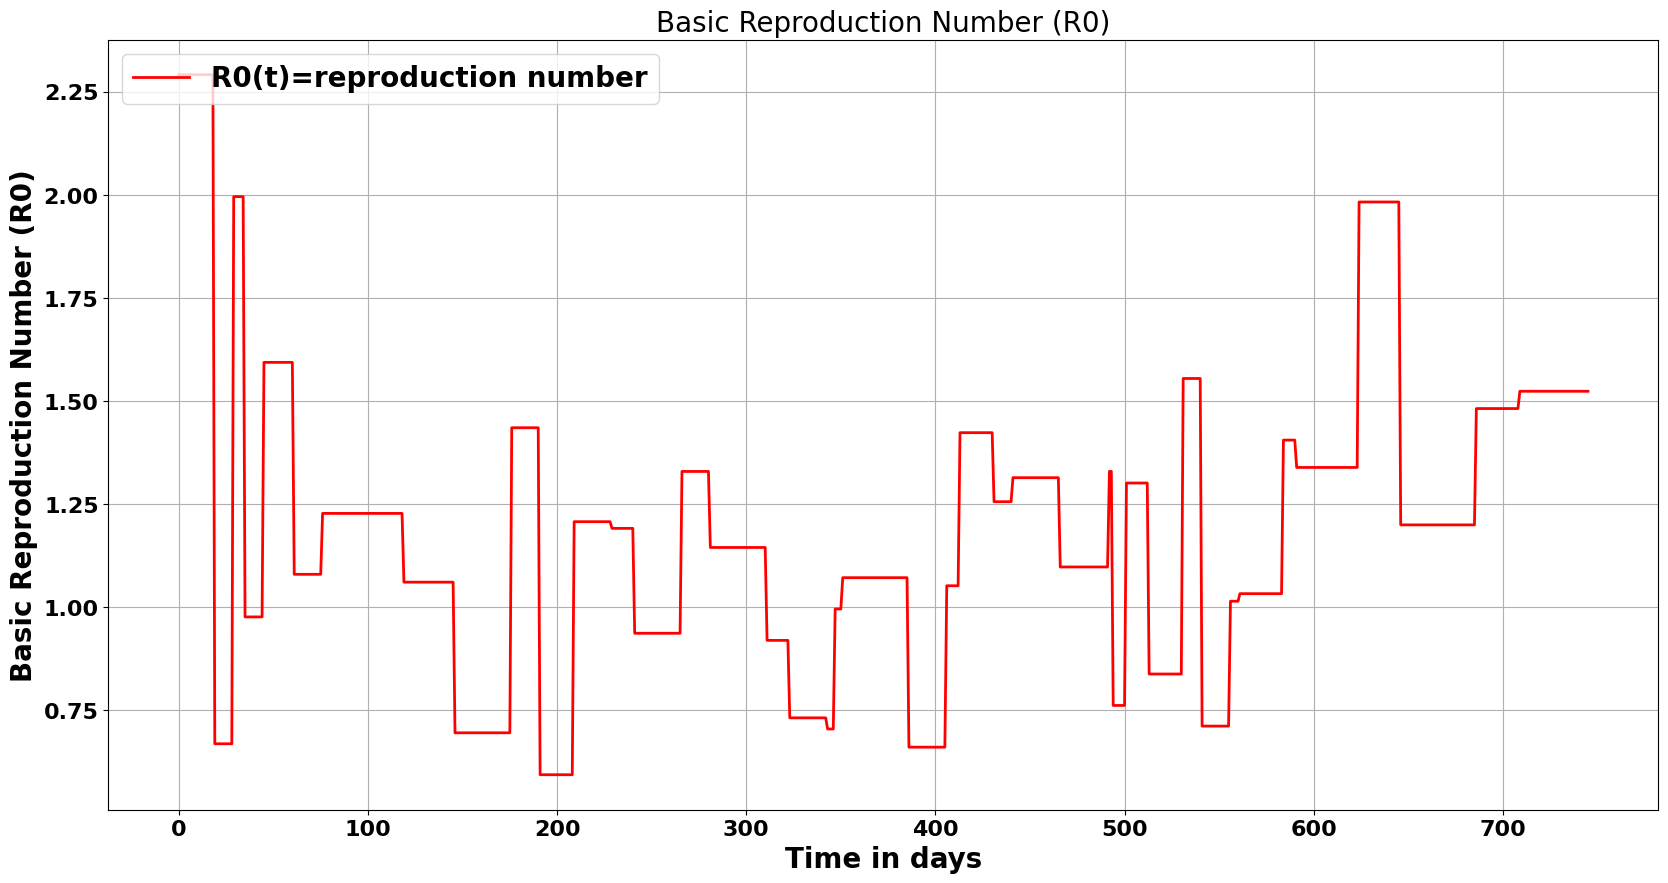

In [10]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting The reproduction number
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'r', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.show()
fig.savefig('R0.pdf')

In [11]:
data_infected = [1, 1,1,3,3,7,13,17,24,38,51,62,62,116,150,202,240,274,402,554,709,927,1170,1187,1280,1326,1353,1380,1462,1505,1585,1655,1686,1749,1845,1934,2003,2028,2173,2272, 2415,2506,2605,2783,3034,3158,3300,3465,3635,3953,4220,4361,4546,4793,4996,5350,5647,5951,6336,6783,7220,7572,7808,8232,8895,9420,10015,10652,11350,12074,12739,13524,14355,15515,16433,17200,18003,19137,20125,21343,22583,23615,24264,25937,27403,29240,30967,32683,	34357,	35812,	37525,	40792,	43434,	45973,	48285,	50879,	52991, 55421,	58568,	61927,	65736,	70038,	73533,	76334,	80412,	83890,	87715,	92681,	97302,	101590,	106108,	111796, 118375,	124590,	131800,	138134,	144264,	151209,	159333,	168061,	177124,	187977,	196750,	205721,	215855,	224665,	238339,	250687,	264184,	276242,	287796,	298292,	311049,	324221,	337594,	350879,	364328,	373628,	381798,	394948,	408052,	421996,	434200,	445433,	452529,	459761,	471123,	482169,	493183,	503290,	511485,	516862, 521318, 529877,
538184, 545476, 553188, 559858, 563598, 566109, 568919, 572865, 579140, 583653,587345,589886,592144,596060,
                 599940,603338,607045,609773,611450,613017,615701,618286,620132,622551,625056,627041,628259,630595,633015,635078,636884,638517,639362,640441,642431,644438,646398,648214,649793,650749,651521,653444,655572,
                 657627,659656,661211,661936,663282,665188,667049,668529,669498,670766,671669,672572,674339,676084,677833,679716,
                 681289,682215,683242,685155,686891,688532,690896,692471,693359,694537,696414,698184,700203,702131,703793,705254,
                 706304,708359,710515,712412,714246,715868,716759,717851,719714,721770,723682,725452,726823,727595,728836,730548,
                 732414,734175,735906,737278,738525,740254,742394,744732,746945,749182,751024,752269,754256,757144,759658,762763,
                 765409,767679,769759,772252,775502,778571,781941,785139,787702,790004,792299,796472,800872,805804,810449,814565,
                 817878,821889,828598,836764,845083,852965,860964,866127,873679,883687,892813,901538,912477,921922,930711,940212,
                 954258,968563,983359,994911,1004413,1011871,1021451,1039161,1057161,1073887,1088889,1100748,1113349,1127759,1149591,
                 1170590,1192570,1214176,1231597,1246643,1259748,1278303,1296806,1311686,1325659,1337926,1346936,1356716,1369426,1380807,
                 1392568,1404839,1412986,1417537,1423578,1430648,1437798,1443939,1449236,1453761,1456309,1458958,1463016,1466767,1470516,
                 1473700,1476135,1477511,1479253,1482412,1484900,1487681,1490063,1491807,1492909,1494119,1496439,1498766,1500677,1502367,1503796,1504588,1505586,
                 1507448,1509124,1510778,1512225,1513393,1513959,1514815,1516262,1517666,1518979,1520206,1521068,1521706,1522697,1524174,
                 1525648,1526873,1528414,1529420,1530033,1530966,1532497,1533961,1535423,1536801,1537852,1538451,1538961,1540009,1541563,
                 1543079,1544466,1545431,1545979,1546735,1548157,1549451,1550724,1551501,1551964,1552416,1552853,1553609,1554975,1556242,
                 1557527,1558458,1559113,1559960,1561559,1562931,1564355,1565680,1566769,1567513,1568366,1569935,1571348,1572985,1574370,
                 1575471,1576320,1577200,1578450,1579536,1581210,1582842,1584064,1584961,1586148,1588221,1590370,1592626,1594817,1596595,
                 1597724,1599272,1602031,1605252,1608393,1611143,1613728,
                 1615485,1617840,1621362,1625003,1628335,1632572,1635465,1637848,1640932,1645555,1649977,1654551,1659070,1662825,
                 1665617,1669231, 1675013,1680373,1686041,1691491,1696564,1699849,1704058,1712939,1722086,1730106,
                 1739425,1747082,1752630,1761066,1774312,1786079,1796589,1810164,1823319,1832479,1843572,1861065,1877143,1895905,1913861,1928897,1941119,1954466,
                 1973972,1995556,2019826,2046311,2062896,2075409,2090909,2112336,2135246,2157687,2179297,2195599,2206781,2219316,2236805,
                 2253240,2269179,2283880,2295095,2302304,2311232,2327472,2342330,2356049,2368105,2377823,2383490,
                 2391223,2408525,2422151,2435036,2447454,2456184,2461758,2470746,2484009,2497655,2511178,2523488,2533466,2540222,2546762,
                 2554240,2568511,2582427,2595447,2605586,2613569,2624254,2638981,2652652,2666964,2680225,2690973,2698605,2708951,
                 2722202,2734973,2747018,2757191,2764931,2770575,2777659,2787203,2796405,2805604,2814014,2819945,2824063,2829435,2836773,2843042,2848925,2854234,
                 2858195,2860835,2864534,2869201,2873415,2877063,2880349,2882630,2884134,2886331,2889298,2892081,2894342,2895976,2896943,2897521,2898888,2900994,2902672,2904307,2905613,2906422,2906851,2907619,2908768,2909757,
                 2910681,2911497,2912145,2912346,2912938,2913880,2914827,2915560,2916179,2916593,2916803,2917255,2917846,2918366,2918883,2919332,2919632,2919778,2920109,2920581,2921114,2921589,2921886,
                 2922116,2922222,2922391,2922735,2923054,2923393,2923751,2923956,2924072,2924317,2924622,2924978,2925371,2925677,2925939,2926075,2926348,
2926914,2927499,2928288,2929175,2929862,2930174,2948760,2950035,2952500,2955328,2958548,2961406,2963679,2968052,2976613,2988148,3004203,3020569,3031694,3038075,3051222,3071064,3093452,
3112469,3129622,3167497,3180785,3204642,3231031,3255816,3276529,3292609,3308074,3316585,3332008,3332008,3374262,3393109,3407937,3413540,3417318,3424534,3433554,3446532,3458286,3468079,3472436,3475512,3483590,3494696,3504554,3513813,
3521572,3526054,3528463,3534131,3540891,3546808,3552043,3556633,3559230,3560921,3564578,3568900,3572860,3576379,3579428,3581359,3582691,3585888,3590399,
3594499,3598288,3601630,3603856,3605222,3608307,3612809,3616075,3618853,3622210,3623962,3625190,3626014,3631642,3634811,3637673,3640162,
3641811,3642905,3645269,3648968,3652024,3654824,3657091,3658547,3659698,3662032,3665149,3667560,3669671,3671991,3673257,3674042,3675691,3677686,3679539,
3681437,3683172,3684319,3685120,3686556,3688423,3690291,3691962,3693532,3694504,3695175,3696823,3698803,3700484,3700484,3703329,3704218];
print(len(data_infected))

data_time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40, 41,42,43,44,
45,	46,	47,	48,	49,	50,	51,	52,	53,	54,	55,	56,	57,	58,	59,	60,	61,	62,	63,	64,	65,	66,	67,	68,	69,	70,	71,	72,	73,	74,	75,	76,	77,	78,	79,	80,	81,	82,	83,	84,	85,	86,	87,	88,	89,	90,	91,	92,	93,	94,	95,	96,	97,	98,	99,	100,	101,	102,	103,	104,	105,	106,	107,	108,	109,	110,	111,	112,	113,	114,	115,	116,	117,	118,	119,	120,	121,	122,	123,	124,	125,	126,	127,	128,	129,	130,	131,	132,	133,	134,	135,	136,	137,	138,	139,	140,	141,	142,	143,	144,	145,	146,	147, 148,	149,	150,	151,	152,	153,	154,	155,	156,	157,	158,	159,	160,	161,	162,	163,	164,	165,	166,	167,	168,	169,	170,	171,	172,	173,	174,	175,	176,	177,	178,	179,	180,	181,	182,	183,	184,	185,	186,	187,	188,	189,	190,	191,	192,	193,	194,	195,	196,	197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,
            290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,
             314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,
             334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,366,367,
             368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,
             398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,
             428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,
565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,
610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,
644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,
679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,
713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746];
print(len(data_time))


data_recovered = [0, 0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0, 0,	0,	0,	4,	12,	12,	31,	31,	31,	31,	31,	50,
                  50,	95,	95,	95,	95,	95,	95,	95,	410,	410,	410,	410,	410,	410,	903, 903,	903,	903,
                  1055,	1055,	1055,	1473,	1473,	1473,	1473,	1473,	2073,	2073,	2073,	2382,	2549,	2549,
                  2746,	2746,	3153,	3153,	3153,	3983,	4173,	4357,	4357,	4745,	5676,	6083,	6478,	7006,
                  7298,	7960,	8950,	8950,	10104,	10104,	11100,	11917,	12741,	13451,	14370,	15093,	16116,	16809,
                  17291,	18313,	19682,	21311,	23088,	24258,	24364,	26099,	29006,	31505,	33252,	35006,	36850,
                  38531,	39867,	42063,	44331,	44920,	47825,	50326,	51608,	53444,	55045,	56874,	59974,	64111,
                  67094,	68925,	70614,	73543,	76025,	81999,	86298,	91227,	93315,	97848,	102299,	106842,	113061,
                  118232,	127715,	134874,	138241,	146279,	160693,	165591,	178183,	182230,	191059,	194865,	208144,	229175,
                  236260,	245771,	263054,	265077,	274925,	287313,	297967,	309601,	326171,	342461,	347227,	358037, 363751,
                  377266, 387316, 394759, 404568, 411147, 417200, 426125, 432029, 437617, 461734, 466941,472377,477671,485468,
                  491441,497169,500102,504127,506470,516494,520381,525242,531338,533935,536694,538604,540923,549993,553456,
                  554887,557818,561204,563891,566555,567729,569935,573003,574587,576423,577906,579289,583126,584195,585303,
                  586844,589434,590071,591208,592904,594229,595916,599149,601818,603721,604478,606520,608112,609854,611044,
                  612763,614781,615684,616857,618127,618771,620081,622153,623765,624659,625574,626898,628301,629260,630436,
                  634543,635257,639568,641706,642560,643523,644641,646170,646721,647833,648654,649935,653052,654182,655330,
                  657500,659249,660185,671579,675593,678738,679688,680726,683194,686458,690903,692177,693261,693467,695496,
                  696820,701534,702544,707040,707784,710099,711195,716444,717629,721750,722876,723347,730633,731242,732531,
                  734305,739367,740450,744298,744780,745750,753072,754658,756671,758373,760118,761011,762746,764977,774585,
                  780313,783818,787782,793914,796346,808241,811372,822978,830251,839194,844874,849974,858456,867597,879671,
                  887701,897704,903679,911573,920879,929239,938216,947919,956712,966368,973265,1019123,1030930,1049740,1062690,
                  1083978,1098441,1117452,1144857,1160412,1183443,1201284,1217492,1230520,1241421,1254674,1263476,
                  1272197,1284781,1292921,1299620,1306022,1318504,1323680,1327186,1335618,1340497,1360204,1363947,1367247,1367247,1377980,1383626,1385996,1388321,1391155,1396951,1399829,1403214,1406907,1409553,1412015,1413566,1419459,
                  1422622,1424401,1426417,1429047,1430259,1431336,1433320,1434772,1436101,1437050,1439515,1440874,1442045,1444282,1445979,
                  1447503,1449654,1452988,1454290,1455325,1458001,1459056,1459894,1461196,1462110,1463089,1463953,1465204,1466595,
                  1467254,1469565,1471164,1471899,1472645,1473588,1474319,1474826,1475398,1476605,1477363,1478088,1478820,1479821,1480632,
1481637,1482682,1483296,1484356,1485315,1486873,1488060,1488572,1489457,1490143,1490876,1494630,1495864,1496756,1499110,1500360,
1501185,1501880,1502986,1503611,1504426,1505620,1506732,1507778,1508558,1509656,1510385,1511905,1513202,1514088,1516256,1517350,
1519258,1519734,1520878,1522165,1523243,1524352,1526638,1527968,1528868,1531993,1534350,1537430,1539395,1541250,1543951,1546583,1548092,
1551520,1554184,1556874,1559337,1563719,1565684,1567635,1570975,1574223,1578033,1581540,1587015,1589501,1593059,1598293,1602406,1606581,1611447,1616405,1620317,1623319,1632182,1640849,1647503,1656680,1665540,
1671391,1675827,1690380,1702070,1709999,1723882,1739976,1748042,1754793,1773930,1792361,1808082,1827821,1845038,1853804,1862900,1884170,1904107,1922601,1943513,1961448,1970516,1982122,2009456,2028881,2050164,2069085,
2085119,2098818,2109820,2133196,2147168,2158183,2169452,2180494,2186988,2194762,2207960,2222338,2230871,2238388,2250708,2258603,2268085,2280490,2290321,2297974,2308054,2319803,2337591,2344896,2355254,
2364507,2375633,2382809,2393133,2402020,2411753,2418988,2438182,2444409,2455998,2464609,2474245,2485108,2498429,2519781,2526199,2533956,2544563,2560605,2568465,2578741,2586646,2594857,2599667,2610300,2618386,
2637706,2656534,2663607,2667296,2671322,2688692,2700299,2706293,2714565,2728961,2732363,2735340,2743865,2750213,2753334,2756693,2758274,2760093,2762812,2765700,2766892,2773344,2776990,2778893,2779906,2781565,
2783018,2786409,2788130,2789432,2790653,2791256,2791794,2797443,2802615,2802980,2804065,2804676,2805186,2805566,2808160,2809238,2810316,2810740,2811178,2811439,2811928,2812320,2813218,2813442,2813781,2814076,2814264,2814411,2814654,2815166,2815840,2816018,2817764,2818103,2818236,2818612,2818761,2819130,2819307,2819307,2819688,2819870,2820030,2820514,2820613,2820731,2820994,2821141,2821481,2838524,2839768,2843961,2845607,2847083,2847771,2849439,2849558,2850142,2850905,2852898,2855474,2858144,2861372,2864648,2867966,2870329,2878855,2880472,2913232,
2913297,2943570,2949209,2954919,2975417,2992289,3010513,3026285,3043094,3043094,3094902,3085419,3102717,3111957,3120012,3134314,3145543,3159143,3174037,3182969,3197017,3224152,3238246,3249738,3260642,3273022,3281447,3286952,3291578,3298672,3309735,3346936,3358065,3360879,3371004,3375859,3380374,3390027,3394527,3403253,3405713,3411555,3413926,
3418123,3429498,3432829,3436326,3439482,3443535,3456461,3459418,3461490,3465681,3473120,3477336,3480249,3482274,3488980,3491626,3494016,3497041,3500826,3502319,3508249,3511001,3513078,3515196,3518316,3521246,
3522732,3524402,3526115,3531960,3533695,3536503,3539782,3541730,3543109,3551039,3552788,3554282,3557369,3559951,3560217,3564491,3569441,3569538,3571758,3572534,3573469,3576438,3577338,3578877,3584293,3585603,3585603,3588264,3589451];
print(len(data_recovered))

data_dead = [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	2,	3,	5,	5,	5,
             9,	9,	11,	12, 13,	18,	18,	24,	25,	25,	27,	27,	34,	48,	50,	52,	54,	58,	58,	65,	75,	79,	86,	87,	90, 93,	103,	103,
             116,	123,	131,	138,	148,	153,	161,	178,	186,	194,	206,	206,	219,	238,	247,
             261,	264,	286,	312,	339,	369,	397,	407,	429,	481,	524,	552,	577,	611,	643,
             683,	705,	755,	792,	848,	908,	952,	998,	1080,	1162,	1210,	1284,	1354,	1423,	1480,
             1568,	1625,	1674,	1737,	1831,	1877,	1930,	1991,	2102,	2205,	2292,	2340,	2413,	2456,	2529,
             2657,	2749,	2844,	2952,	3026,	3199,	3310,	3502,	3602,	3720,	3860,	3971,	4079,	4172,	4346,
             4453,	4669,	4804,	4948,	5033,	5173,	5368,	5940,	6093,	6343,	6655,	6769,	7067,	7257,	7497,
             7812,	8005,	8153,	8366,	8539,	8884, 9298, 9604, 9909, 10210,10408, 10621, 10751, 11010, 11270, 11556, 11677,
             11839,11982,12264,12423,12618,12843,12987,13059,13159,13308,13502,13628,13743,13981,14028,14149,14263,14389,14563,
             14678,14779,14889,15004,15086,15168,15265,15378,15427,15447,15499,15641,15705,15772,15857,15940,15953,15992,16118,
             16206,16283,16312,16376,16398,16586,16667,16734,16866,16909,16938,16976,17016,17103,17248,17408,17547,17673,17780,
             17863,18028,18151,18309,18370,18408,18431,18492,18656,18741,18843,18891,18944,18968,19008,19053,19111,19164,19230,
             19276,19411,19465,19539,19585,19677,19749,19789,19809,19845,19951,20011,20076,20153,20206,20241,20314,20433,20556,
             20671,20759,20845,20903,20968,21083,21201,21289,21378,21439,21477,21535,21644,21709,21803,21963,22067,22206,22249,
             22432,22574,22747,22952,23106,23276,23451,23661,23827,24011,24285,24539,24691,24907,25246,25657,25983,26276,26521,
             26735,27071,27568,28033,28469,28887,29175,29577,30011,30524,31368,31809,32425,32824,33163,33579,34334,35140,35852,
             36467,36851,37105,37449,38288,38854,39501,40076,40574,40874,41117,41797,42550,43105,43633,43951,44164,44399,44946,
             45344,45605,45902,46180,46290,46473
,46869,47145,47382,47670,47821,47899,48094,48313,48478,48708,48859,48940,49053,49150,49413,49523,49667,49784,49941,49993,50077,50271,50366,50462,50566,
50647,50678,50803,50906,51015,51110,51179,51261,51326,51421,51560,51634,51724,52035,52082,52111,52196,52251,52372,52535,52602,52648,
52663,52710,52788,52846,52897,52946,52954,52987,52995,53032,53111,53173,53226,53256,53322,53356,53423,53498,53571,53663,53711,53736,
53757,53887,53940,53995,54066,54125,54148,54186,54237,54285,54331,54350,54406,54417,54452,54511,54557,54620,54687,54724,54735,54825,
54896,54968,55012,55124,55183,55210,55260,55340,55507,55568,55719,55772,55802,55874,55976,56077,56170,56293,56363,56439,56506,56601,56711,56765,56832,56929,56974,57063,57183,57310,57410,57592,57706,57765,57879,58087,
58223,58323,58441,58590,58702,58795,59092,59258,59406,59621,59778,59900,60038,60264,60647,61029,61332,61507,61840,62171,62628,63039,63499,63873,64138,64289,64509,65142,65595,65972,66385,66676,66859,
67080,67676,68192,68625,69075,69488,69775,70018,70388,70908,71431,71679,72013,72191,72437,72992,72415,73873,74352,74623,74813,75012,75201,75774,76247,76631,76869,77141,77440,77993,78377,78694,78983,79251,79421,79584,79953,
80469,80826,81187,81461,81595,81830,82261,82496,82914,83161,83343,83419,83617,83899,84152,84327,84608,84751,84877,85002,85302,85468,85779,85952,86116,86174,86216,86376,86500,86655,86967,87001,87052,87216,87417,
87525,87626,87705,87753,87780,87819,87922,87981,88104,88236,88292,88317,88346,88429,88466,88506,88562,88587,88612,88619,88674,88754,88835,88891,88914,88925,88934,88987,89049,89104,89151,89163,89177,89179,89197,89220,89251,89295,89319,89332,89352,89387,89435,89452,89469,89476,89484,89489,89504,89515,89555,89562,89572,89574,89584,89635,89657,89771,
89783,89791,89797,89822,89843,89871,89915,89944,89965,89966,89975,90002,90038,90060,90080,90116,90137,90148,90172,90226,90262,90297,90345,90348,90453,90488,90488,90662,90743,90773,90814,90829,90854,
90935,91061,91145,91198,91228,91312,91451,91561,92112,92252,92371,92453,92530,92649,92830,92989,93117,93278,93364,93451,93551,93707,93846,93949,94063,94177,94265,94397,94491,94651,94784,94905,
95022,95093,95288,95463,95545,95766,95817,95835,96021,96289,96502,96705,96851,96985,96993,97250,97431,97520,97955,98298,98617,98667,98804,
98868,98978,99018,99145,99191,99229,99412,99430,99458,99499,99517,99543,99543,99609,99625,99656,99681,99709,99712,99725,99725,99727,99767,99829,99829,99879,99881];
print(len(data_dead))

data_active = [1, 	1,	1,	3,	3,	7,	13,	17,	24,	38,	51,	62,	62,	116,	150,	202,	240,	274,	402,	550,	697,
               915,	1139,	1156,	1249,	1295,	1322,	1330,	1412,	1410,	1490,	1560,	1591,	1654,	1750,	1839,
               1593,	1618,	1763,	1862,	2005,	2096,	1702,	1880,	2131,	2255,	2245,	2410,	2580,	2480,
               2747,	2888,	3073,	3320,	2923, 3277,	3574,	3569,	3787,	4234,	4474,	4826,	4655,	5079,	5742,
               5437,	5842,	6295,	6993,	7329,	7063,	7441,	7877,	8509,	9135,	9240,	9053,	10187,	10021,
               11239,	11483,	11698,	11523,	12486,	13033,	14147,	14851,	15874,	17066,	17499,	17843,	19481,	20346,
               21715,	23921,	24780,	23985,	23916,	25316,	26921,	28886,	31507,	33666,	34271,	36081,	38970,	39890,
               42355,	45694,	48146,	51063,	54922,	58401,	60479,	64706,	69209,	73650,	77666,	83308,	86062,	90826,
               96750,	103435, 107873, 113556,	117823, 125278, 132455, 136469, 141368,	149555, 152013, 150356, 158630, 159411,
               168649, 173269, 178763, 173654, 165773, 171792, 176225, 171146, 180356, 177604,	172448, 173156, 172568, 167012,
               160829,	164258, 158825, 157567, 152611, 150868, 150717,148620, 148711, 146398,  139984, 136890, 135248, 117406,
               116712,114968,112215,106676,104619,102771,103236, 102918,103303,94956,92636,90459,86948,86197,85857,86452,86118,
               78266,77139,78128, 77260,75680,74626,72807,72712,72496,71435,71811,71791,71887,71460,68395,69249,70269,70783,
               70222,71140,70728,70378,70959,71133,69380,67680,67045,67191,66052,66227,66230,66789,66953,66508,66531,66385,67028,
               68120,68451,68743,68706,68700,68963,69516,69883,70943,71695,69250,69997,66736,66653,67955,68889,69605,69698,70038,
               70018,71060,71835,70630,71270,71493,70095,69587,70363,60835,58582,57168,57590,57799,57060,55936,53829,54768,55921,
               57557,56773,57436,55610,57114,55723,57625,57580,58564,55808,57873,56821,59065,61792,57069,58762,59768,62167,61505,
               65354,66151,69785,72128,68817,73940,80093,86710,92847,99953,103381,108702,109102,112500,117720,124695,128008,
               134365,131971,142886,145585,153108,155717,159539,161897,162995,171564,177490,186186,191185,197069,201776,206880,
               220352,232374,244651,257464,265229,273378,240625,247373,247066,248996,241681,239485,229484,211859,209014,197364,
               191284,187347,182466,176116,168904,167172,165601,159158,156315,154141,150287,140454,139336,139581,134898,133203,115931,113564,112006,115165,106920,104055,
               104067,103486,101754,97168,96610,95552,93770,92814,91781,91022,86127,84826,84723,84361,83178,83134,82623,81495,81490,81565,81929,
80691,80194,79661,78415,78195,78145,77219,75426,75130,74708,72965,73441,74067,74227,74691,74763,74498,73757,73414,74309,73514,73302,
73532,73334,73147,73838,74625,75326,74896,74601,74328,74033,73788,74343,74605,74845,75162,74757,74645,74686,74871,75783,76223,76626,
76637,73736,74071,74592,73875,74010,74286,74440,74214,74839,75110,75590,76110,76286,76403,76492,77836,78465,79424,80729,80339,80374,
80014,82297,84374,86228,87900,89376,88847,89872,92494,93010,93985,95142,96070,96598,96981,98972,101885,103031,104886,105951,106280,105512,109329,112738,
115066,117268,118531,118309,117043,123438,129027,131813,137019,140501,141183,144661,153995,162760,164407,169315,175816,175799,178032,189674,201316,205525,211791,218898,217237,214490,225930,240763,245896,253950,
254814,247588,245871,258532,272346,273517,275190,272998,263268,257868,266289,271118,259723,254999,244931,233219,226113,228654,232510,222853,220937,219640,214038,210729,221537,227389,227076,225116,225313,223370,220038,225406,229570,
230688,233167,235492,232168,226959,216649,223615,227173,230940,229953,230760,231121,236961,240899,247976,242043,246564,242607,244342,247957,249865,248589,237410,238732,236619,233096,226598,227940,226863,227368,225088,224396,219135,218387,205336,192391,190627,190899,
189513,175842,168902,167122,162498,151388,150267,148794,142466,139085,138747,137649,137702,136850,134709,133188,134102,129328,127317,126720,126516,125286,124601,122359,121627,121249,120844,120889,120552,115495,111265,111847,111495,111503,111407,111237,109095,108608,
108050,108143,108154,108193,107850,107789,107363,107672,107808,107810,107852,107811,107737,107569,107214,107375,105987,105853,105836,105705,105836,
105848,106064,106370,106251,106205,106318,106400,106886,107557,108181,108721,108693,110236,110267,108539,109721,111465,113635,114240,118494,126471,137243,151305,165095,173550,176703,186574,203098,223123,233614,249150,254265,267488,261072,281822,300897,301112,300320,297561,290300,288914,288914,279360,
307690,305220,301583,297306,290220,288011,287389,284249,285110,275419,251360,245344,244958,243912,240791,240125,239102,236885,235459,231156,199872,193978,195754,188226,185062,184204,178873,178333,
173126,173715,169804,168765,167765,160901,161670,161962,162148,160321,148761,148889,151319,150394,145733,144874,143713,142916,137034,140016,140795,140632,139336,139492,134656,134268,135890,136828,136508,135845,135815,135296,135917,133189,
133865,133168,132209,131527,130933,124652,124898,125257,124068,123221,124102,120629,117115,118885,118533,119428,120063,118066,117837,117946,114510,114881,114881,115065,114767];
print(len(data_active))

ntests = [8,9,41,27,40,54,67,203,76,93,459,929,506,159,1762,1606,987,1890,3500,2714,2133,2234,8066,3426,3630,2816,2663,3220,3673,2396,3576,2936,1225,2838,
2783,5098,4154,2025,5032,3578,3359,3493,4545,5767,7374,6510,6799,5427,6837,9796,8820,8614,7639,9827,7027,11630,10403,9992
          ,13164,15061,11794,10523,11315,12774,15599,16327,17257,14731,13630,16655,16666,18537,18004,21314,14198,13538,17252,
          19572,17599,21338,19485,12922,9214,29005,20727,24452,21708,23242,17617,18792,24445,34696,30196,40797,28396,22995,
          25011,30330,29999,32026,27462,34071,26975,23580,34847,20738,32336,33174,34452,25116,29596,34122,43118,33092,35905,
          38075,29911,33013,36931,39188,39026,46925,38083,33950,43421,36867,56170,56663,51338,45821,40233,38114,45389,46796,
          48130,49688,49006,33899,31275,48553,46632,52382,46324,42966,28433,28424,42528,44886,41486,42450,34794,21916,19507,
          34989,36616,33851,36607,30318,6911,11483,16457,20063,35614,26918,22609,15032,14677,25324,24612,24224,30560,18358,
          10640,12237,20137,19009,14329,20659,21902,18849,11687,21313,20380,18599,18123,16367,8759,12213,21736,20555,20712,
          18620,15692,10136,11603,20962,22354,20057,21069,16884,6180,16394,19640,18405,14917,11359,15028,9014,12011,23426,
          21132,20660,21804,18113,10714,14591,23583,21172,20419,28066,19270,10977,15534,24793,22609,24179,22608,21337,16502,
          15366,26537,25788,23445,20826,19997,11464,17472,25721,25013,23214,22150,19543,10402,15692,25073,23942,23094,22455,
          17266,12641,17269,27432,25675,23430,23497,23497,12755,17930,28703,24456,29019,26007,21904,14377,20288,29437,28010,
          28253,26412,22463,16614,20259,32846,31999,33415,31844,26735,19252,28127,38200,45207,44074,40211,30423,25049,36347,
          48118,42543,40751,48387,40466,35844,39045,54048,56008,52223,37817,29494,23707,31457,53279,55447,50110,46913,36622,
          37419,47875,70060,69271,76202,77167,63046,52496,50671,71681,74830,65209,59994,54696,39901,46648,62054,58540,62251,
          64143,46119,26113,39529,49065,48406,47345,41540,34076,21549,28942,39596,31032,36250,33187,26055,15599,26859,35195,32265,
          35718,31149,24470,15778,24486,35413,34556,31638,28722,24856,15342,25093,34510,31862,28752,26569,22836,12794,23753,
          33498,33799,29024,29156,18989,13630,30762,36217,33493,24133,32862,23903,15023,24920,34419,31550,28519,26339,24025,13932,
16445,25155,32002,29240,27553,24256,16123,24842,34513,32725,27622,16391,12117,11091,16137,24594,35874,30560,29464,23013,16042,
26165,34971,43550,31600,14377,31425,18130,23893,34091,34493,33903,26934,22469,14838,21776,22514,23137,29840,27957,16194,16752,24040,33414,32577,25934,
29873,26098,18311,26075,37020,42073,41994,34512,27543,19505,32397,40355,39612,34903,43755,29355,23352,28026,45877,43442,39082,39618,31523,
24669,36677];
print(len(ntests))


746
746
746
746
746
454


<ipython-input-12-67070737cadc>:3: RuntimeWarning: divide by zero encountered in divide
  dR0st=R0*(1/np.sqrt(data_active)+1/np.sqrt(data_recovered))


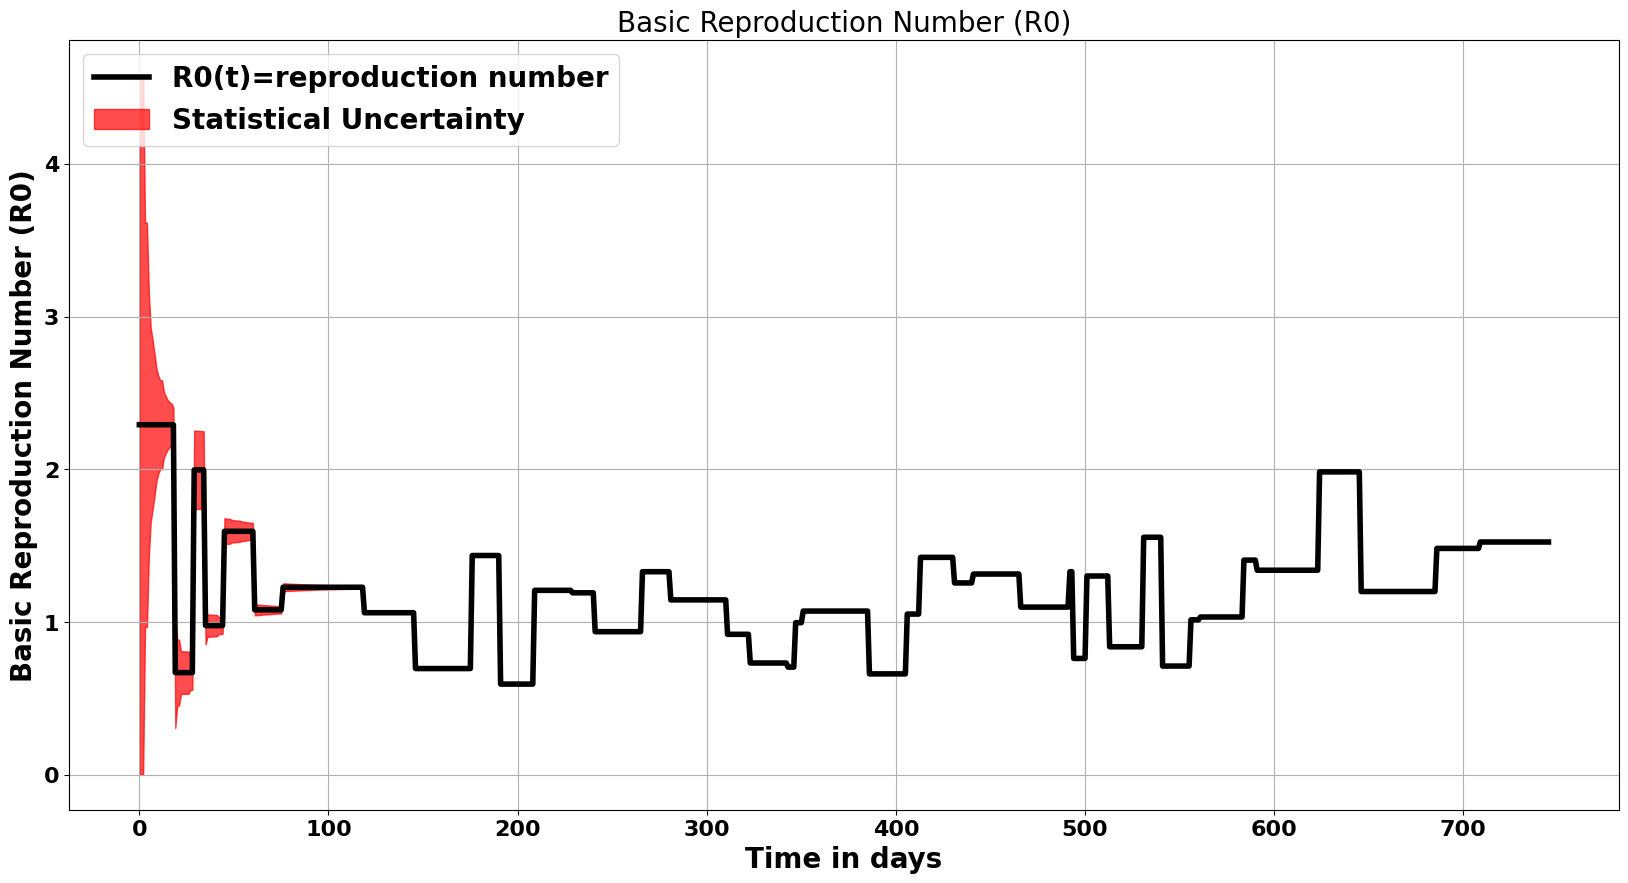

In [12]:
#Statistical uncertainty

dR0st=R0*(1/np.sqrt(data_active)+1/np.sqrt(data_recovered))

for i in range(len(data_time)):
    if(data_active[i]>0 and data_recovered[i]>0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_active[i])+1/np.sqrt(data_recovered[i]))

    elif ( data_recovered[i]==0 and data_active[i]>0):
        dR0st[i]=R0[i]*(1/np.sqrt(data_active[i]))

    elif ( data_recovered[i]>0 and data_active[i]==0):
        dR0st[i]=R0[i][i]*(1/np.sqrt(data_recovered[i]))
    elif ( data_recovered[i]==0 and data_active[i]==0):
        dR0st[i]=0



# Plotting Statistical uncertainty
alpha=0.7
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately
plt.fill_between(t ,R0-dR0st,R0+dR0st,color='r',alpha=alpha,label='Statistical Uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
#plt.ylim(0,2.5)
plt.grid(True)
plt.show()
fig.savefig('R0t24052020.pdf')



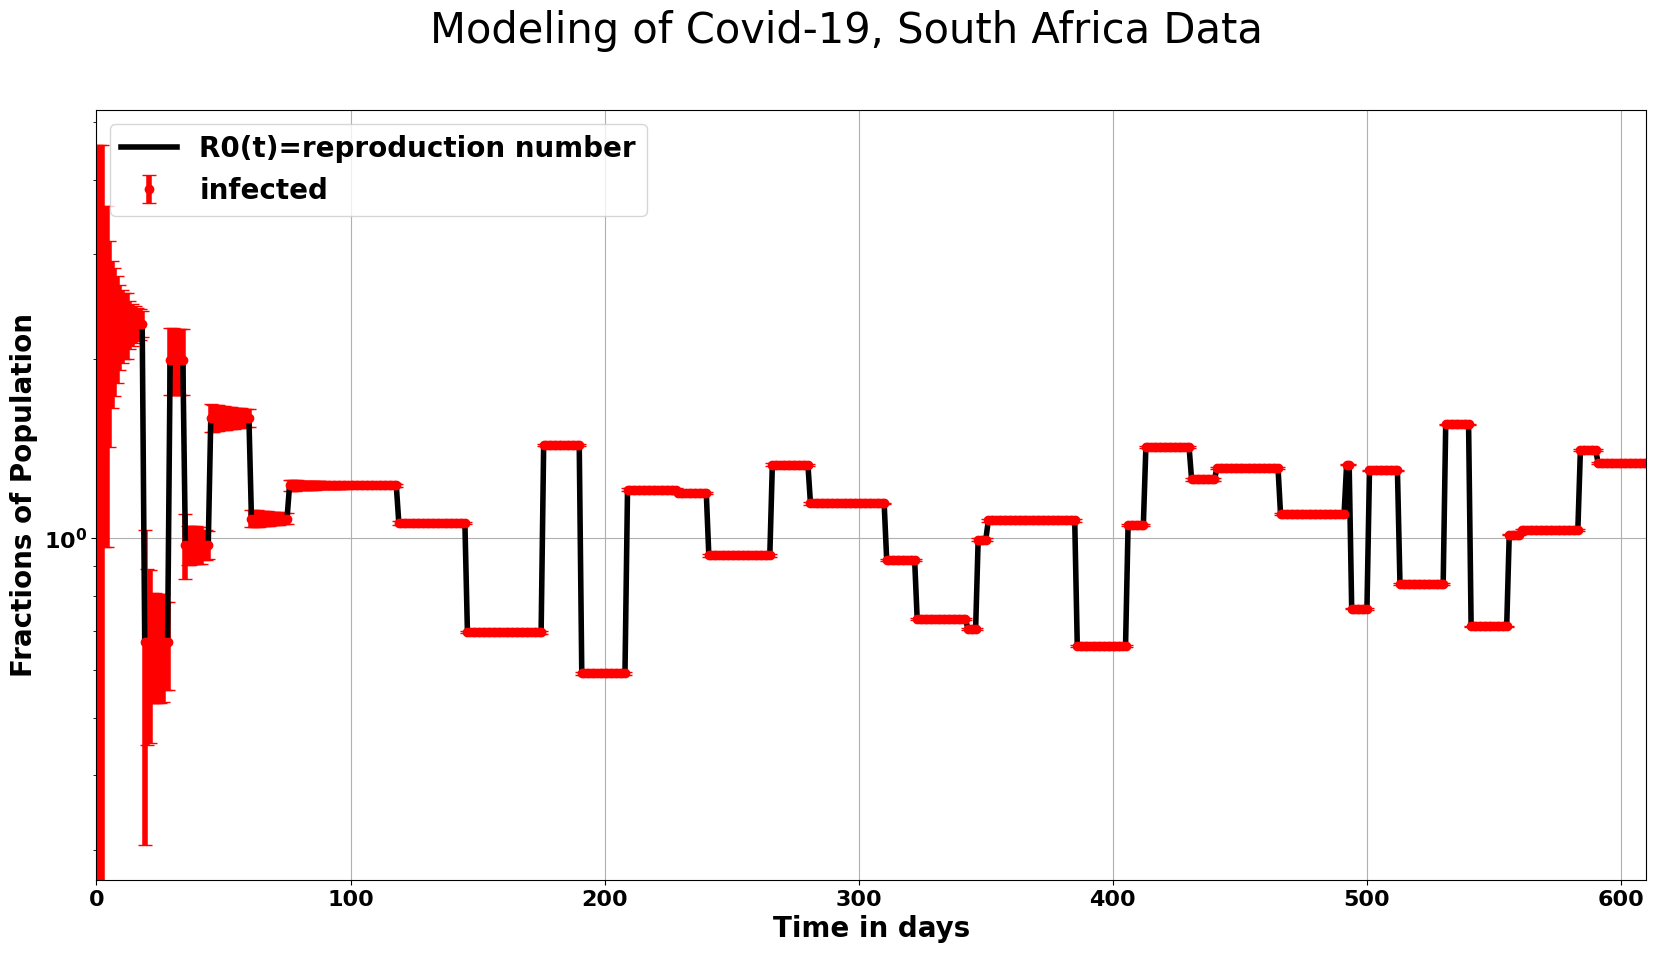

In [13]:
fig = plt.figure()
ax = plt.subplot(111)



plt.errorbar(t ,R0,yerr=dR0st,fmt='o', color='r',label='infected', elinewidth =4, capsize = 5)
plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately
#plt.plot(t, E,'gray',label='E = Extinct',linewidth=2) # plotting t, c separately
#plt.plot(t, actif_sidarthe,'b',label='Actif_S = actif_sidarthe',linewidth=2) # plotting t, c separately
#plt.plot(t, H,'c',label='H = Healed',linewidth=2) # plotting t, b separately
#plt.plot(t, Infected_sidarthe, 'g',label='Infecteds=infected_sidarthee',linewidth=2)


plt.grid(True)
#plt.title('Log scale',fontsize=20)
#plt.title('Linear scale', fontsize = 20)
#plt.yscale('linear')
plt.yscale('log')
plt.xlim(0, 610)

#plt.ylim(0, 2.5*10**-2)
#plt.ylim(0, 7.5*10**-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
fig.suptitle('Modeling of Covid-19, South Africa Data',fontsize=30)
plt.legend()
ax.legend(loc=2, prop={'size': 20})
fig.savefig('SIDARTHE_model_fitting27Sep20202LinearScale.pdf')

In [14]:
alpha=interp1d(t,alpha2,bounds_error=False, fill_value="extrapolate")
beta=interp1d(t,beta2,bounds_error=False, fill_value="extrapolate")
delta=interp1d(t,delta2,bounds_error=False, fill_value="extrapolate")
gamma=interp1d(t,gamma2,bounds_error=False, fill_value="extrapolate")
epsilon=interp1d(t,epsilon2,bounds_error=False, fill_value="extrapolate")
zeta=interp1d(t,zeta2,bounds_error=False, fill_value="extrapolate")
lamda=interp1d(t,lamda2,bounds_error=False, fill_value="extrapolate")
eta=interp1d(t,eta2,bounds_error=False, fill_value="extrapolate")
rho=interp1d(t,rho2,bounds_error=False, fill_value="extrapolate")
theta=interp1d(t,theta2,bounds_error=False, fill_value="extrapolate")
mu=interp1d(t,mu2,bounds_error=False, fill_value="extrapolate")
kappa=interp1d(t,kappa2,bounds_error=False, fill_value="extrapolate")
nu=interp1d(t,nu2,bounds_error=False, fill_value="extrapolate")
chi=interp1d(t,chi2,bounds_error=False, fill_value="extrapolate")
sigma=interp1d(t,sigma2,bounds_error=False, fill_value="extrapolate")
taua=interp1d(t,taua2,bounds_error=False, fill_value="extrapolate")
phi=interp1d(t,phi2,bounds_error=False, fill_value="extrapolate")
alphap=interp1d(t,alphap2,bounds_error=False, fill_value="extrapolate")
taub=interp1d(t,taub2,bounds_error=False, fill_value="extrapolate")

In [15]:
def SIDARTHE_model(y, t,N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taua,phi,alphap,taub):
    S = y[0]   #Succeptible
    I = y[1]   #Infected asymptomatic undetected
    D = y[2]   #Diagnosed asymptomatic infected detected
    A = y[3]   #Ailing symptomatic infected undetected
    R = y[4]   # Recognised symptomatic infected detected
    T = y[5]   #Treathened accutely symptomatic infected detected
    H = y[6]   # Healed
    E = y[7]   # Extinct (deads)
    V = y[8]   #Vaccinations
    U = y[9]   # Uninfected
    return [-S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R + phi(t)),
            S*(alpha(t)*I + beta(t)*D +gamma(t)*A + delta(t)*R)-(epsilon(t)+lamda(t)+zeta(t))*I + alphap(t)*I*V,
            epsilon(t)*I-(eta(t)+rho(t))*D,
            zeta(t)*I-(theta(t)+mu(t)+kappa(t))*A,
            eta(t)*D +theta(t)*A-(nu(t)+chi(t)+taub(t))*R,
            mu(t)*A+nu(t)*R-(sigma(t)+taua(t))*T,
            lamda(t)*I +rho(t)*D + kappa(t)*A + chi(t)*R +sigma(t)*T,
            taua(t)*T + taub(t)*R,
            -alphap(t)*I*V + phi(t)*S,
            lamda(t)*I ]


N=5.8e+7#8e+7
V0 = 0.00
I0= 0.0/N#20./N
D0= 1/N     #9./N
A0= 1/N#0.25/N       #1./N
R0= 1/N            #2./N
T0=0.00
H0=0.00
E0=0.00
U0=0.00
S0=1-I0-D0-A0-R0-T0-H0-E0-V0-U0
y0 = S0,I0,D0,A0,R0,T0,H0,E0,V0,U0
# Integrate the SIR equations over the time grid, t.
ret = odeint(SIDARTHE_model, y0, t, args=(N, alpha,beta,delta, gamma,epsilon,zeta,lamda,eta,rho,theta,mu,kappa,nu,chi,sigma,taua,phi,alphap,taub))
S,I,D,A,R,T,H,E,V,U = ret.T
len(S)


746

In [16]:
actif_sidarthe=[]
t=[]
#for i in range(152):
for i in range(len(data_time)):
    t.append(i)
    actif_sidarthe.append(A[i]+T[i]+R[i])
len(t)


746

In [17]:
Infected_sidarthe=[]
t=[]
#for i in range(152):
for i in range(len(data_time)):
    t.append(i)
    Infected_sidarthe.append(A[i]+T[i]+R[i]+H[i]+E[i])
len(t)

746

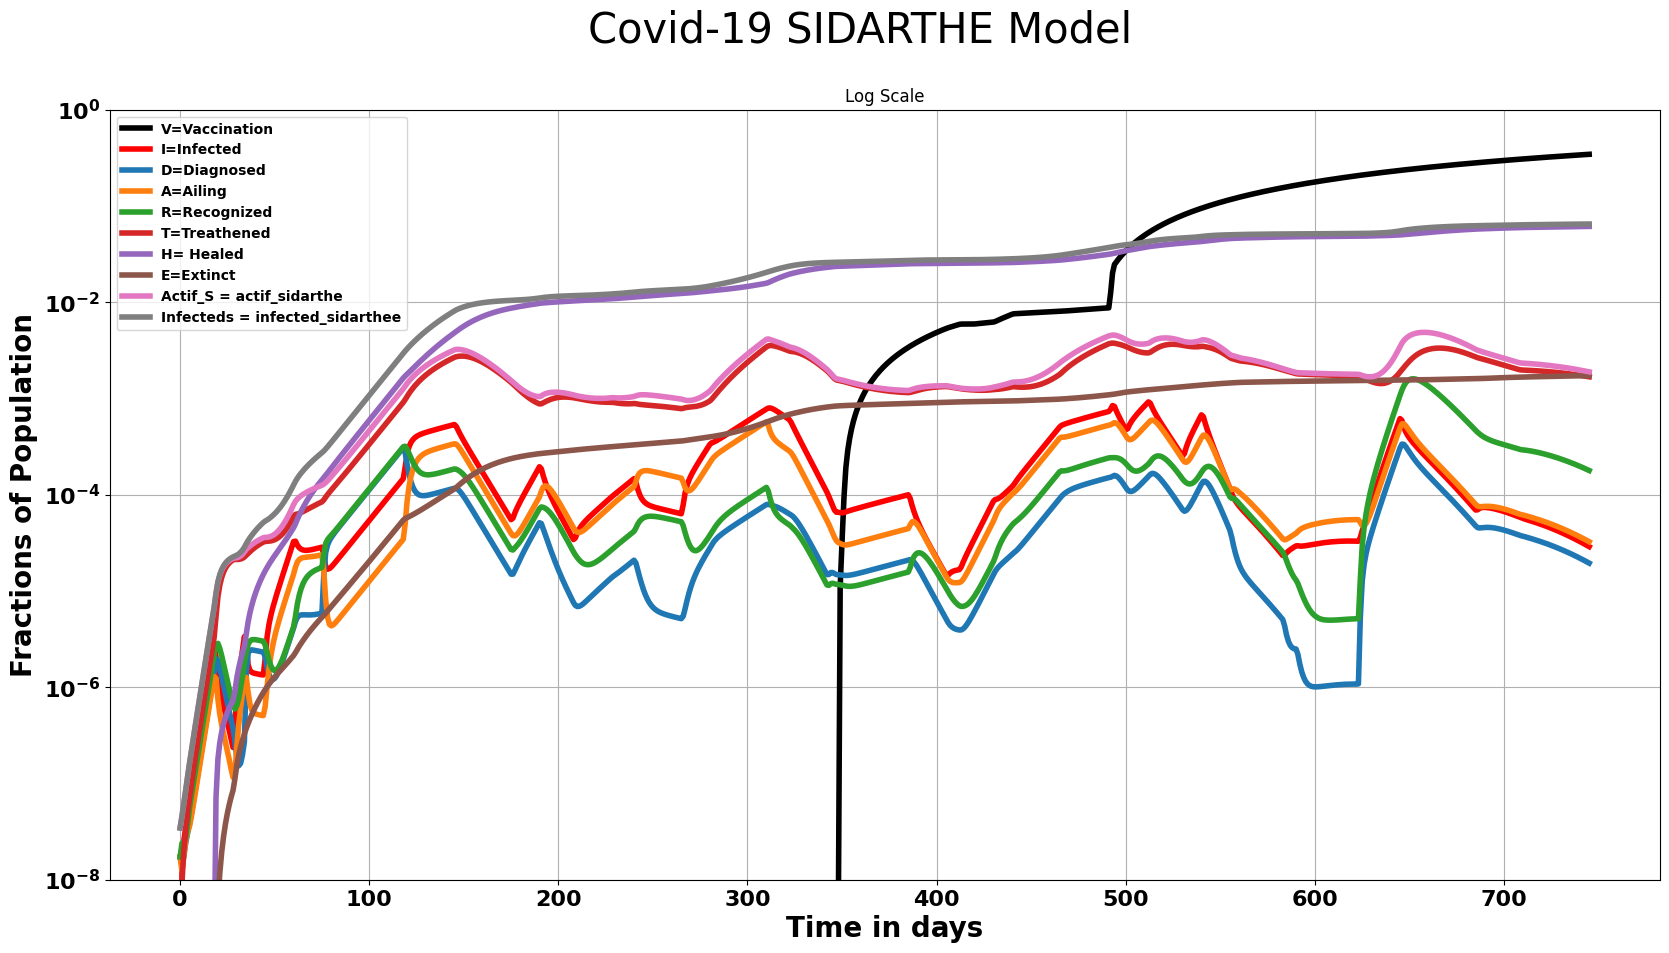

In [18]:
fig = plt.figure()
ax = plt.subplot(111)
plt.yscale('log')
#plt.yscale('linear')
#plt.plot(t, S, label='S=Succeptible',linewidth=4)
plt.plot(t, V, 'black',label='V=Vaccination',linewidth=4)

plt.plot(t, I, 'r',label='I=Infected',linewidth=4)
plt.plot(t, D,label='D=Diagnosed',linewidth=4)
plt.plot(t, A,label='A=Ailing',linewidth=4)
plt.plot(t, R, label='R=Recognized',linewidth=4)
plt.plot(t, T, label='T=Treathened',linewidth=4)
plt.plot(t, H,label='H= Healed',linewidth=4)
plt.plot(t, E,label='E=Extinct',linewidth=4)
plt.plot(t, actif_sidarthe,label='Actif_S = actif_sidarthe',linewidth=4) # A[i]+T[i]+R[i]
plt.plot(t, Infected_sidarthe,label='Infecteds = infected_sidarthee',linewidth=4) #A[i]+T[i]+R[i]+H[i]+E[i]
plt.ylim(10**-8, 1)
#plt.xlim(0, 454)
#plt.ylim(0, 7.5*10**-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('Linear Scale')
plt.title('Log Scale')
fig.suptitle('Covid-19 SIDARTHE Model',fontsize=30)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
plt.grid(True)
plt.legend()
ax.legend(loc=2, prop={'size': 10})
#plt.xscale("log")
#plt.yscale("log")
plt.show()
fig.savefig('SIDARTHE_model_various20Marc2022.pdf')


In [19]:
Goodness=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
         ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(Goodness))


#Noemalized Data


N= 5.8e+7#8e+6
Dactifs=[]
Ddeads=[]
Drecovereds=[]
Dinfecteds=[]


for i in data_active:
    Dactifs.append(i/N)

for i in data_infected:
    Dinfecteds.append(i/N)

for i in data_dead:
    Ddeads.append(i/N)

for i in data_recovered:
    Drecovereds.append(i/N)



#print(Dactifs)
#print(Ddeads)
#print(Dinfecteds)
#print(Drecovereds)

746


In [20]:
data.head()

data_time  Double data time[Ndata]  Double_data_infected[Ndata]  \
0          0                       45                            1   
1          1                       46                            1   
2          2                       47                            1   
3          3                       48                            3   
4          4                       49                            3   

   Double_data_active[Ndata]  Double_data_recovered[Ndata]  \
0                          1                             0   
1                          1                             0   
2                          1                             0   
3                          3                             0   
4                          3                             0   

  Double_data_dead[Ndata] Double n tests[Ndata]  Days_Vaccination  \
0                       0                     8                 1   
1                       0                     9                 2   
2                       0                    41                 3   
3                       0                    27                 4   
4                       0                    40                 5   

   Combine_Vaccine  Fully_vaccinated  Boast Dates Unnamed: 12  \
0              NaN               NaN    NaN   NaN         NaN   
1              NaN               NaN    NaN   NaN         NaN   
2              NaN               NaN    NaN   NaN         NaN   
3              NaN               NaN    NaN   NaN         NaN   
4              NaN               NaN    NaN   NaN         NaN   

   Fraction_one_dose  Fraction_fully_Vaccineted  Fraction_Boast  Goodness  \
0                NaN                        NaN             NaN         1   
1                NaN                        NaN             NaN         1   
2                NaN                        NaN             NaN         1   
3                NaN                        NaN             NaN         1   
4                NaN                        NaN             NaN         1   

   Fully_vaccinated1  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1

In [21]:
#Definition errarbars
#To see how to plot with error bars, go here: https://www.youtube.com/watch?v=xhizVO9SPjU
error_infectedf=((np.sqrt((data_infected)))/N)
error_dead=((np.sqrt((data_dead)))/N)
error_actif=((np.sqrt((data_active)))/N)
error_recovered=((np.sqrt((data_recovered)))/N)
error_fully_vaccinated=((np.sqrt(data['Fraction_fully_Vaccineted']))/N)
error_vaccinated=((np.sqrt(data['Fraction_one_dose']))/N)

In [22]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

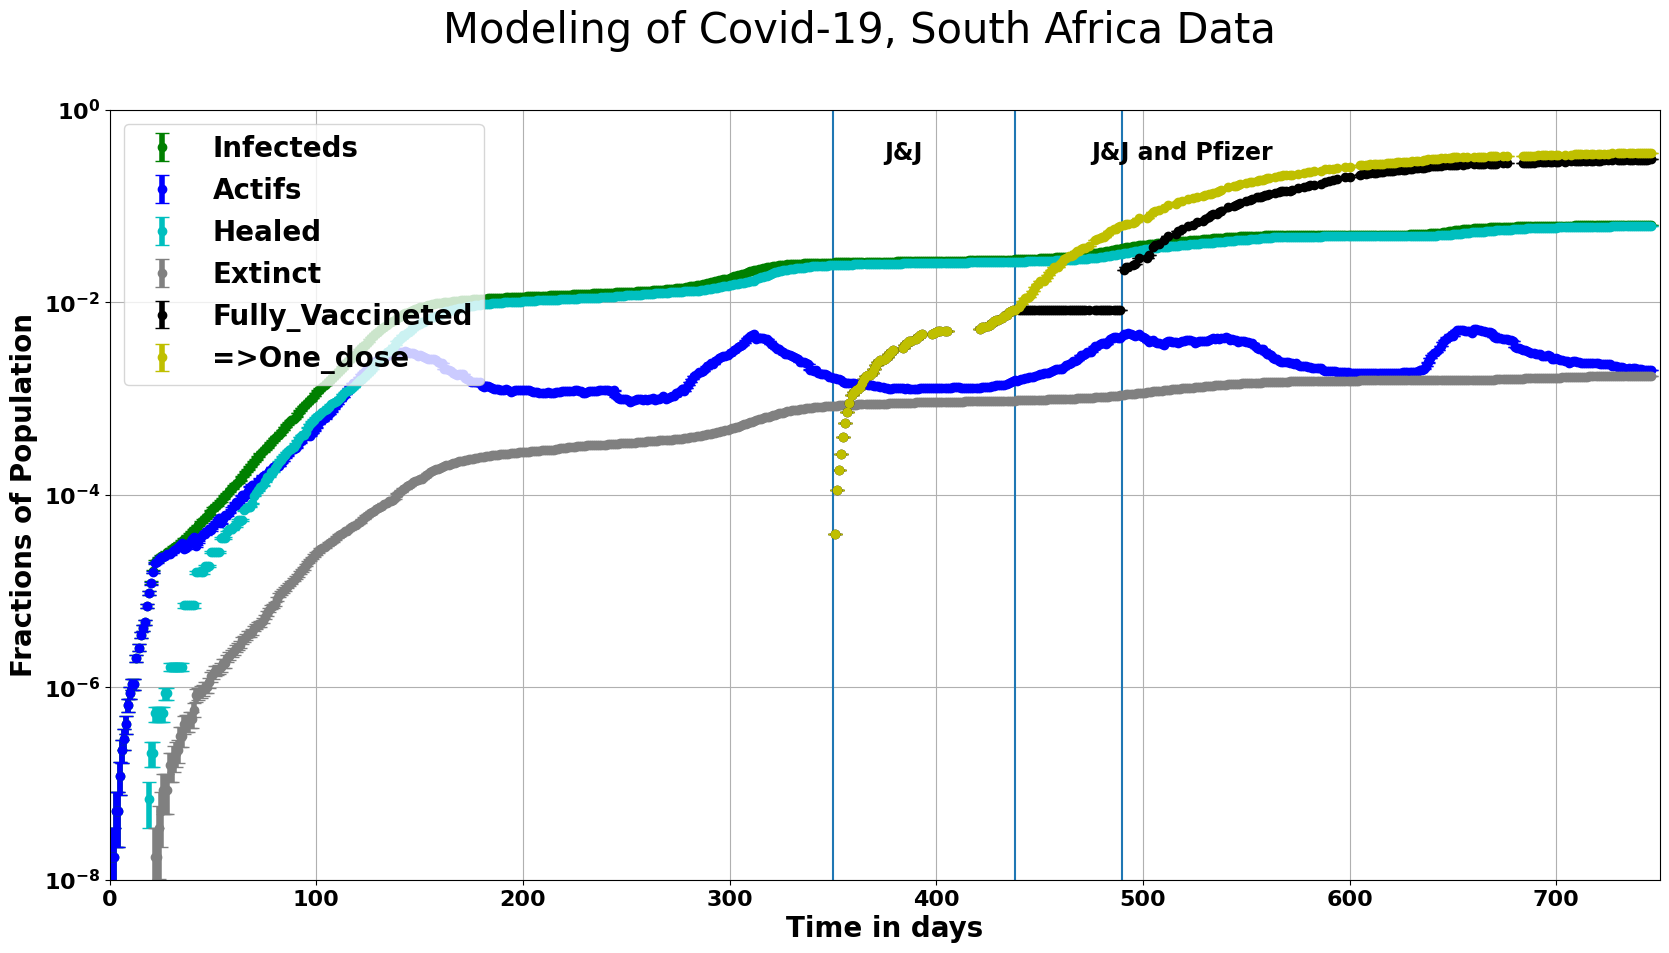

In [23]:
fig = plt.figure()
ax = plt.subplot(111)


plt.errorbar(data_time, Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infecteds', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actifs', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct', elinewidth =4, capsize = 5)

#plt.plot(t, E,'gray',label='E = Extinct',linewidth=2) # plotting t, c separately
#plt.plot(t, actif_sidarthe,'b',label='Actif_S = actif_sidarthe',linewidth=2) # plotting t, c separately
#plt.plot(t, H,'c',label='H = Healed',linewidth=2) # plotting t, b separately
#plt.plot(t, Infected_sidarthe, 'g',label='Infecteds=infected_sidarthee',linewidth=2)
#plt.plot(data['Days_Vaccination'],(data['Fraction_Combinevaccine']),'*',color ='black', label = 'CombineVaccine')
plt.errorbar(data['Days_Vaccination'],(data['Fraction_fully_Vaccineted']),yerr=error_fully_vaccinated,fmt='o',color='black', label = 'Fully_Vaccineted',elinewidth =4, capsize = 5)
plt.errorbar(data['Days_Vaccination'], (data['Fraction_one_dose']), yerr=error_vaccinated,fmt='o',color='y', label = '=>One_dose',elinewidth =4, capsize = 5)

#plt.yscale('log')



plt.grid(True)
#plt.title('Log scale',fontsize=20)
#plt.title('Linear scale', fontsize = 20)
#plt.yscale('linear')
plt.yscale('log')
plt.xlim(0, 750)
plt.ylim(10**-8, 1)
#plt.ylim(0, 2.5*10**-2)
#plt.ylim(0, 7.5*10**-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
fig.suptitle('Modeling of Covid-19, South Africa Data',fontsize=30)
plt.legend()
ax.legend(loc=2, prop={'size': 20})
plt.axvline(350)
plt.axvline(438)
plt.axvline(490)
plt.text(375, 0.3, 'J&J', fontsize=17)
plt.text(475, 0.3, 'J&J and Pfizer', fontsize=17)
fig.savefig('SIDARTHE_model_Vaccination.pdf')

####Not that good
#R0Variaton21Sep2020.pdf
#SIDARTHE_model_variousR021Sep2020.pdf
#SIDARTHE_model_fitting21Sep2020.pdf
#Code: Covid19SAData21Sep20200.py

###Same Results As Prof Ketevi's Results up to day 151, Log Scale
#R0Variaton21Sep20202.pdf
#SIDARTHE_model_variousR021Sep20202.pdf
#SIDARTHE_model_fitting21Sep20202.pdf
#Code: Covid19SAData21Sep20200.py

###Same Results As Prof Ketevi's Results up to day 151, Linear Scale
#R0Variaton21Sep20202LinearScale.pdf
#SIDARTHE_model_variousR021Sep20202LinearScale.pdf
#SIDARTHE_model_fitting21Sep20202LinearScale.pdf
#Code: Covid19SAData21Sep20200LinearScale.py


### 6 months period plots Log Scale @27/28 September 2020
#R0Variaton27Sep20202LinearScale00.pdf
#SIDARTHE_model_variousR027Sep20202LinearScale.pdf
#SIDARTHE_model_fitting27Sep20202LinearScale.pdf


In [24]:
#defining new time to break the vaccination line
#t0=data_time[:347]
t1=data_time[350:406]
t2=data_time[419:489]
t3=data_time[492:600]

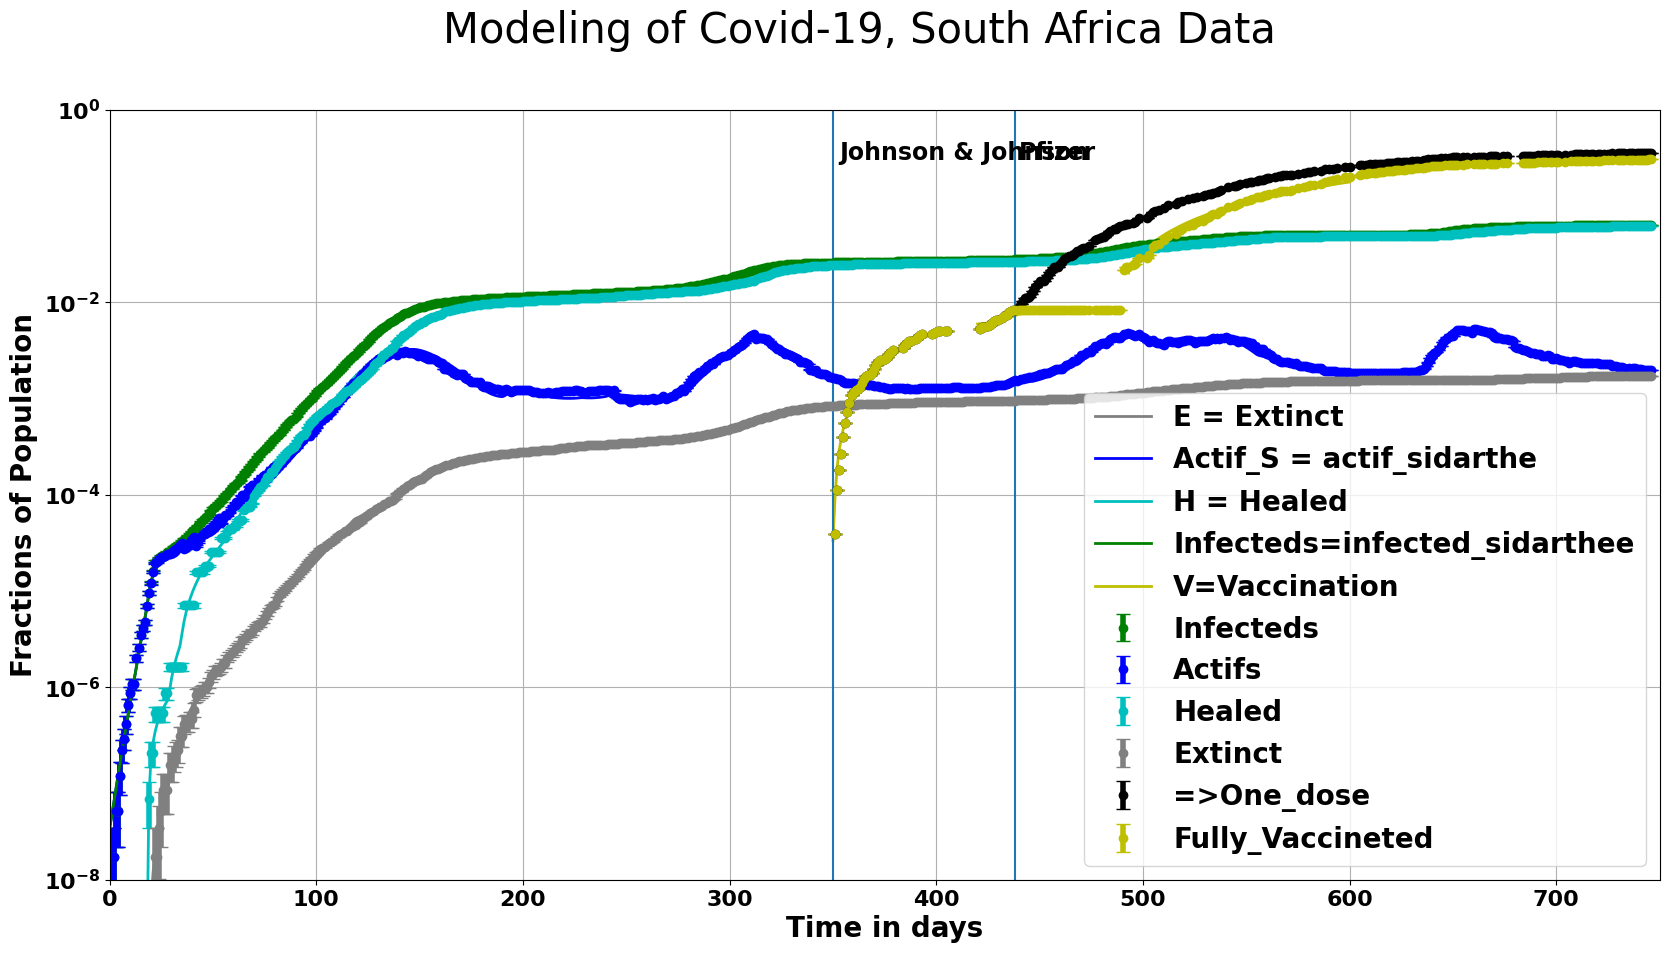

In [25]:
fig = plt.figure()
ax = plt.subplot(111)


plt.errorbar(data_time, Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infecteds', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actifs', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct', elinewidth =4, capsize = 5)

plt.plot(t, E,'gray',label='E = Extinct',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Actif_S = actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H = Healed',linewidth=2) # plotting t, b separately
plt.plot(t, Infected_sidarthe, 'g',label='Infecteds=infected_sidarthee',linewidth=2)
#plt.plot(t0, V[t0], 'y',linewidth=2)
plt.plot(t1, V[t1], 'y',label='V=Vaccination',linewidth=2)
plt.plot(t2, V[t2], 'y',linewidth=2)
plt.plot(t3, V[t3], 'y',linewidth=2)
#plt.plot(data['Days_Vaccination'],(data['Fraction_Combinevaccine']),'*',color ='black', label = 'CombineVaccine')
#plt.plot(data['Days_Vaccination'],(data['Fraction_fully_Vaccineted']),'*', label = 'Fully_Vaccineted')
#plt.plot(data['Days_Vaccination'], (data['Fraction_one_dose']), "*", label = '=>One_Dose')
plt.errorbar(data['Days_Vaccination'], (data['Fraction_one_dose']), yerr=error_vaccinated,fmt='o',color='black', label = '=>One_dose',elinewidth =4, capsize = 5)
plt.errorbar(data['Days_Vaccination'],(data['Fraction_fully_Vaccineted']),yerr=error_fully_vaccinated,fmt='o',color='y', label = 'Fully_Vaccineted',elinewidth =4, capsize = 5)



plt.grid(True)
#plt.title('Log scale',fontsize=20)
#plt.title('Linear scale', fontsize = 20)
#plt.yscale('linear')
plt.yscale('log')
plt.xlim(0, 750)
plt.ylim(10**-8, 10**0)
#plt.ylim(0, 2.5*10**-2)
#plt.ylim(0, 7.5*10**-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
fig.suptitle('Modeling of Covid-19, South Africa Data',fontsize=30)
plt.axvline(350)
plt.axvline(438)
#plt.axvline(568)
plt.text(353, 0.3, 'Johnson & Johnson', fontsize=17)
plt.text(440, 0.3, 'Pfizer', fontsize=17)

plt.legend()
ax.legend(loc=4, prop={'size': 20})
fig.savefig('SIDARTHE_model_fittedwithVaccine.pdf')


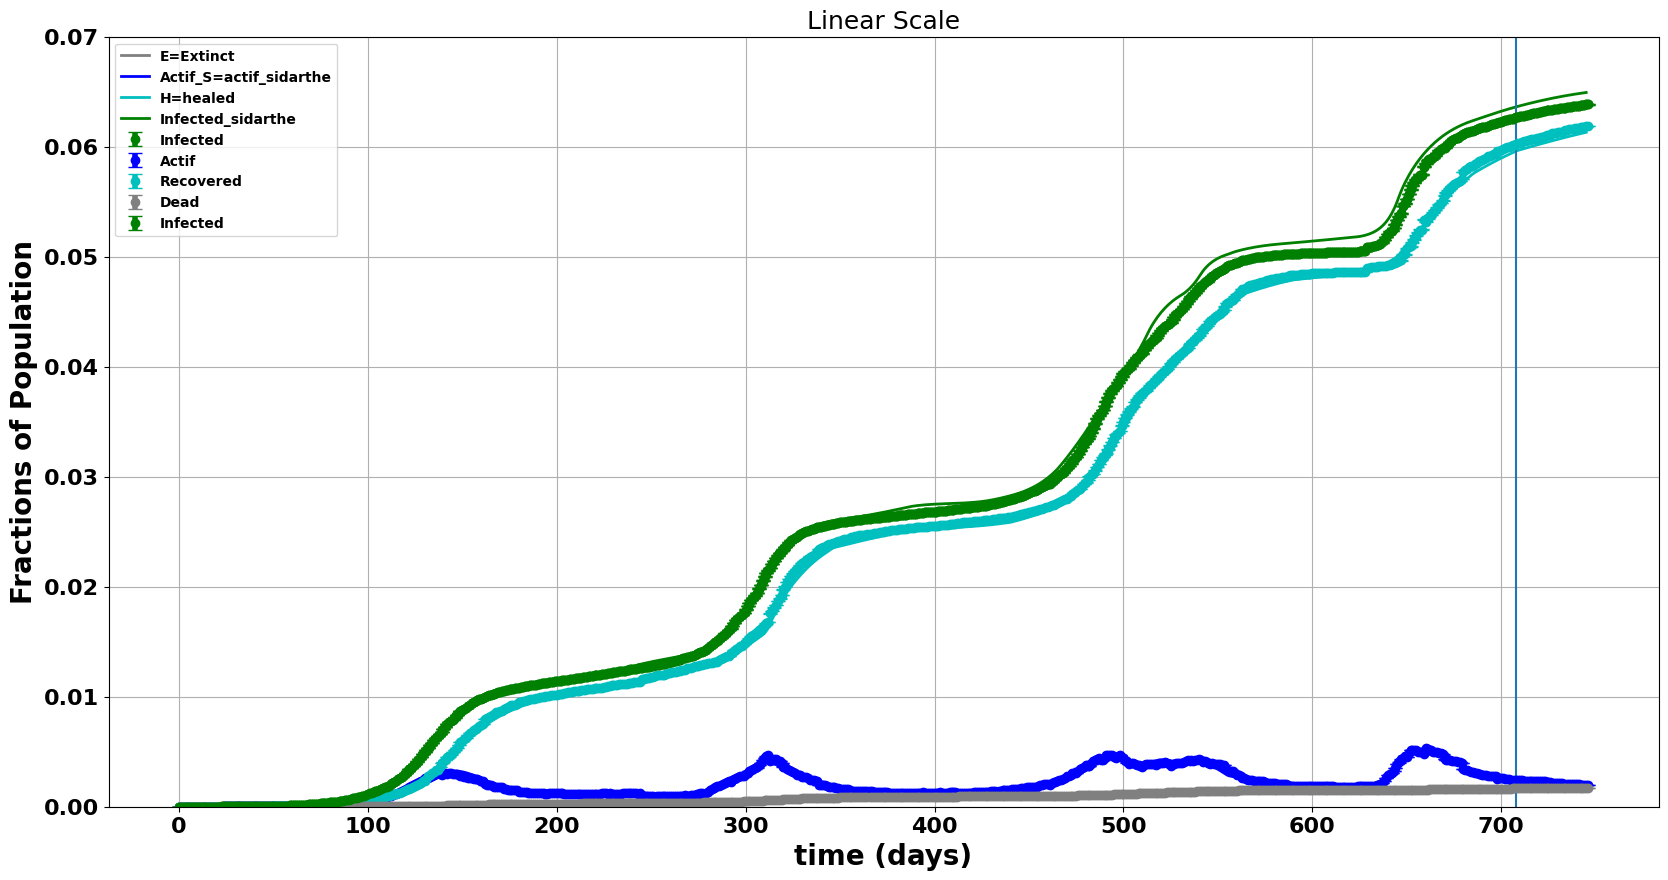

In [26]:

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.title('Linear Scale', fontsize=18)
#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 7*10**-2)
plt.axvline(708)

fig.savefig('SIDARTHE_model_fitting.pdf')


(0.0, 0.002)

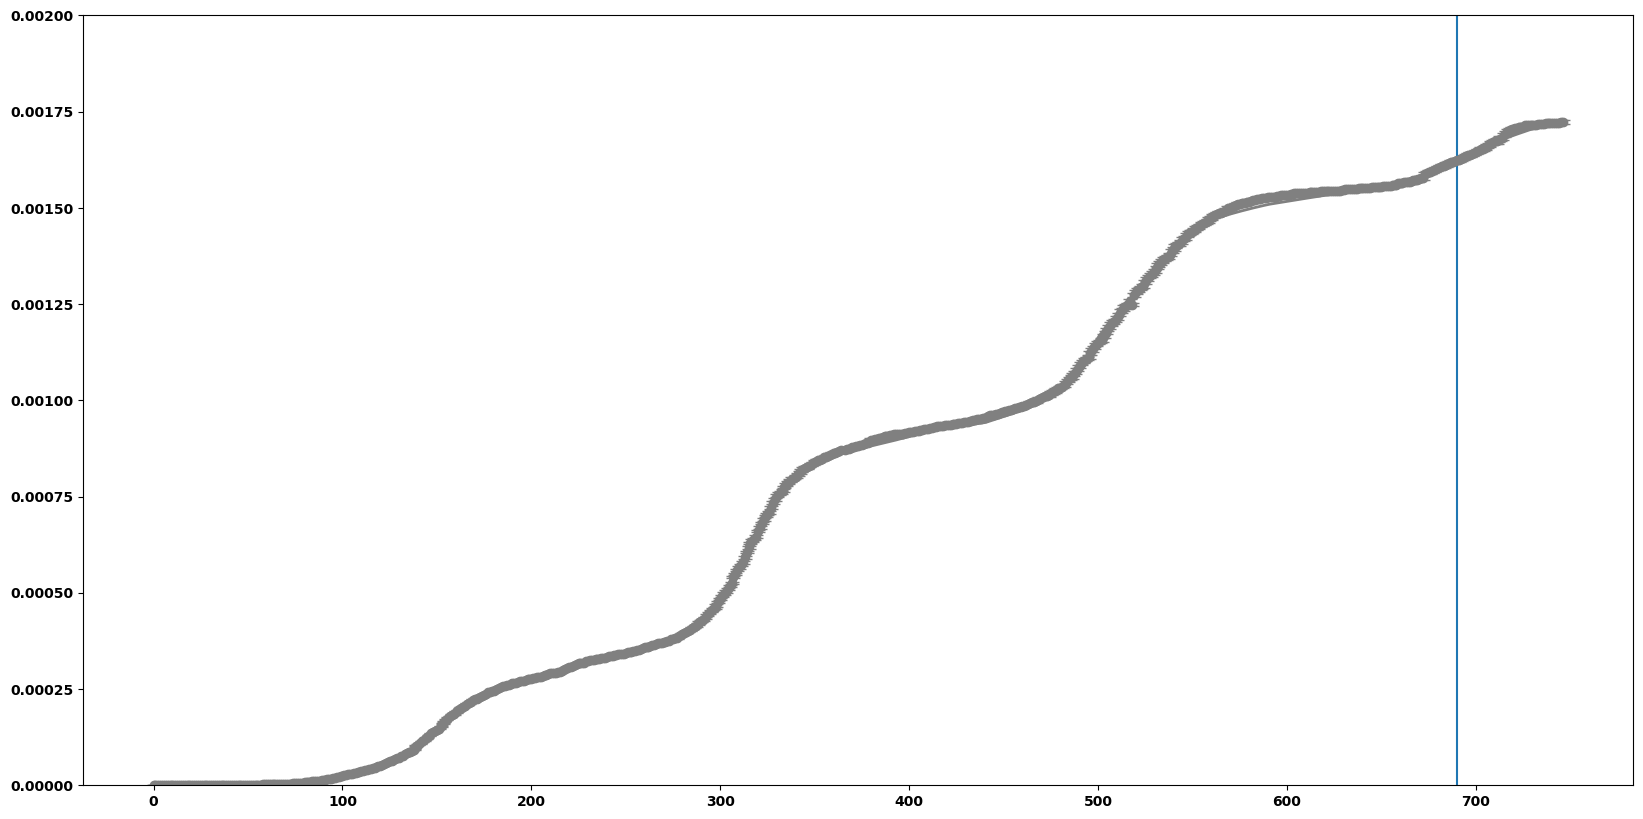

In [27]:
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately
plt.axvline(690)
plt.ylim(0,2*10**-3)


In [28]:
infect=((np.sqrt((data_infected)))/N)
dea=((np.sqrt((data_dead)))/N)
act=((np.sqrt((data_active)))/N)
recov=((np.sqrt((data_recovered)))/N)
vacc=((np.sqrt((vaccination_data)))/N)



uncert_infectedf=np.divide(infect, Infected_sidarthe)
uncert_actif=np.divide(act, actif_sidarthe)
uncert_dead=np.divide(dea, E)
uncert_recovered=np.divide(recov, H)
uncert_vacc=(np.divide(vacc, V))/N



<ipython-input-28-a97d86a607da>:11: RuntimeWarning: invalid value encountered in divide
  uncert_dead=np.divide(dea, E)
<ipython-input-28-a97d86a607da>:12: RuntimeWarning: invalid value encountered in divide
  uncert_recovered=np.divide(recov, H)


<ipython-input-29-c8cdcac3b71d>:38: RuntimeWarning: invalid value encountered in divide
  out2=np.divide(Ddeads, E)
<ipython-input-29-c8cdcac3b71d>:55: RuntimeWarning: invalid value encountered in divide
  out3=np.divide(Drecovereds, H)


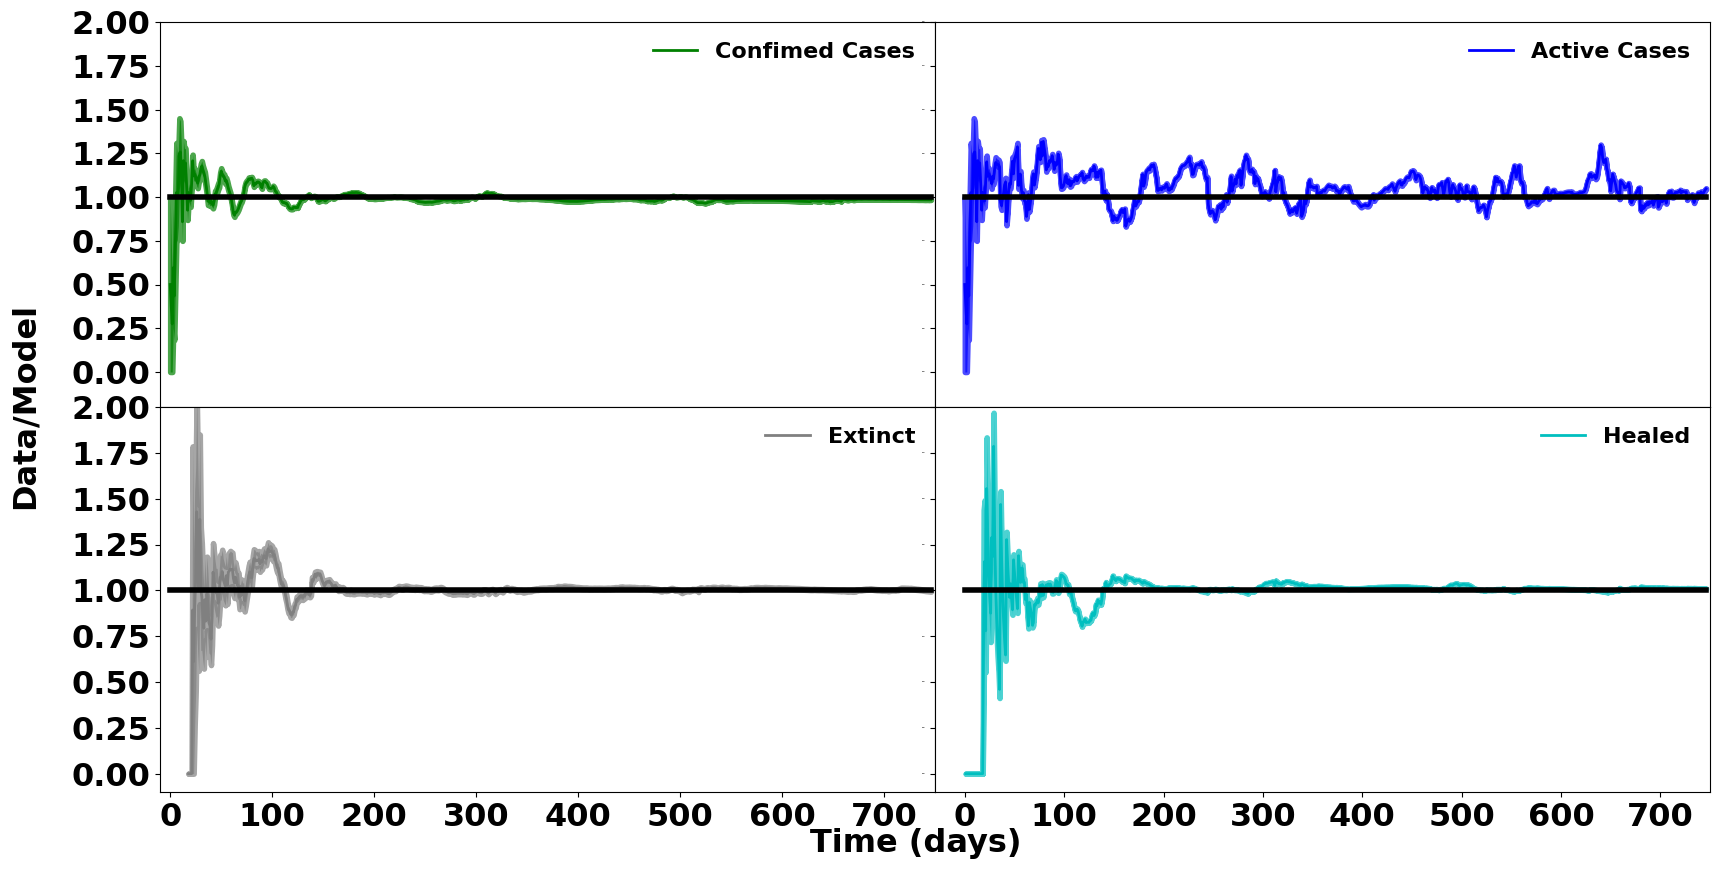

In [29]:
fig = plt.figure()
alpha=0.7
plt.subplot(221)

out=np.divide(Dinfecteds, Infected_sidarthe)
#print('\nOutput arry: \n',out)
plt.plot(data_time,out,'g',label='Confimed Cases',linewidth=2)
plt.plot(data_time,Goodness,'black',linewidth=4)
plt.fill_between(data_time ,out-uncert_infectedf,out+uncert_infectedf,color='g',alpha=alpha, lw=4)

plt.xticks(fontsize=0)
plt.yticks(fontsize=23)
#plt.xlabel("time (days)",fontsize=20)
#plt.ylabel("Data/Model (Confirmed Cases)",fontsize=15)
#plt.title('Goodness of Fit ',fontsize=20)
plt.legend(fontsize=16,frameon=False)
#plt.grid(True)
plt.ylim(-0.2,2)
plt.xlim(-10,750)
plt.subplot(222)
out1=np.divide(Dactifs, actif_sidarthe)
#print('\nOutput arry: \n',out1)
plt.plot(data_time,out1, 'b',label='Active Cases',linewidth=2)
plt.plot(data_time,Goodness,'black',linewidth=4)
plt.fill_between(data_time ,out1-uncert_actif,out1+uncert_actif,color='b',alpha=alpha, lw=4)
plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
#plt.xlabel("time (days)",fontsize=20)
#plt.ylabel("Data/Model (Active Cases)",fontsize=15)
#plt.title('Goodness of Fit ',fontsize=20)
plt.legend(fontsize=16,frameon=False)
#plt.grid(True)
plt.ylim(-0.2,2)
plt.xlim(-30,750)


plt.subplot(223)
out2=np.divide(Ddeads, E)
#print('\nOutput arry: \n',out2)
plt.plot(data_time,out2, 'gray',label='Extinct',linewidth=2)
plt.plot(data_time,Goodness, 'black',linewidth=4)
plt.fill_between(data_time ,out2-uncert_dead,out2+uncert_dead,color='gray',alpha=alpha, lw=4)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
plt.xlim(-10,750)
#plt.xlabel("Time (days)",fontsize=20)
#plt.ylabel('Data/Model (Extinct)',fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend(fontsize=16,frameon=False)
#plt.grid(True)
plt.ylim(-0.1,2)


plt.subplot(224)
out3=np.divide(Drecovereds, H)
#print('\nOutput arry: \n',out3)
plt.plot(data_time,out3, 'c',label='Healed',linewidth=2)
plt.plot(data_time,Goodness, 'black',linewidth=4)
plt.fill_between(data_time ,out3-uncert_recovered,out3+uncert_recovered,color='c',alpha=alpha, lw=4)
plt.xticks(fontsize=23)
plt.yticks(fontsize=0)
#plt.xlabel("Time (days)",fontsize=20)
#plt.ylabel("Data/Model (Healed)",fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend(fontsize=16,frameon=False)
#plt.grid(True)
plt.ylim(-0.1,2)
plt.xlim(-30,750)
plt.subplots_adjust(wspace=.0,hspace=.0)
fig.text(0.05, 0.4, "Data/Model", rotation='vertical',fontsize=23)
fig.text(0.45, 0.05, "Time (days)", rotation='horizontal',fontsize=23)

fig.savefig('Goodnessoffitting.pdf')


In [30]:
N= 5.8e+7
Dvacc=[]
for i in vaccination_data:
    Dvacc.append(i/N)

print(len(Dvacc))


746


<ipython-input-31-c05543307c06>:3: RuntimeWarning: divide by zero encountered in divide
  out4=np.divide(Dvacc, V)


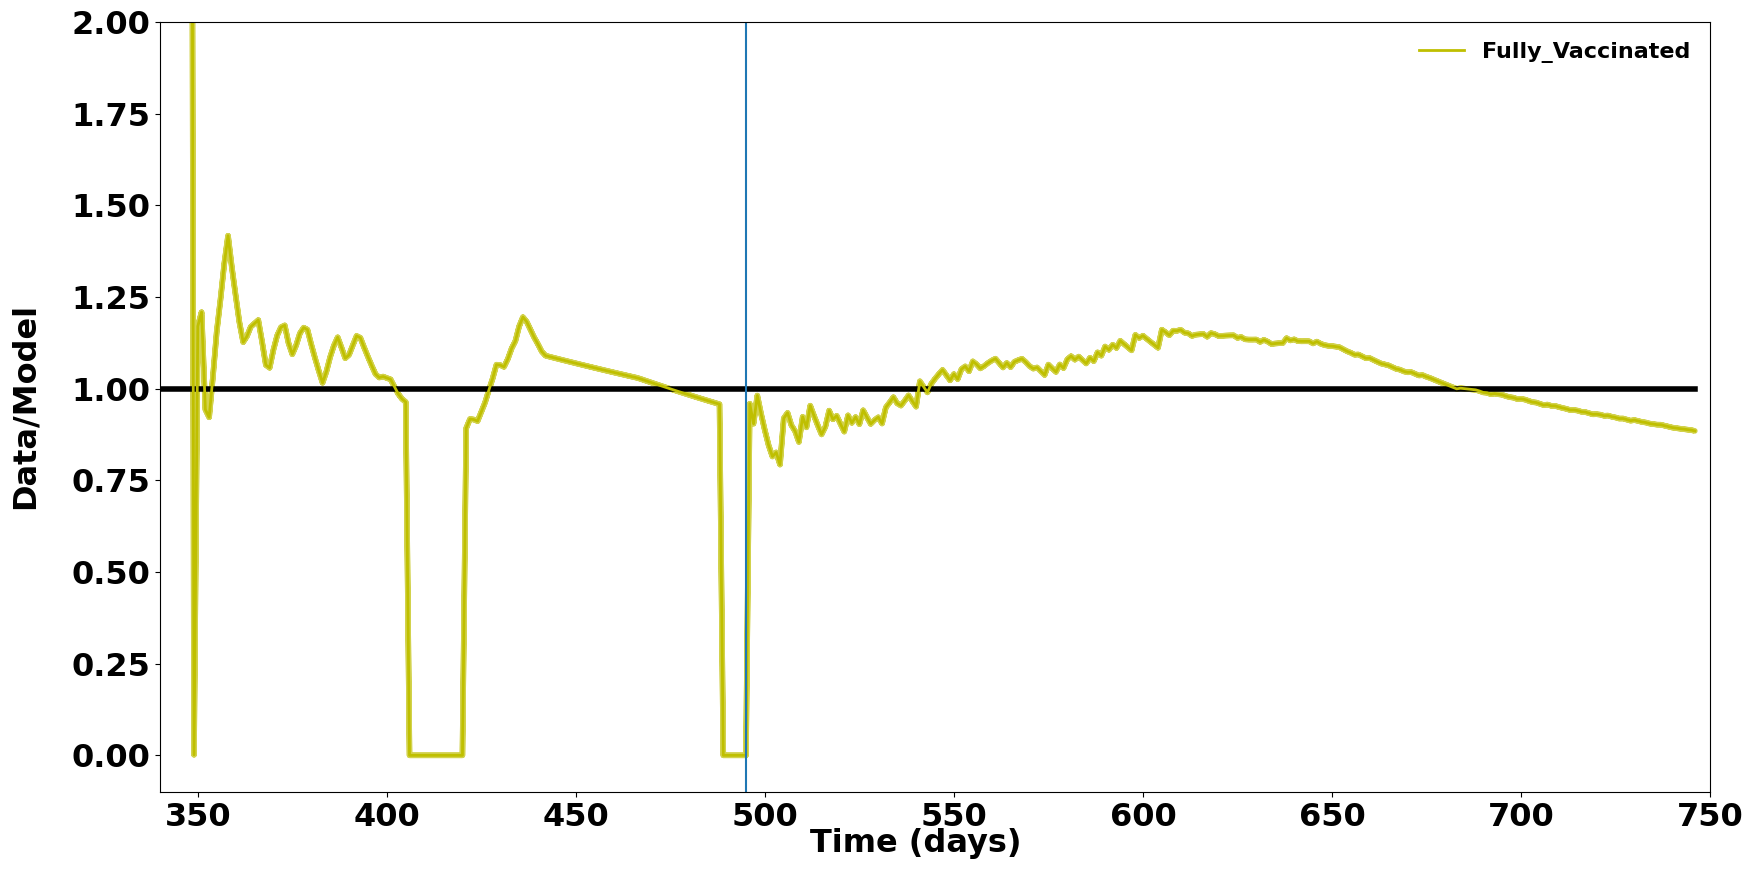

In [31]:
fig = plt.figure()
alpha=0.7
out4=np.divide(Dvacc, V)
#print('\nOutput arry: \n',out3)
plt.plot(data_time,Goodness, 'black',linewidth=4)
plt.plot(data_time,out4, 'y',label='Fully_Vaccinated',linewidth=2)
plt.fill_between(data_time ,out4-uncert_vacc,out4+uncert_vacc,color='y',alpha=alpha, lw=4)
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
#plt.xlabel("Time (days)",fontsize=20)
#plt.ylabel("Data/Model (Healed)",fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend(fontsize=16,frameon=False)
#plt.grid(True)
plt.axvline(495)
#plt.axvline(495)

plt.ylim(-0.1,2)
plt.xlim(340,750)
fig.text(0.05, 0.4, "Data/Model", rotation='vertical',fontsize=23)
fig.text(0.45, 0.05, "Time (days)", rotation='horizontal',fontsize=23)

fig.savefig('Goodnessoffitting11.pdf')

In [32]:
#t0=data_time[352:402]
#t1=data_time[423:488]
#t2=data_time[496:-1]
#defining new time to break the vaccination line
#t0=data_time[:347]
t1=data_time[350:403]
t2=data_time[421:487]
t3=data_time[494:-1]

<ipython-input-33-440dae3345b7>:3: RuntimeWarning: divide by zero encountered in divide
  out4=np.divide(Dvacc, V)


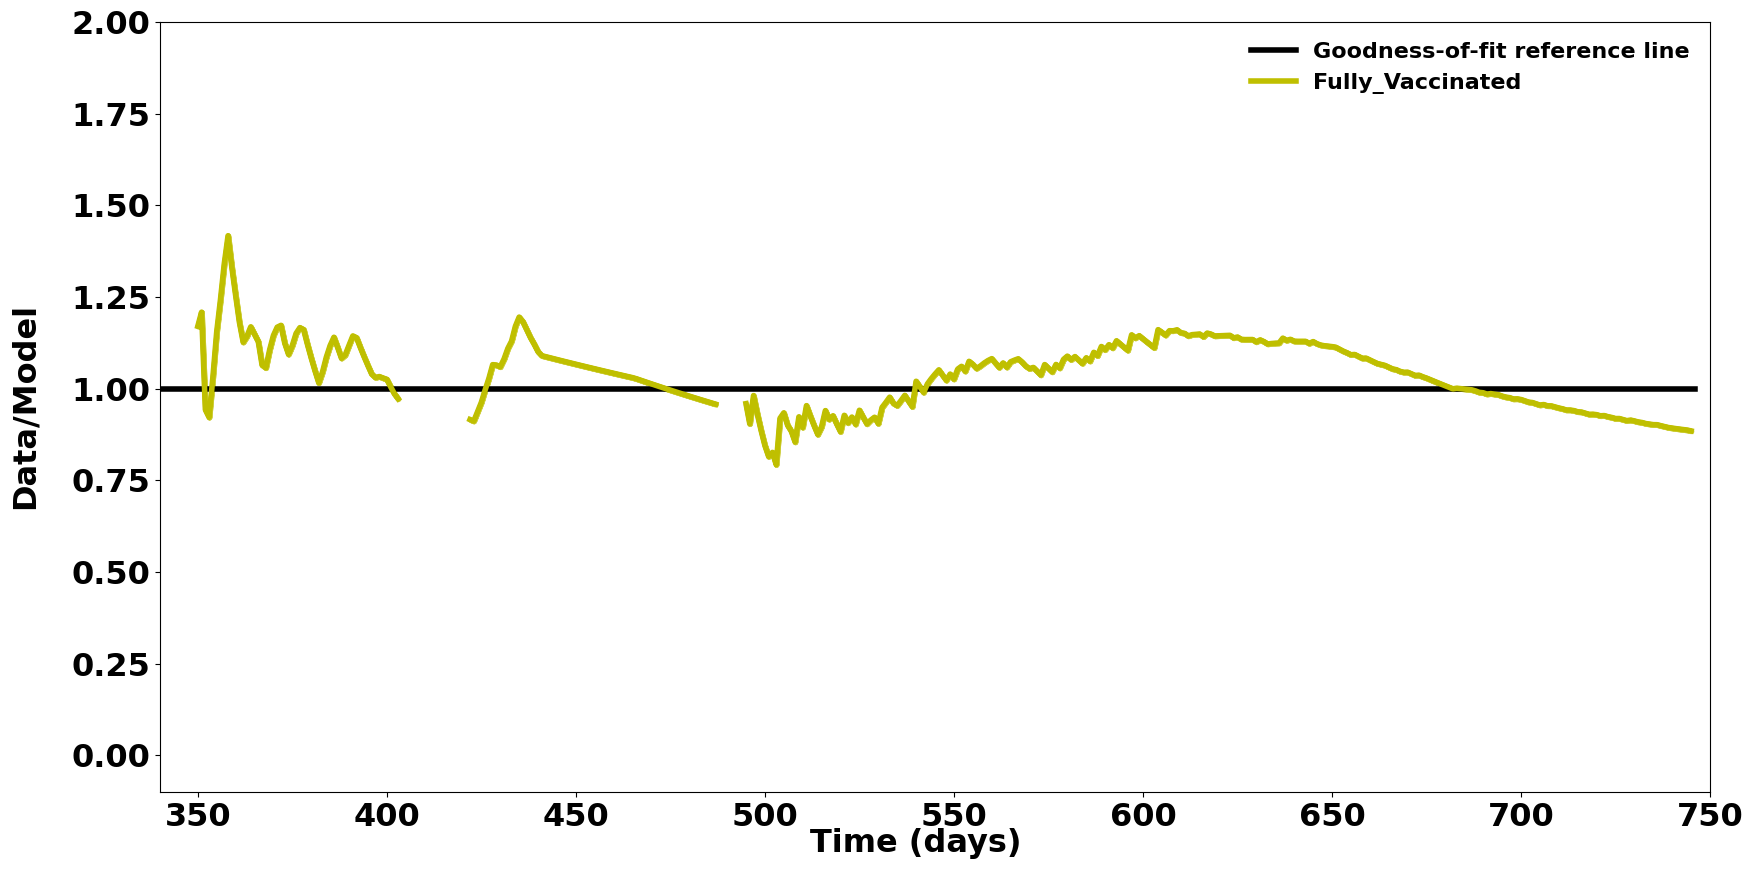

In [33]:
fig = plt.figure()
alpha=0.7
out4=np.divide(Dvacc, V)
#print('\nOutput arry: \n',out3)
plt.plot(data_time,Goodness, 'black',label = 'Goodness-of-fit reference line',linewidth=4)
plt.plot(t1,out4[t1], 'y',label='Fully_Vaccinated',linewidth=4)
plt.plot(t2,out4[t2], 'y',linewidth=4)
plt.plot(t3,out4[t3], 'y',linewidth=4)


plt.fill_between(t1 ,out4[t1]-uncert_vacc[t1],out4[t1]+uncert_vacc[t1],color='y',alpha=alpha, lw=4)
plt.fill_between(t2 ,out4[t2]-uncert_vacc[t2],out4[t2]+uncert_vacc[t2],color='y',alpha=alpha, lw=4)
plt.fill_between(t3 ,out4[t3]-uncert_vacc[t3],out4[t3]+uncert_vacc[t3],color='y',alpha=alpha, lw=4)

plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
#plt.xlabel("Time (days)",fontsize=20)
#plt.ylabel("Data/Model (Healed)",fontsize=15)
#plt.title('Goodness of Fittings ',fontsize=20)
plt.legend(fontsize=16,frameon=False)
#plt.grid(True)
#plt.axvline(490)
#plt.axvline(495)

plt.ylim(-0.1,2)
plt.xlim(340,750)
fig.text(0.05, 0.4, "Data/Model", rotation='vertical',fontsize=23)
fig.text(0.45, 0.05, "Time (days)", rotation='horizontal',fontsize=23)

fig.savefig('Goodnessoffittingvaccinatio.pdf')

In [34]:
t1=data_time[350:403]
t2=data_time[421:487]
t3=data_time[494:-1]

<ipython-input-35-4542099115ca>:5: RuntimeWarning: divide by zero encountered in divide
  out5=np.divide(Dvacc, V)


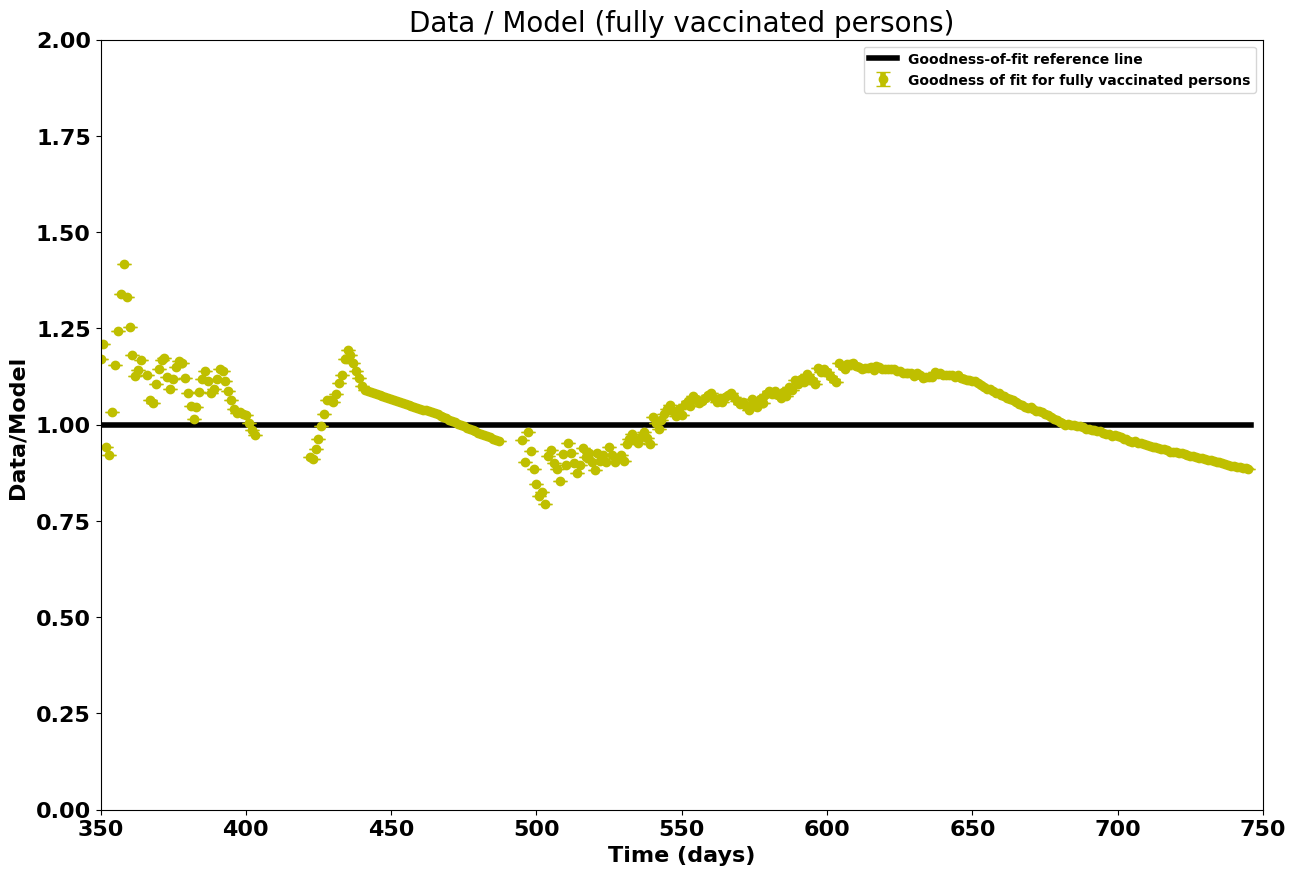

In [35]:
fig = plt.figure(figsize=(15,10))
alpha=0.7


out5=np.divide(Dvacc, V)
#print('\nOutput arry: \n',out)
#plt.plot(data_time,out,'g',linewidth=2)
#plt.plot(data_time,Goodness,'y')
# plt.plot(t1,out5[t1], 'y',label='Data/Model(Totaly Vaccineted)',linewidth=4)
# plt.plot(t2,out5[t2], 'y',linewidth=4)
# plt.plot(t3,out5[t3], 'y',linewidth=4)

#plt.fill_between(data_time ,out5-uncert_dosage,out5+uncert_dosage,color='y',alpha=alpha)
#plt.fill_between(t1 ,out5[t1]-uncert_dosage[t1],out5[t1]+uncert_dosage[t1],color='y',alpha=alpha)
#plt.fill_between(t2 ,out5[t2]-uncert_dosage[t2],out5[t2]+uncert_dosage[t2],color='y',alpha=alpha)
#plt.fill_between(t3 ,out5[t3]-uncert_dosage[t3],out5[t3]+uncert_dosage[t3],color='y',alpha=alpha)

#plt.errorbar(data_time ,out,yerr=uncert_dosage,fmt='o', color='g',label='Dead',elinewidth=4,capsize=10)

plt.plot(data_time,Goodness,'black',linewidth=4,label='Goodness-of-fit reference line')
#plt.fill_between(data_time ,out5-uncert_vaccine,out5+uncert_vaccine,color='y',alpha=alpha)
plt.errorbar(t1,out5[t1],yerr=uncert_vacc[t1],fmt='o', color='y',label='Goodness of fit for fully vaccinated persons',elinewidth=4,capsize=5)
plt.errorbar(t2,out5[t2],yerr=uncert_vacc[t2],fmt='o', color='y',elinewidth=4,capsize=5)
plt.errorbar(t3,out5[t3],yerr=uncert_vacc[t3],fmt='o', color='y',elinewidth=4,capsize=5)

#plt.scatter(data_time,out5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time (days)",fontsize=16)
plt.ylabel("Data/Model ",fontsize=16)
plt.title('Data / Model (fully vaccinated persons)',fontsize=20)
#plt.title('Goodness For Totaly Vaccinated ',fontsize=30)
plt.legend()
#plt.grid(True)
plt.ylim(0,2)
plt.xlim(350,750)

plt.savefig("GoodnessSA", dpi=300, bbox_inches='tight')


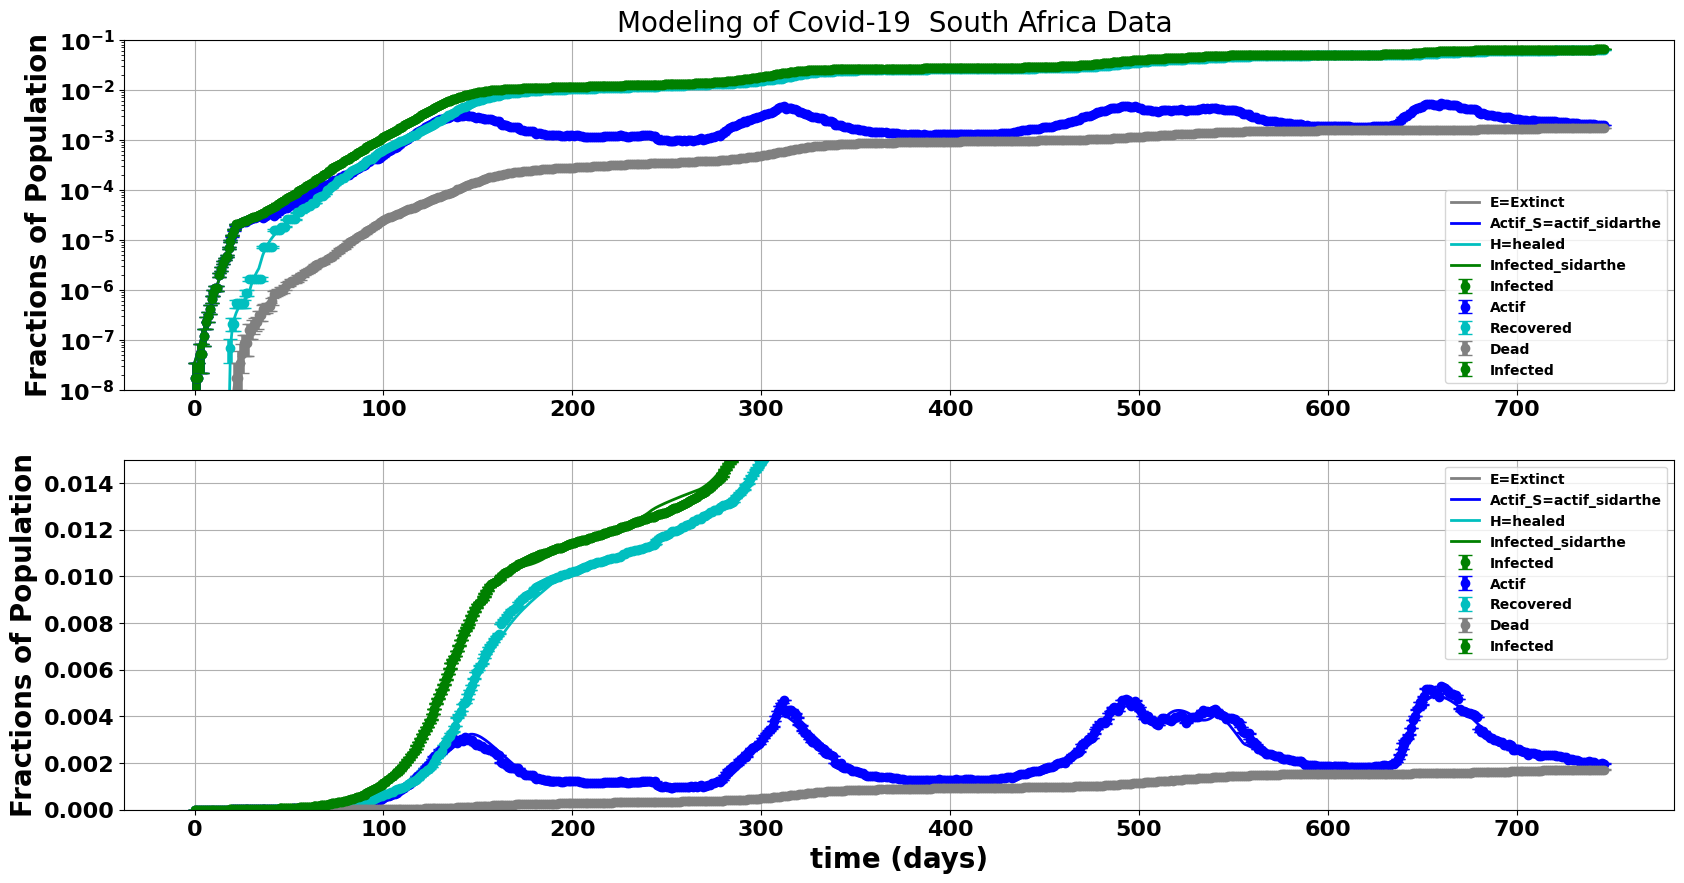

In [36]:
fig = plt.figure()
#ax = plt.subplot(111)



#plt.semilogy(ax1.text(0.5,0.5,'left', color='r',fontsize=18, ha='center')'o',label='Infecteds',linewidth=6,color='g')
#plt.semilogy(data_time ,Dactifs,'o',label='Actifs',linewidth=6,color='b')
#plt.semilogy(data_time ,Drecovereds,'o',label='Recovered',linewidth=6,color='c')
#plt.semilogy(data_time ,Ddeads,'o',label='Dead',linewidth=6,color='gray')



plt.subplot(211)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)
plt.yscale('log')
plt.ylim(10**-8, 10**-1)
plt.grid(True)
#plt.ylim(0, 2*10**-4)

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Fractions of Population",fontsize=20)
plt.title('Modeling of Covid-19  South Africa Data ',fontsize=20)
plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-2)
plt.grid(True)
plt.subplot(212)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Recovered',elinewidth=4,capsize=5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Dead',elinewidth=4,capsize=5)
plt.plot(t, E,'gray',label='E=Extinct',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H=healed',linewidth=2) # plotting t, b separately
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=20)

plt.legend()
ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 1.5*10**-2)

fig.savefig('SIDARTHE_model_fitting.pdf')


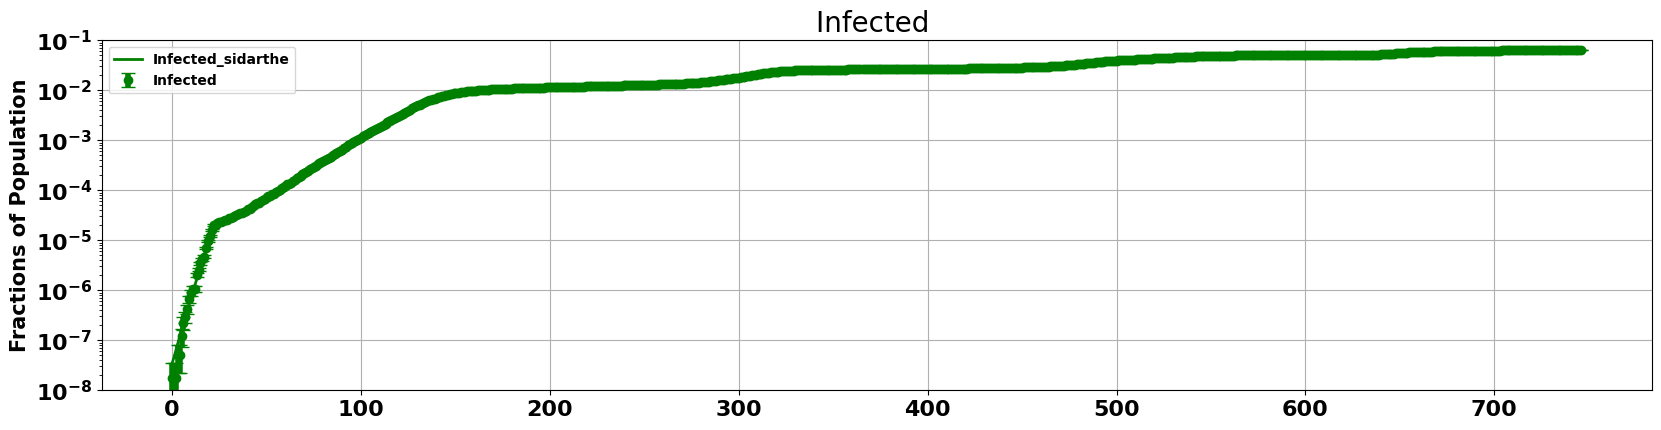

In [37]:
plt.subplot(211)
plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Infected ',fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)
plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-8, 10**-1)
plt.grid(True)

#plt.subplot(212)
#plt.plot(t, Infected_sidarthe, 'g',label='Infected_sidarthe',linewidth=2)

#plt.errorbar(data_time ,Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infected',elinewidth=4,capsize=5)
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=20)
#plt.ylabel("Fractions of Population",fontsize=15)

#plt.legend()
#ax.legend(loc=2, prop={'size': 15})

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
#plt.grid(True)
#plt.ylim(0, 1.5*10**-2)


(0.0, 0.006)

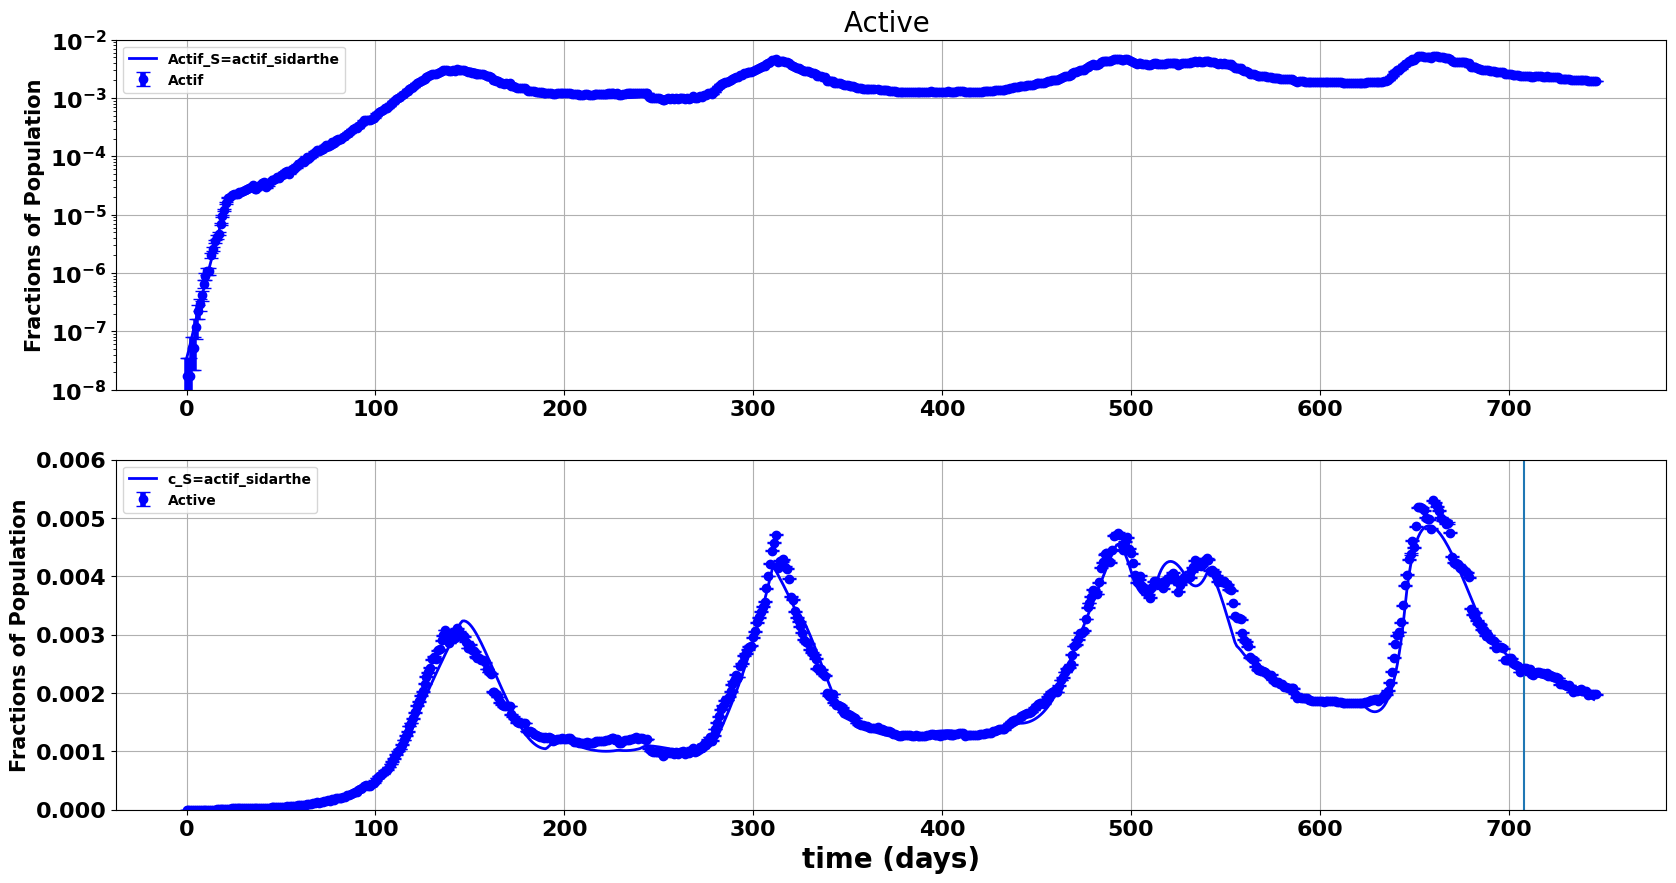

In [38]:
plt.subplot(211)
plt.plot(t, actif_sidarthe,'b',label='Actif_S=actif_sidarthe',linewidth=2) # plotting t, c separatel
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actif',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel("time (days)",fontsize=15)
plt.title('Active ',fontsize=20)
plt.legend()
plt.ylabel("Fractions of Population",fontsize=15)
ax.legend(loc=2, prop={'size': 15})
plt.yscale('log')
plt.ylim(10**-8, 10**-2)
plt.grid(True)

plt.subplot(212)
plt.plot(t, actif_sidarthe,'b',label='c_S=actif_sidarthe',linewidth=2) # plotting t, c separately
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("time (days)",fontsize=20)
plt.ylabel("Fractions of Population",fontsize=15)

plt.legend()
ax.legend(loc=2, prop={'size': 15})
plt.axvline(708)

#plt.yscale('log')
#plt.ylim(10**-8, 10**-3)
plt.grid(True)
plt.ylim(0, 6*10**-3)


<ipython-input-39-75b61f32623c>:5: RuntimeWarning: invalid value encountered in divide
  dR0syst=R0*((U)/(H))*N


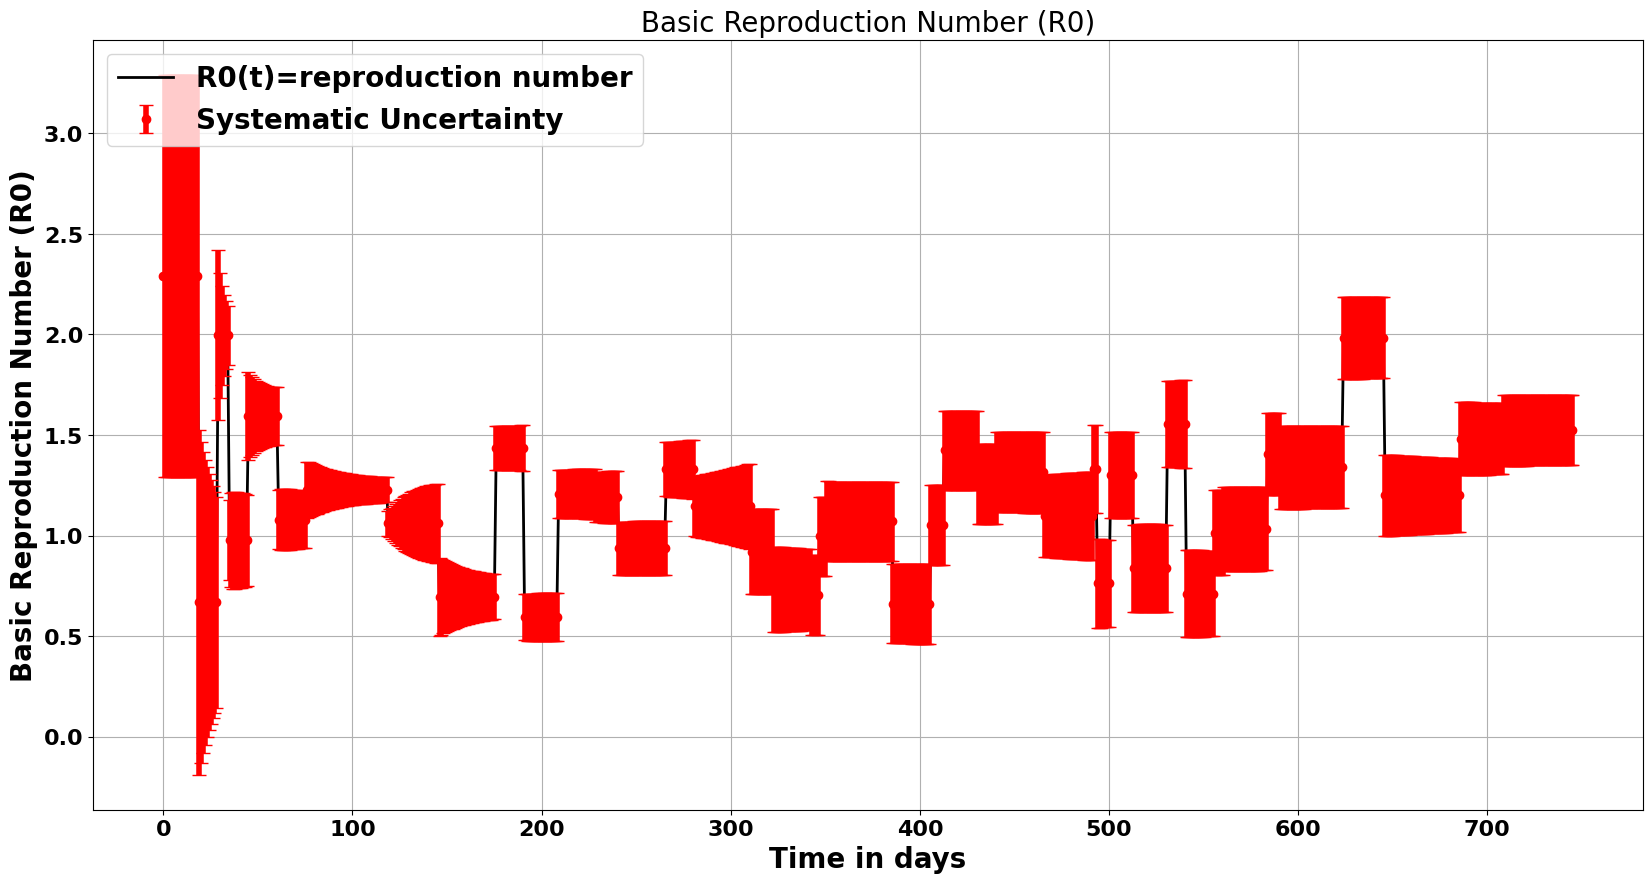

In [39]:
#U=lamda2(t)*I
#print(len(I))

N=5.8e+7
dR0syst=R0*((U)/(H))*N


DR0= np.sqrt((dR0st*dR0st)+(dR0syst*dR0syst))

par=0.57,0.0114,0.0114,0.456,0.171,0.1254,0.0342,0.1254, 0.0342, 0.3705,0.0171,0.0171,0.0274,0.0171,0.0171,0.1605,0,0,0
R0=[]
parm=[]
t1=[]
for i in range(len(data_time)):
   # print(rzero(t,par))
    R0.append( rzero(i,par)[0])
    parm.append( rzero(i,par)[1])
    t1.append(i)
#print(R0)
#print(parm)
t= np.array(t1, dtype=float)
#print(t)
#t2 = np.linspace(0, 85, 86)
parm[0]
par1= np.array(parm, dtype=float)




alpha1=[]
beta1=[]
delta1=[]
gamma1=[]
epsilon1=[]
zeta1=[]
lamda1=[]
eta1=[]
rho1=[]
theta1=[]
mu1=[]
kappa1=[]
nu1=[]
chi1=[]
sigma1=[]
taua1=[]
phi1=[]
alphap1=[]
taub1=[]

for i in range(len(data_time)):
    alpha1.append(par1[i][0])
    beta1.append(par1[i][1])
    delta1.append(par1[i][2])
    gamma1.append(par1[i][3])
    epsilon1.append(par1[i][4])
    zeta1.append(par1[i][5])
    lamda1.append(par1[i][6])
    eta1.append(par1[i][7])
    rho1.append(par1[i][8])
    theta1.append(par1[i][9])
    mu1.append(par1[i][10])
    kappa1.append(par1[i][11])
    nu1.append(par1[i][12])
    chi1.append(par1[i][13])
    sigma1.append(par1[i][14])
    taua1.append(par1[i][15])
    phi1.append(par1[i][16])
    alphap1.append(par1[i][17])
    taub1.append(par1[i][18])



#tau


alpha2=np.array(alpha1)
beta2=np.array(beta1)
delta2=np.array(delta1)
gamma2=np.array(gamma1)
epsilon2=np.array(epsilon1)
zeta2=np.array(zeta1)
lamda2=np.array(lamda1)
eta2=np.array(eta1)
rho2=np.array(rho1)
theta2=np.array(theta1)
mu2=np.array(mu1)
kappa2=np.array(kappa1)
nu2=np.array(nu1)
chi2=np.array(chi1)
sigma2=np.array(sigma1)
taua2=np.array(taua1)
phi2=np.array(phi1)
alphap2=np.array(alphap1)
taub2=np.array(taub1)

plt.rcParams["font.weight"] #= \"bold\"
plt.rcParams["axes.labelweight"] #= \"bold\"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
# Plotting The reproduction number


fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately
#plt.plot(t,dR0syst,'r', label='R0(t)=reproduction number',linewidth=2)
plt.errorbar(t ,R0,dR0syst, fmt='o',color='r',label='Systematic Uncertainty',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(' Basic Reproduction Number (R0) ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
#plt.show()
plt.savefig("SA_R(0).pdf")


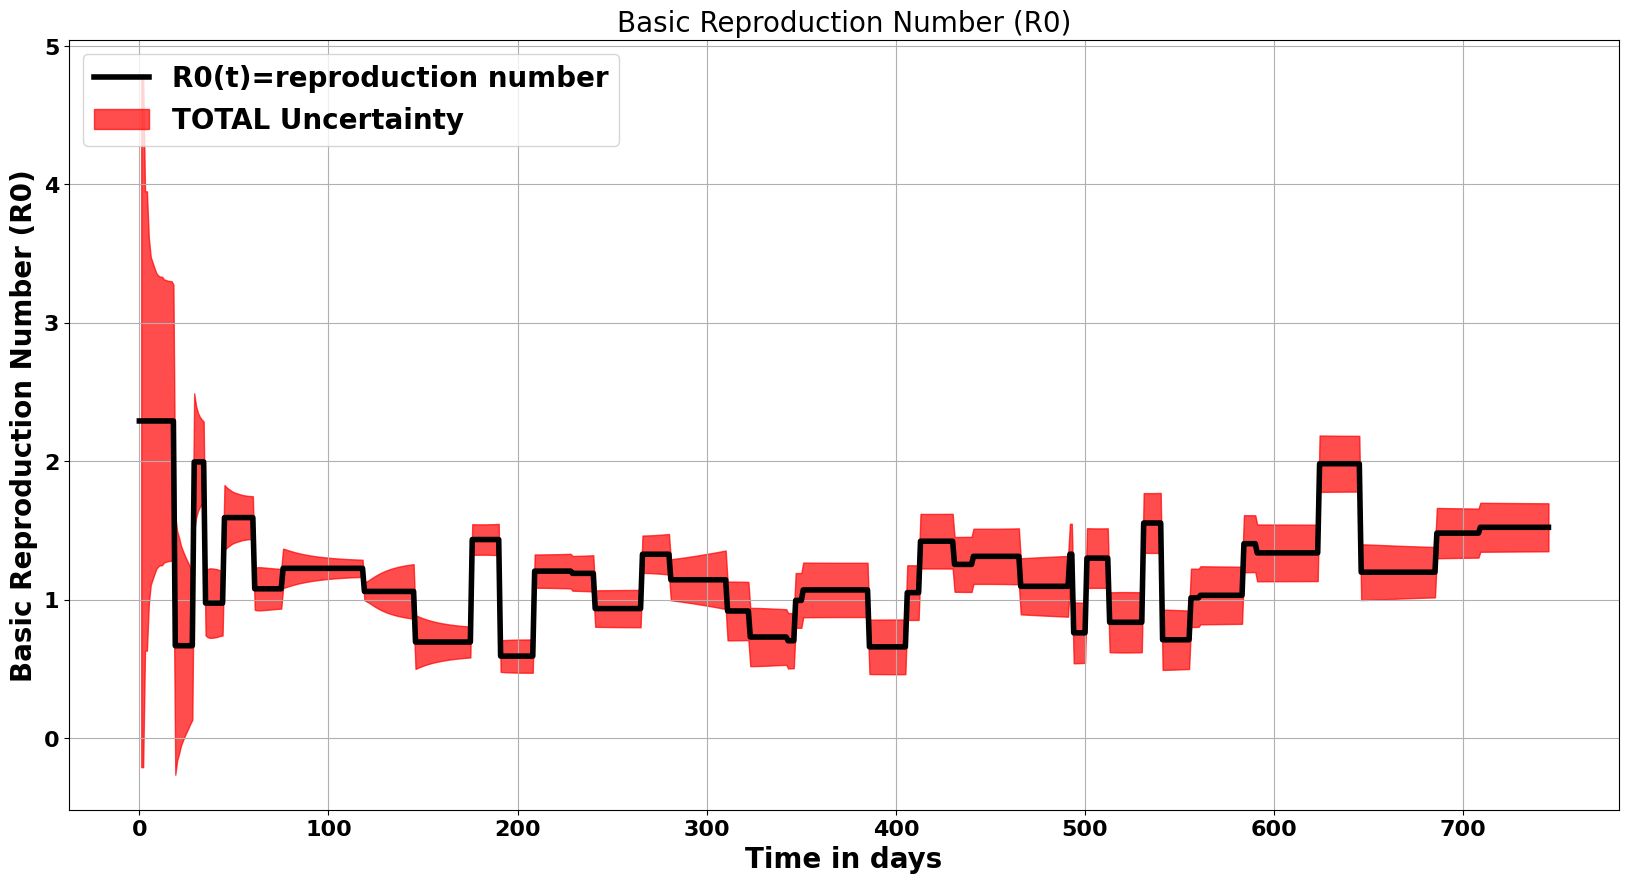

In [40]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately
plt.fill_between(t ,R0-DR0,R0+DR0,color='r',alpha=alpha,label='TOTAL Uncertainty')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.show()
fig.savefig('R0total_uncertainty_error_band.pdf')


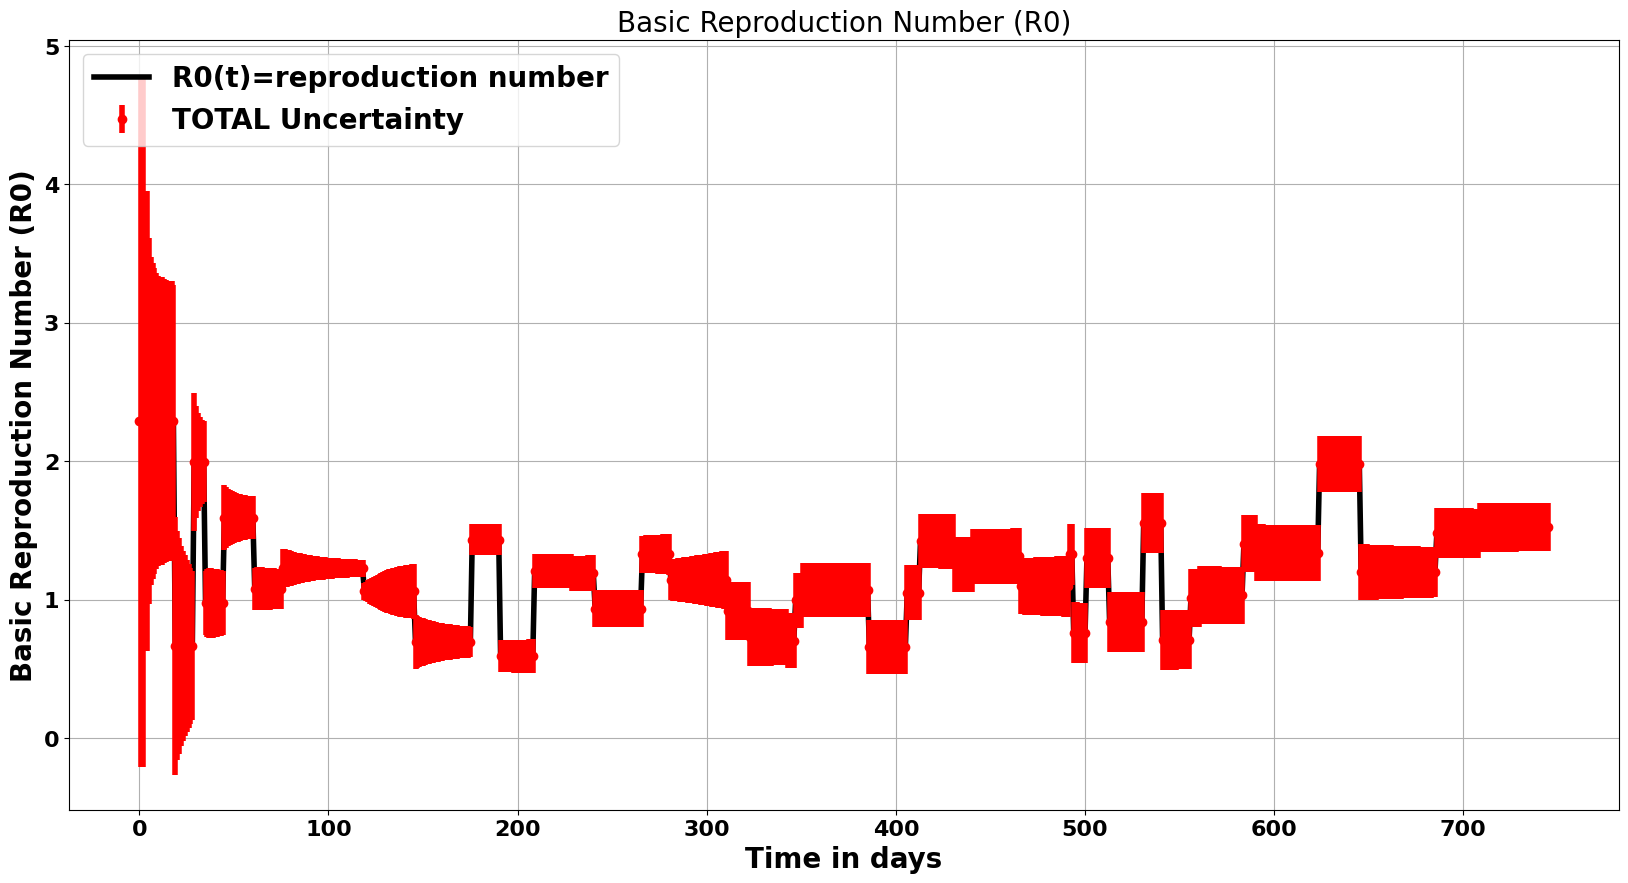

In [41]:
alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=4) # plotting t, c separately
plt.errorbar(t ,R0,yerr=DR0,fmt='o',color='r',label='TOTAL Uncertainty', lw=4)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.show()
fig.savefig('R0_total_uncertainty_error_bar.pdf')

In [42]:
#defining new time to break the vaccination line
t0=data_time[:348]
t1=data_time[350:406]
t2=data_time[419:489]
t3=data_time[492:-1]

<ipython-input-43-d5c33d1f85bd>:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 4.9)


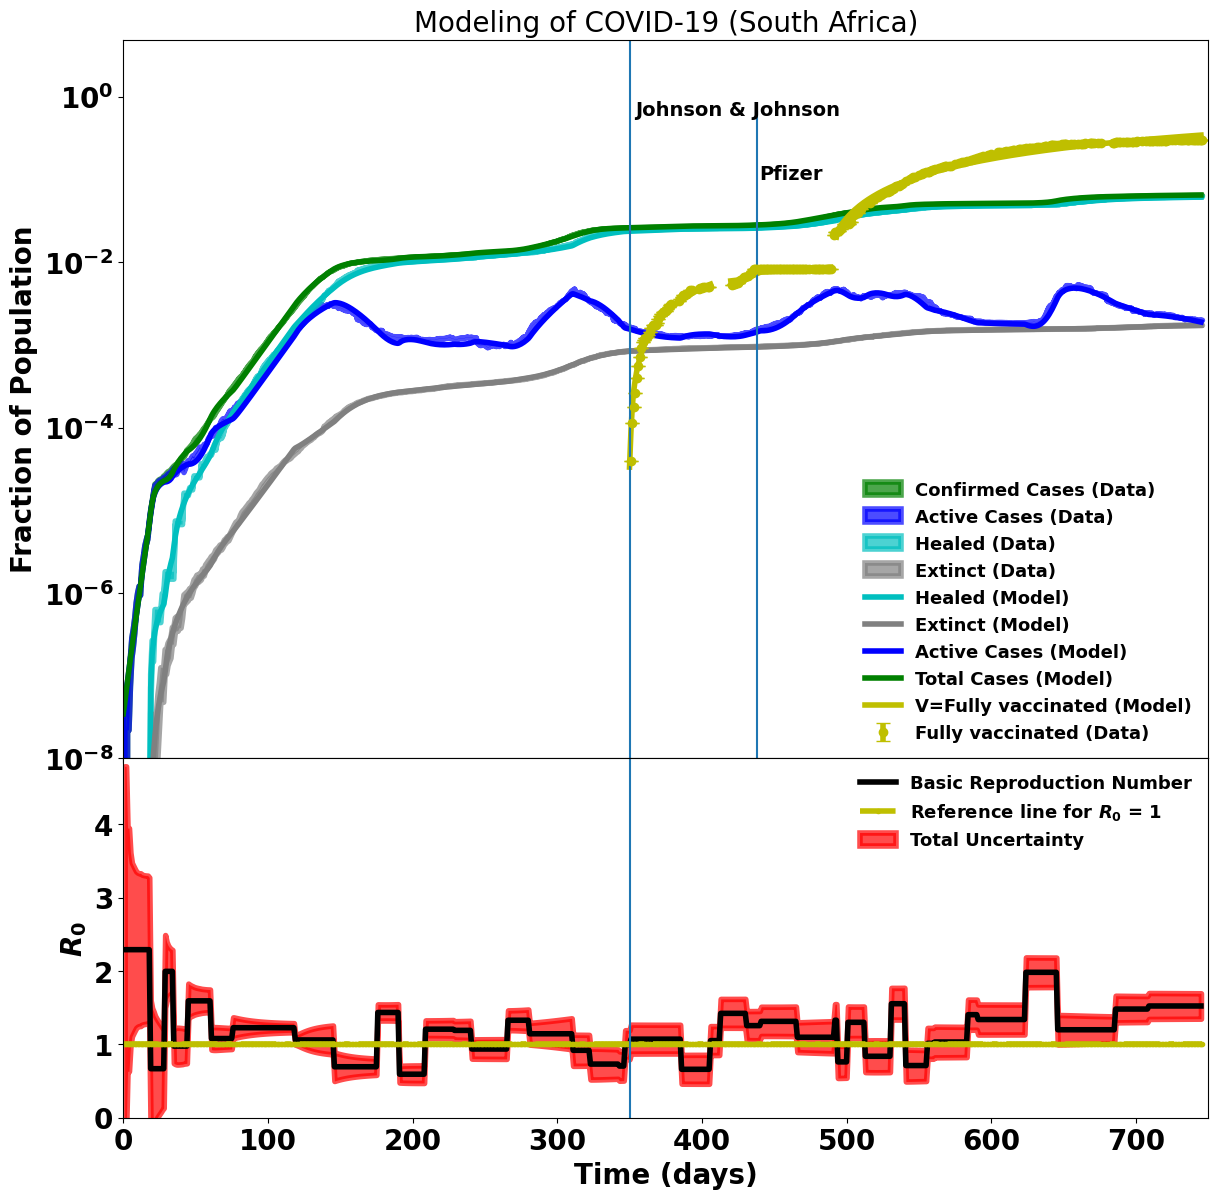

In [43]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

#the first subplot
ax0 = plt.subplot(gs[0])

#ax = plt.subplot(111)


#plt.errorbar(data_time, Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Confirmed Cases (Data)', elinewidth =4, capsize = 5)
#plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Active Cases (Data)', elinewidth =4, capsize = 5)
#plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed (Data)', elinewidth =4, capsize = 5)
#plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct (Data)', elinewidth =4, capsize = 5)
plt.fill_between(data_time, Dinfecteds-error_infectedf, Dinfecteds+error_infectedf, color='g', alpha=alpha, label='Confirmed Cases (Data)', lw=4)
plt.fill_between(data_time ,Dactifs-error_actif,Dactifs+error_actif, color='b',alpha=alpha,label='Active Cases (Data)', lw =4)
plt.fill_between(data_time ,Drecovereds-error_recovered,Drecovereds+error_recovered,alpha=alpha, color='c',label='Healed (Data)', lw =4)
plt.fill_between(data_time ,Ddeads-error_dead,Ddeads+error_dead,alpha=alpha, color='gray',label='Extinct (Data)', lw =4)
#plt.fill_between(data_time ,Dvacc-error_fully_vaccinated,Dvacc+error_fully_vaccinated,alpha=alpha, color='y',label='Vaccination (Data)', lw =4)
#plt.fill_between(data['Days_Vaccination'],Dvacc-error_fully_vaccinated,Dvacc+error_fully_vaccinated,alpha=alpha,color='y', label = 'Fully_Vaccineted', lw =4)


plt.plot(t, H,'c',label='Healed (Model)',linewidth=4) # plotting t, b separately
plt.plot(t, E,'gray',label='Extinct (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Active Cases (Model)',linewidth=4) # plotting t, c separately
plt.plot(t, Infected_sidarthe, 'g',label='Total Cases (Model)',linewidth=4)
plt.plot(t0, V[t0], 'y',linewidth=4)
plt.plot(t1, V[t1], 'y',label='V=Fully vaccinated (Model)',linewidth=4)
plt.plot(t2, V[t2], 'y',linewidth=4)
plt.plot(t3, V[t3], 'y',linewidth=4)
#plt.plot(data['Days_Vaccination'],(data['Fraction_Combinevaccine']),'*',color ='black', label = 'CombineVaccine')
#plt.plot(data['Days_Vaccination'],(data['Fraction_fully_Vaccineted']),'*', label = 'Fully_Vaccineted')
#plt.plot(data['Days_Vaccination'], (data['Fraction_one_dose']), "*", label = '=>One_Dose')
#plt.errorbar(data['Days_Vaccination'], (data['Fraction_one_dose']), yerr=error_vaccinated,fmt='o',color='black', label = '=>One_dose',elinewidth =4, capsize = 5)
plt.errorbar(data['Days_Vaccination'],(data['Fraction_fully_Vaccineted']),yerr=error_fully_vaccinated,fmt='o',color='y', label = 'Fully vaccinated (Data)',elinewidth =4, capsize = 5)


#plt.grid(True)
plt.title('Modeling of COVID-19 (South Africa)', fontsize=20)
#plt.title('Linear scale', fontsize = 20)
#plt.yscale('linear')
plt.yscale('log')
plt.xlim(0, 610)
plt.ylim(10**-8, 10**0)
#plt.ylim(0, 2.5*10**-2)
#plt.ylim(0, 7.5*10**-2)
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
plt.ylabel('Fraction of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
#fig.suptitle('Modeling of Covid-19, South Africa Data',fontsize=30)
plt.ylim(0, 4.9)
plt.xlim(0,750)
plt.axvline(350)
plt.axvline(438, ymax= 0.90)
#plt.axvline(490)

plt.text(354, 0.6, 'Johnson & Johnson', fontsize=14)
plt.text(440, 0.1, 'Pfizer', fontsize=14)
plt.legend(fontsize=13, frameon=False)
ax.legend(loc=2, prop={'size': 20})
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=13.0) #to put the legend on the right
#plt.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.,fontsize=13.0)


#the secund plot
#shered the X exes
ax1 = plt.subplot(gs[1], sharex = ax0)


alpha=0.7
# Plotting The reproduction number
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
#fig = plt.figure()
#ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)

plt.plot(t,R0,'black', label='Basic Reproduction Number',linewidth=4) # plotting t, c separately
plt.plot(data_time,Goodness,'y.-.', label='Reference line for $R_0$ = 1',linewidth=4)
#plt.plot(t1,R0[t1],'black') # plotting t, c separately
#plt.plot(t2,R0[t2],'black') # plotting t, c separately
#plt.plot(t3,R0[t3],'black') # plotting t, c separately


plt.fill_between(t,R0-DR0,R0+DR0, color='r', alpha=alpha, label='Total Uncertainty', lw=4)
#plt.errorbar(t ,R0,yerr=DR0,fmt='o',color='r',label='Total Uncertainty', lw=4)
#plt.fill_between(t1 ,out4[t1]-uncert_vacc[t1],out4[t1]+uncert_vacc[t1],color='y',alpha=alpha, lw=4)
#plt.fill_between(t2 ,out4[t2]-uncert_vacc[t2],out4[t2]+uncert_vacc[t2],color='y',alpha=alpha, lw=4)
#plt.fill_between(t3 ,out4[t3]-uncert_vacc[t3],out4[t3]+uncert_vacc[t3],color='y',alpha=alpha, lw=4)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('Basic Reproduction Number (R0)',fontsize=20)
plt.xlabel("Time (days)",fontsize=20)
plt.ylabel("$R_{0}$",fontsize=20)
plt.ylim(0, 4.9)
#plt.xlim(0,750)
plt.axvline(350)
plt.legend(fontsize=13, frameon=False)
#plt.axvline(438)
#plt.axvline(490)
#plt.text(375, 0.3, 'J&J', fontsize=17)
#plt.text(475, 0.3, 'J&J and Pfizer', fontsize=17)
#plt.legend(fontsize=13, frameon=False)
ax.legend(loc=2, prop={'size': 20})
#plt.legend(bbox_to_anchor=(0., 3.03, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.,fontsize=13.0)
#plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.,fontsize=13.0) #to put the legend on the right

#plt.xscale("log")
#plt.yscale("log")
#plt.grid(True)


#yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)

# put legend on first subplot
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.show()
fig.savefig('SIDARTHE_model_fitting20march2022.png')

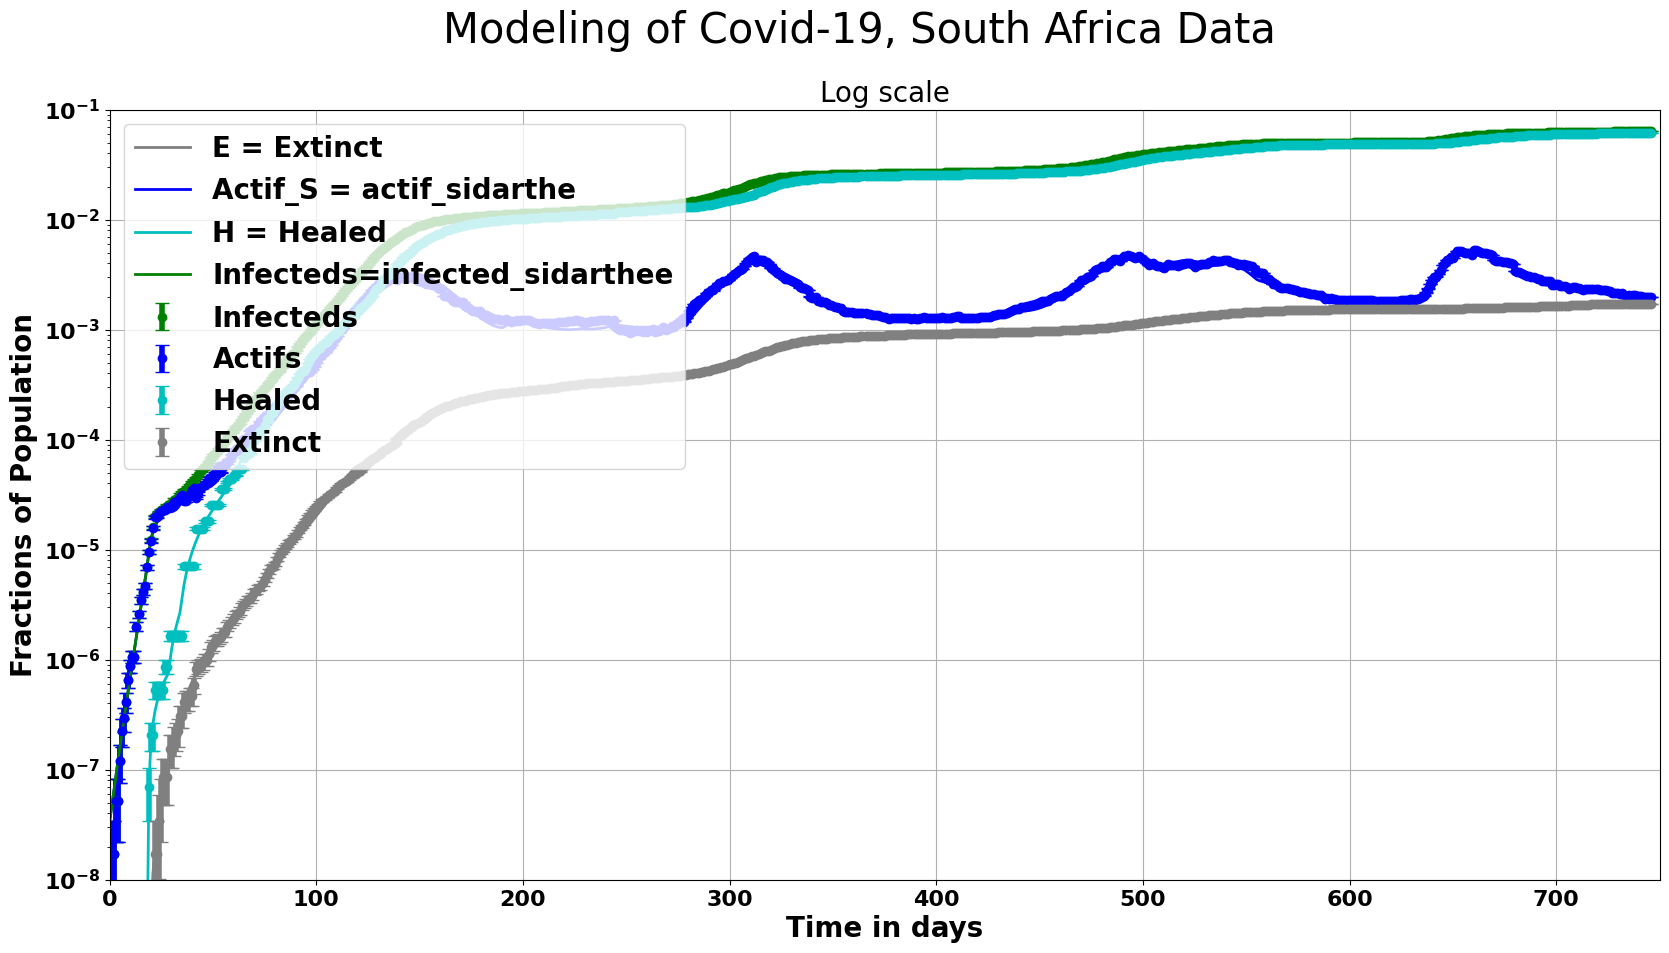

In [44]:
fig = plt.figure()
ax = plt.subplot(111)


plt.errorbar(data_time, Dinfecteds,yerr=error_infectedf,fmt='o',color='g',label='Infecteds', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Dactifs,yerr=error_actif,fmt='o', color='b',label='Actifs', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Drecovereds,yerr=error_recovered,fmt='o', color='c',label='Healed', elinewidth =4, capsize = 5)
plt.errorbar(data_time ,Ddeads,yerr=error_dead,fmt='o', color='gray',label='Extinct', elinewidth =4, capsize = 5)

plt.plot(t, E,'gray',label='E = Extinct',linewidth=2) # plotting t, c separately
plt.plot(t, actif_sidarthe,'b',label='Actif_S = actif_sidarthe',linewidth=2) # plotting t, c separately
plt.plot(t, H,'c',label='H = Healed',linewidth=2) # plotting t, b separately
plt.plot(t, Infected_sidarthe, 'g',label='Infecteds=infected_sidarthee',linewidth=2)


plt.grid(True)
plt.title('Log scale',fontsize=20)
#plt.title('Linear scale', fontsize = 20)
#plt.yscale('linear')
plt.yscale('log')
plt.xlim(0, 750)
plt.ylim(10**-8, 10**-1)
#plt.ylim(0, 2.5*10**-2)
#plt.ylim(0, 7.5*10**-2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Fractions of Population',fontsize=20)
plt.xlabel('Time in days',fontsize=20)
fig.suptitle('Modeling of Covid-19, South Africa Data',fontsize=30)
plt.legend()
ax.legend(loc=2, prop={'size': 20})
fig.savefig('SIDARTHE_model_fitting27Sep20202LinearScale.pdf')


In [45]:
data

data_time  Double data time[Ndata]  Double_data_infected[Ndata]  \
0            0                       45                            1   
1            1                       46                            1   
2            2                       47                            1   
3            3                       48                            3   
4            4                       49                            3   
..         ...                      ...                          ...   
741        741                      786                      3698803   
742        742                      787                      3700484   
743        743                      788                      3700484   
744        744                      789                      3703329   
745        745                      790                      3704218   

     Double_data_active[Ndata]  Double_data_recovered[Ndata]  \
0                            1                             0   
1                            1                             0   
2                            1                             0   
3                            3                             0   
4                            3                             0   
..                         ...                           ...   
741                     114510                       3584293   
742                     114881                       3585603   
743                     114881                       3585603   
744                     115065                       3588264   
745                     114767                       3589451   

    Double_data_dead[Ndata] Double n tests[Ndata]  Days_Vaccination  \
0                         0                     8                 1   
1                         0                     9                 2   
2                         0                    41                 3   
3                         0                    27                 4   
4                         0                    40                 5   
..                      ...                   ...               ...   
741                   99767                 32093               742   
742                   99829                 29181               743   
743                   99829                 29181               744   
744                   99879                 54892               745   
745                   99881                 16436               746   

     Combine_Vaccine  Fully_vaccinated      Boast    Dates Unnamed: 12  \
0                NaN               NaN        NaN      NaN         NaN   
1                NaN               NaN        NaN      NaN         NaN   
2                NaN               NaN        NaN      NaN         NaN   
3                NaN               NaN        NaN      NaN         NaN   
4                NaN               NaN        NaN      NaN         NaN   
..               ...               ...        ...      ...         ...   
741       20701915.0        17577118.0  1736027.0  16-mar.         NaN   
742       20729866.0        17602956.0  1784871.0  17-mar.         NaN   
743       20753252.0        17628065.0  1829060.0  18-mar.         NaN   
744       20772989.0        17654789.0  1873640.0  19-mar.         NaN   
745       20777048.0        17660887.0  1885226.0  20-mar.         NaN   

     Fraction_one_dose  Fraction_fully_Vaccineted  Fraction_Boast  Goodness  \
0                  NaN                        NaN             NaN         1   
1                  NaN                        NaN             NaN         1   
2                  NaN                        NaN             NaN         1   
3                  NaN                        NaN             NaN         1   
4                  NaN                        NaN             NaN         1   
..                 ...                        ...             ...       ...   
741           0.356930                   0.303054        0.029931         1 

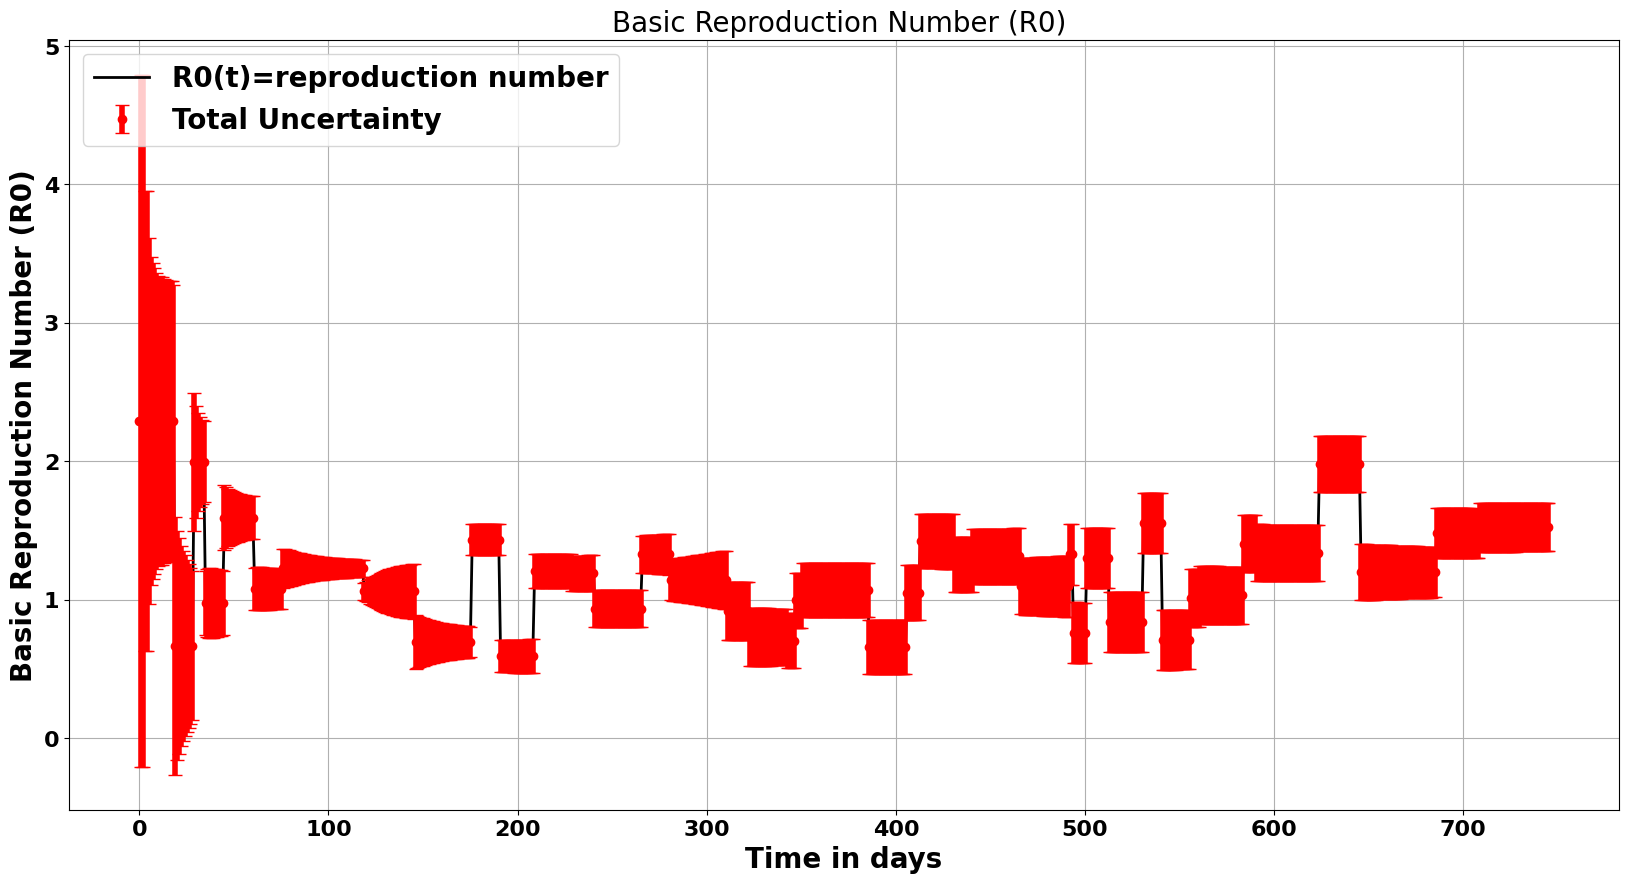

In [46]:
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(t,R0,'black', label='R0(t)=reproduction number',linewidth=2) # plotting t, c separately
#plt.plot(t,dR0syst,'r', label='R0(t)=reproduction number',linewidth=2)
plt.errorbar(t ,R0,DR0, fmt='o',color='r',label='Total Uncertainty',elinewidth=4,capsize=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Basic Reproduction Number (R0) ',fontsize=20)
plt.xlabel("Time in days",fontsize=20)
plt.ylabel("Basic Reproduction Number (R0)",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
#plt.xscale("log")
#plt.yscale("log")
plt.grid()
#plt.show()
plt.savefig("Kenya_R(0).pdf")

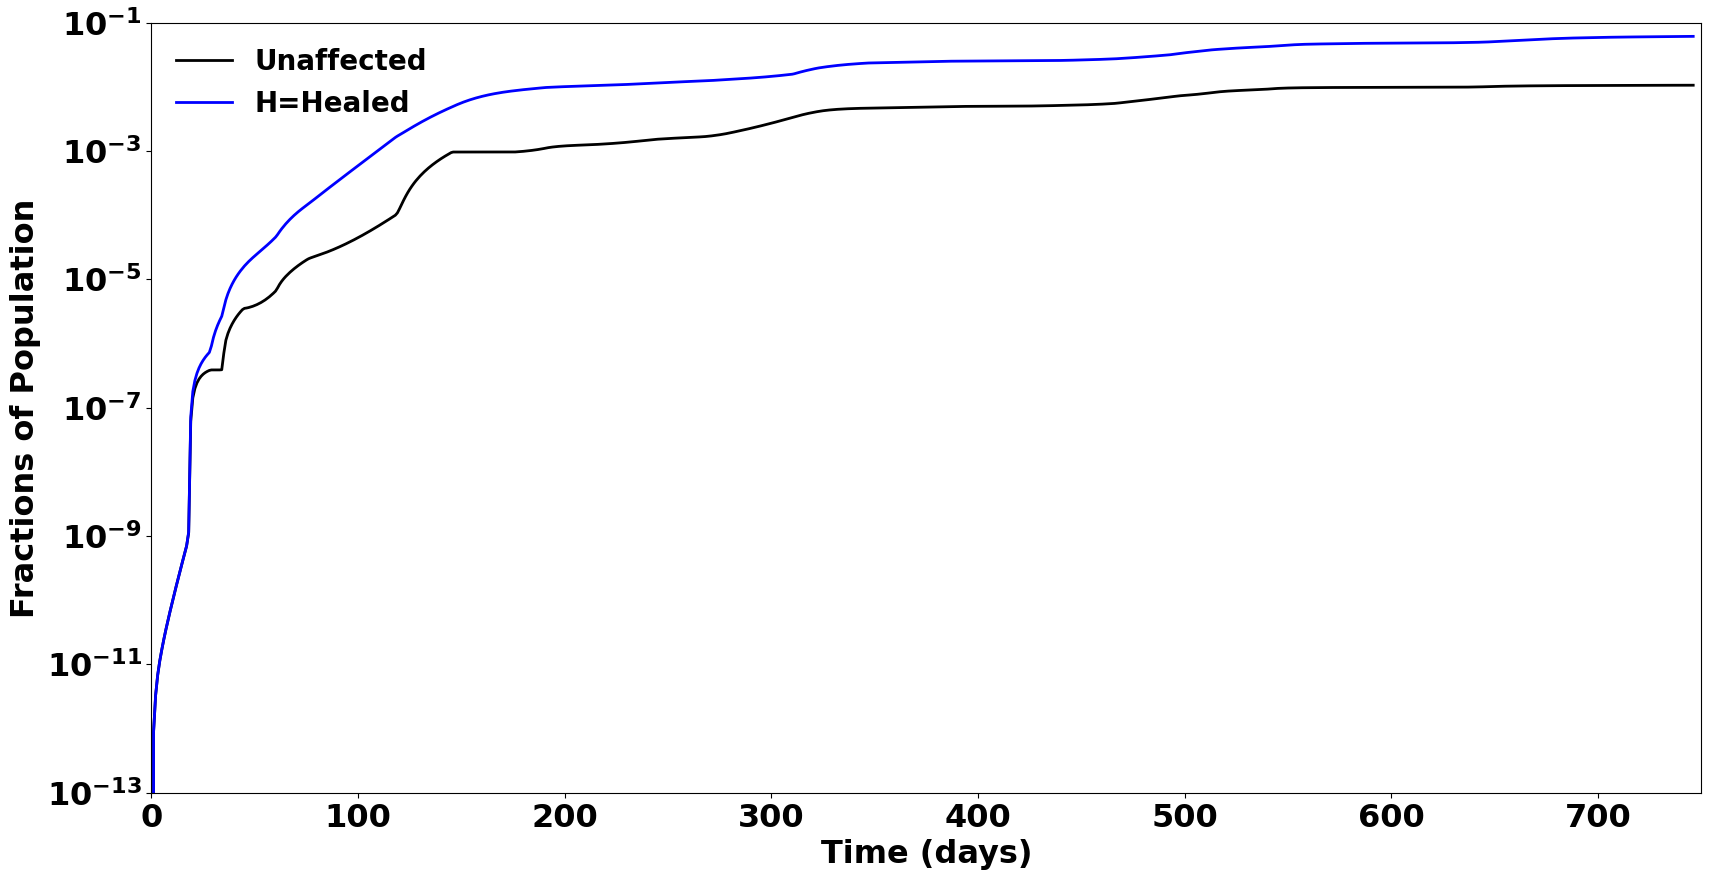

In [47]:
fig = plt.figure()

ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(data_time ,U,'black', label='Unaffected',linewidth=2)
plt.plot(data_time ,H,'b', label='H=Healed',linewidth=2)
# plotting t, c separately
#plt.plo
plt.xticks(fontsize=23)
plt.yticks(fontsize=23)
#plt.title('Unaffected and Healed ',fontsize=20)
plt.xlabel("Time (days)",fontsize=23)
plt.ylabel("Fractions of Population", fontsize=23)
ax.legend(loc=2, prop={'size': 20}, frameon = False)
plt.yscale('log')
plt.ylim(10**-13,10**-1)
plt.xlim(0,750)

#plt.yscale("log")
#plt.grid()
#plt.show()
plt.savefig("Unaffected.pdf")

<ipython-input-48-a5d7e0e22d54>:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(data_time ,U/H,'black', label='Unaffected/Healed',linewidth=2)


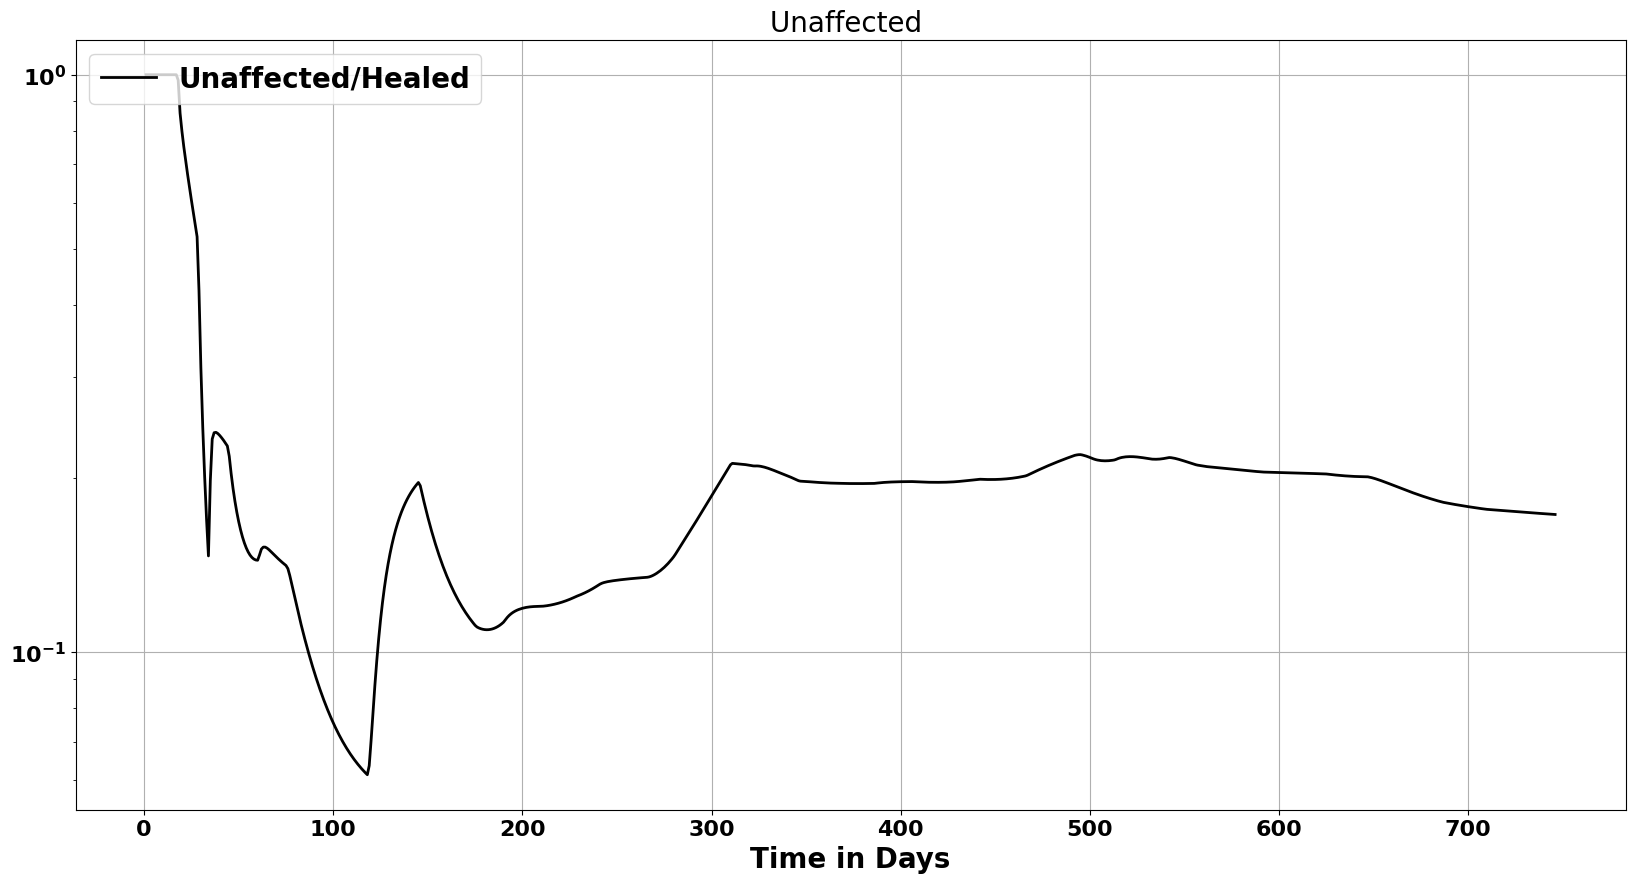

In [48]:
fig = plt.figure()
ax = plt.subplot(111)
#t = np.linspace(0, 67, 67)
plt.plot(data_time ,U/H,'black', label='Unaffected/Healed',linewidth=2)

# plotting t, c separately
#plt.plo
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Unaffected ',fontsize=20)
plt.xlabel("Time in Days",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.yscale('log')
#plt.yscale("log")
plt.grid()
#plt.show()
plt.savefig("UnaffectedoverHeald.pdf")


In [49]:
df1 = pd.read_csv("Covid192020SA_lastupdate.csv", encoding="latin-1")
#df1

In [50]:
df1.index = df1.data_time

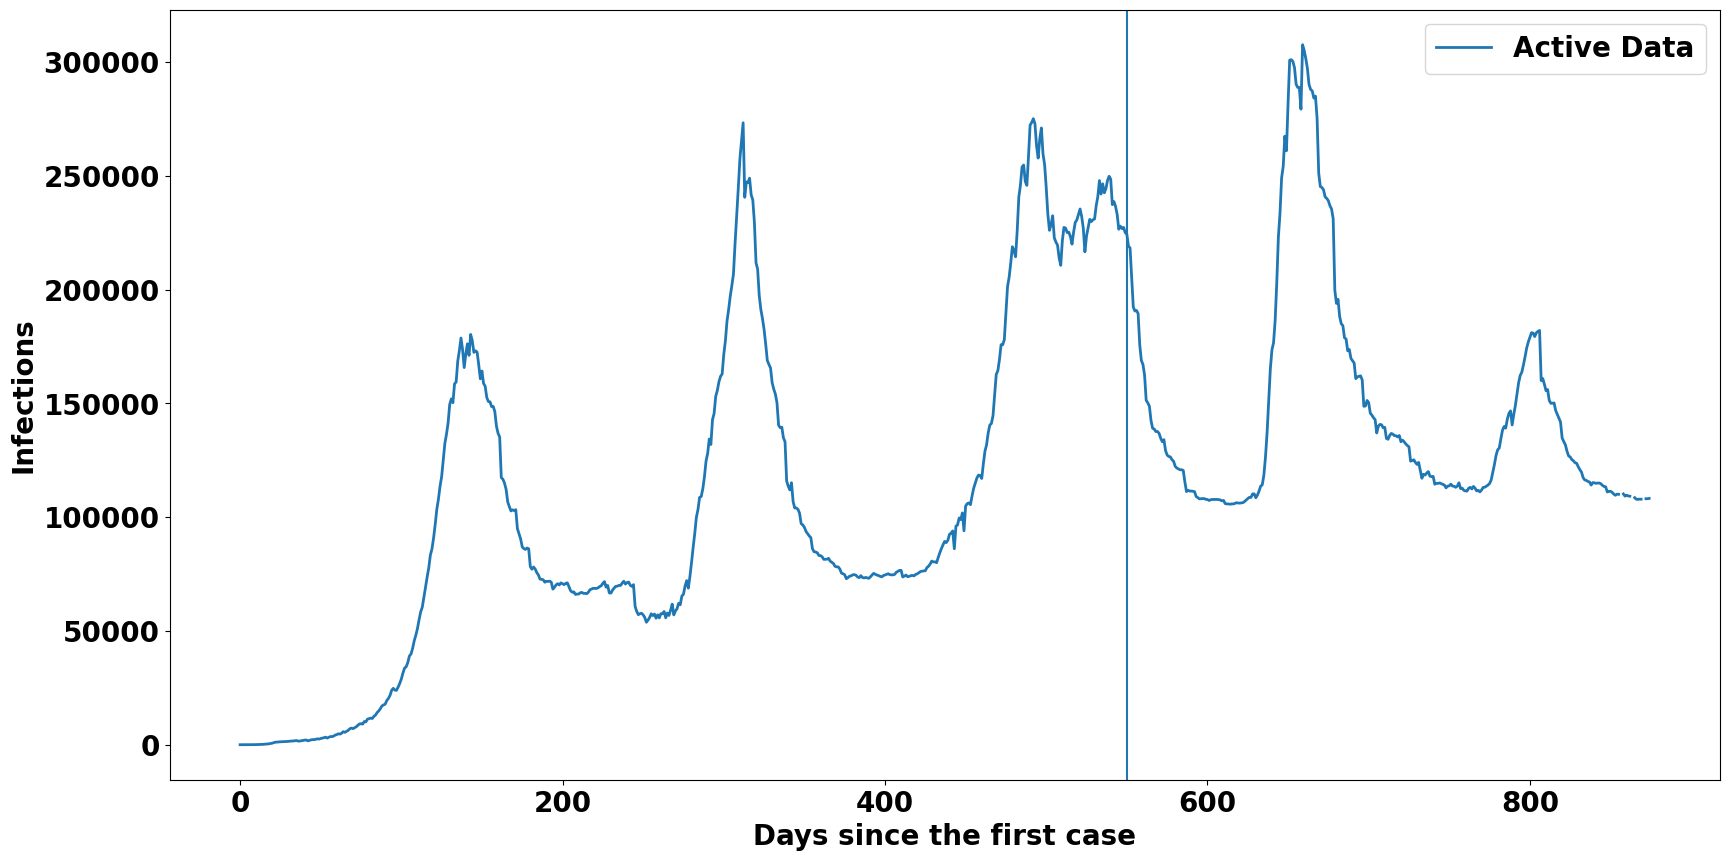

In [51]:
#fig = plt.figure(figsize=(15,10))
plt.plot(df1['Double_data_active[Ndata]'],lw=2 ,label = 'Active Data')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Infections', fontsize=20)
plt.xlabel('Days since the first case', fontsize=20)
plt.legend(fontsize=20)
plt.axvline(550)
plt.savefig('waves_of_infections.png', dpi=800)

In [52]:
death = df1['Double_data_dead[Ndata]']
death_clean = [x for x in death if pd.notnull(x)]


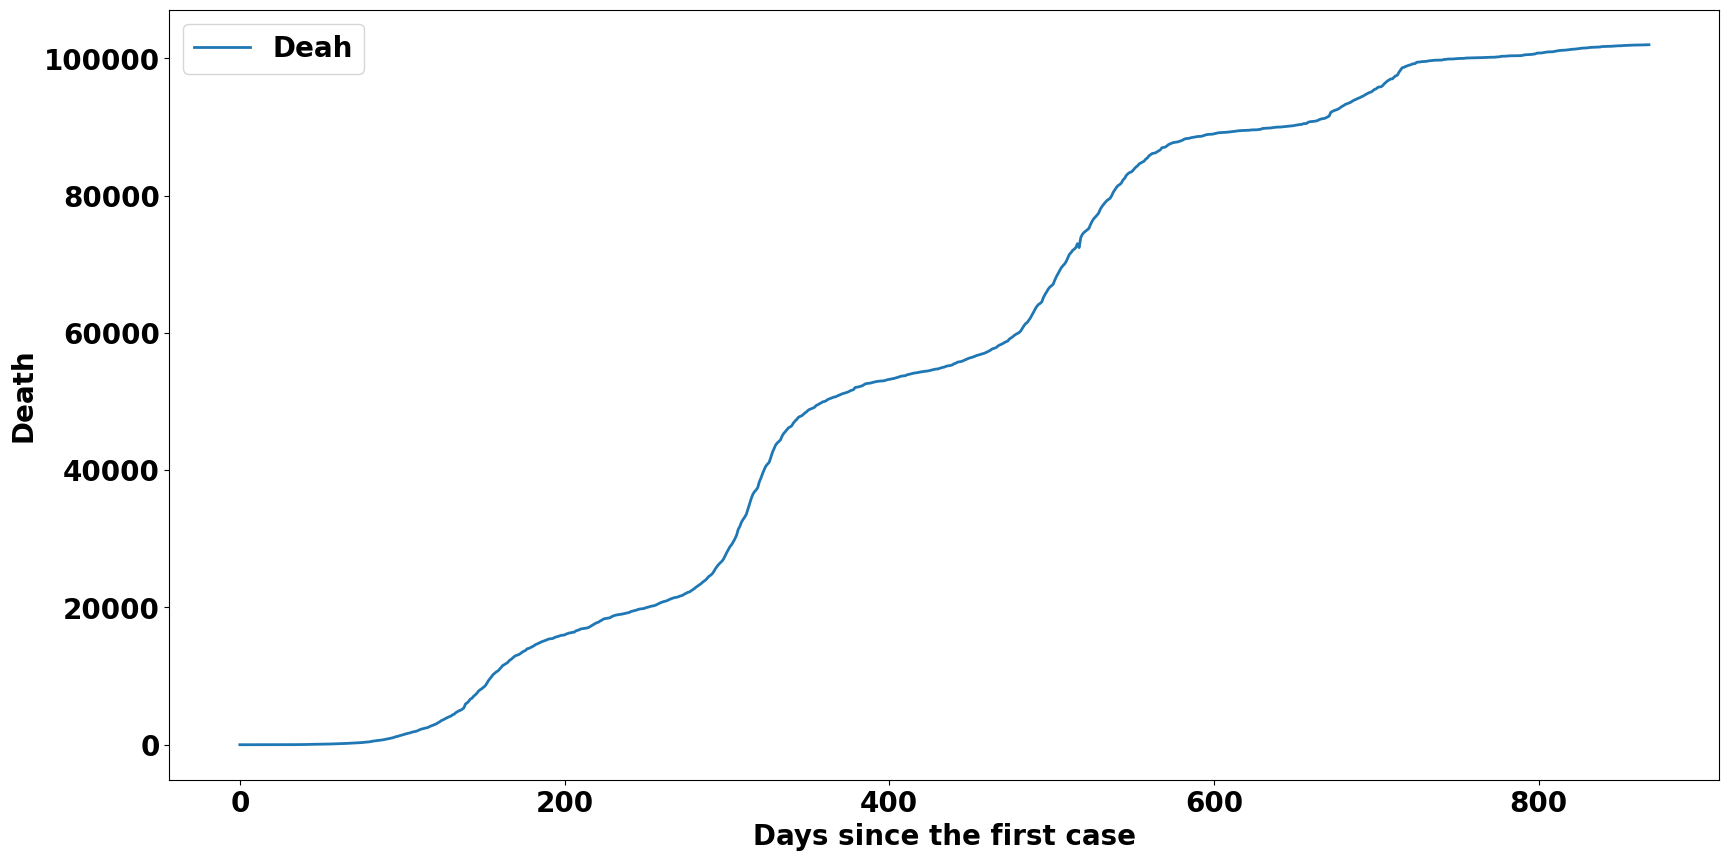

In [53]:
#ax.scatter(df1['data_time'],df1['Double_data_dead[Ndata]'],s=2 ,label = 'Death Data')
plt.plot(death_clean,lw=2 ,label = 'Deah')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Death', fontsize=20)
plt.xlabel('Days since the first case', fontsize=20)
plt.legend(fontsize=20)
        #plt.axvline(550)
plt.savefig('waves_of_Death.png', dpi=800)

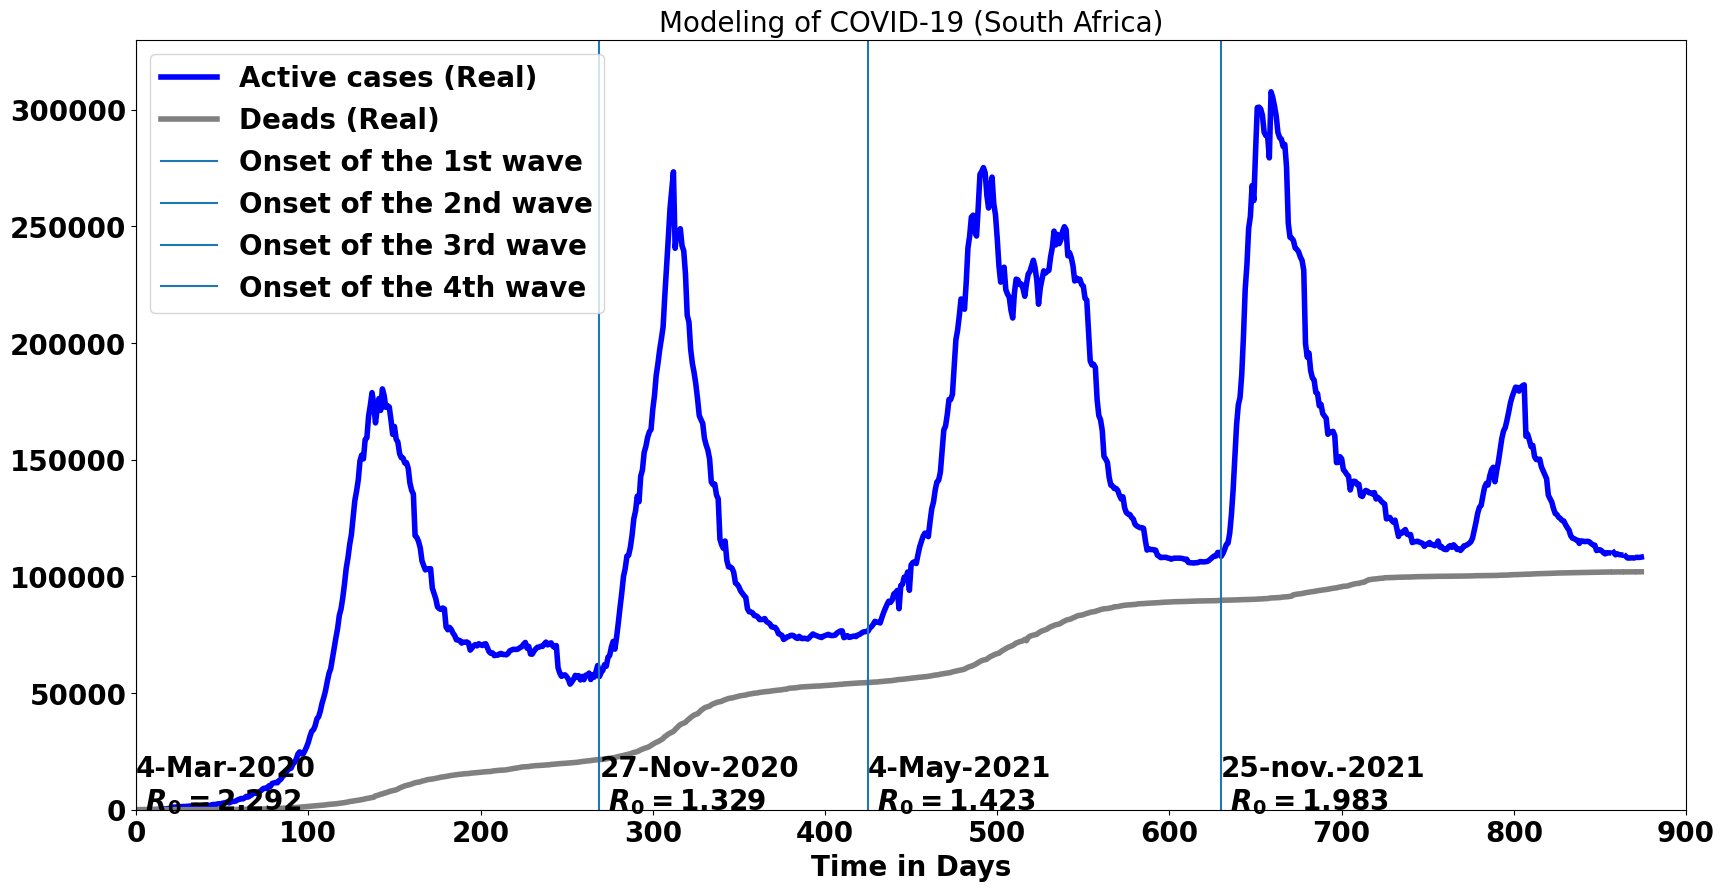

In [60]:
from matplotlib.ticker import ScalarFormatter

Ro = np.array(R0)
fig = plt.figure()
ax = plt.subplot(111)
axlines=[0, 269, 425, 630]
xmax = data_time[len(data_time)-1]

plt.plot(df1['data_time'],df1['Double_data_active[Ndata]'],c="b",label='Active cases (Real)',linewidth=4)
plt.plot(df1['data_time'],df1['Double_data_dead[Ndata]'],c="gray",label='Deads (Real)',linewidth=4)
onset1 = 0
onset2 = 269
onset3 = 425
onset4 = 630
Waves = ["1st","2nd","3rd","4th","5th","6th"]
#dates =

plt.axvline(onset1, label="Onset of the "+Waves[0]+ " wave")
plt.text(onset1, 0.003, s="4-Mar-2020\n"+r" $R_0 = $"+str(Ro[axlines[0]].round(3)), fontsize = 20)

plt.axvline(onset2, label="Onset of the "+Waves[1]+ " wave")
plt.text(onset2, 0.005, s="27-Nov-2020\n"+r" $ R_0 = $"+str(Ro[axlines[1]].round(3)), fontsize = 20)

plt.axvline(onset3, label="Onset of the "+Waves[2]+ " wave")
plt.text(onset3, 0.005, s=data['Dates'].iloc[onset3]+"-2021\n"+r" $R_0 = $"+str(Ro[axlines[2]].round(3)), fontsize = 20)

plt.axvline(onset4, label="Onset of the "+Waves[3]+ " wave")
plt.text(onset4, 0.005, s=data['Dates'].iloc[onset4]+"-2021\n"+r" $R_0 = $"+str(Ro[axlines[3]].round(3)), fontsize = 20)

plt.legend(fontsize=13, frameon=False)
##################################
class ScalarFormatterClass(ScalarFormatter):
    def _set_format(self):
        self.format = "%e"

yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((4,4))
ax.yaxis.set_major_formatter(yScalarFormatter)

#################################
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Modeling of COVID-19 (South Africa)',fontsize=20)
plt.xlabel("Time in Days",fontsize=20)
ax.legend(loc=2, prop={'size': 20})
plt.xlim(0, 900)
plt.ylim(0, 330000)
plt.yscale("linear")
plt.grid(False)
#plt.show()
plt.savefig('CutoffWaves.pdf')

In [55]:
data.columns

Index(['data_time', 'Double data time[Ndata]', 'Double_data_infected[Ndata]',
       'Double_data_active[Ndata]', 'Double_data_recovered[Ndata]',
       'Double_data_dead[Ndata]', 'Double n tests[Ndata]', 'Days_Vaccination',
       'Combine_Vaccine', 'Fully_vaccinated', 'Boast', 'Dates', 'Unnamed: 12',
       'Fraction_one_dose', 'Fraction_fully_Vaccineted', 'Fraction_Boast',
       'Goodness', 'Fully_vaccinated1'],
      dtype='object')

In [57]:
N=5.8e+7
actif_sidarthe = df1['Double_data_active[Ndata]']/N
E = df1['Double_data_dead[Ndata]']/N
E1 = df1['Double_data_dead[Ndata]']
datatime = df1['data_time']
#print(np.format_float_scientific(E,exp_digits=3)

<ipython-input-112-6e7c4c81642c>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(gs[0])#plt.subplot(211)


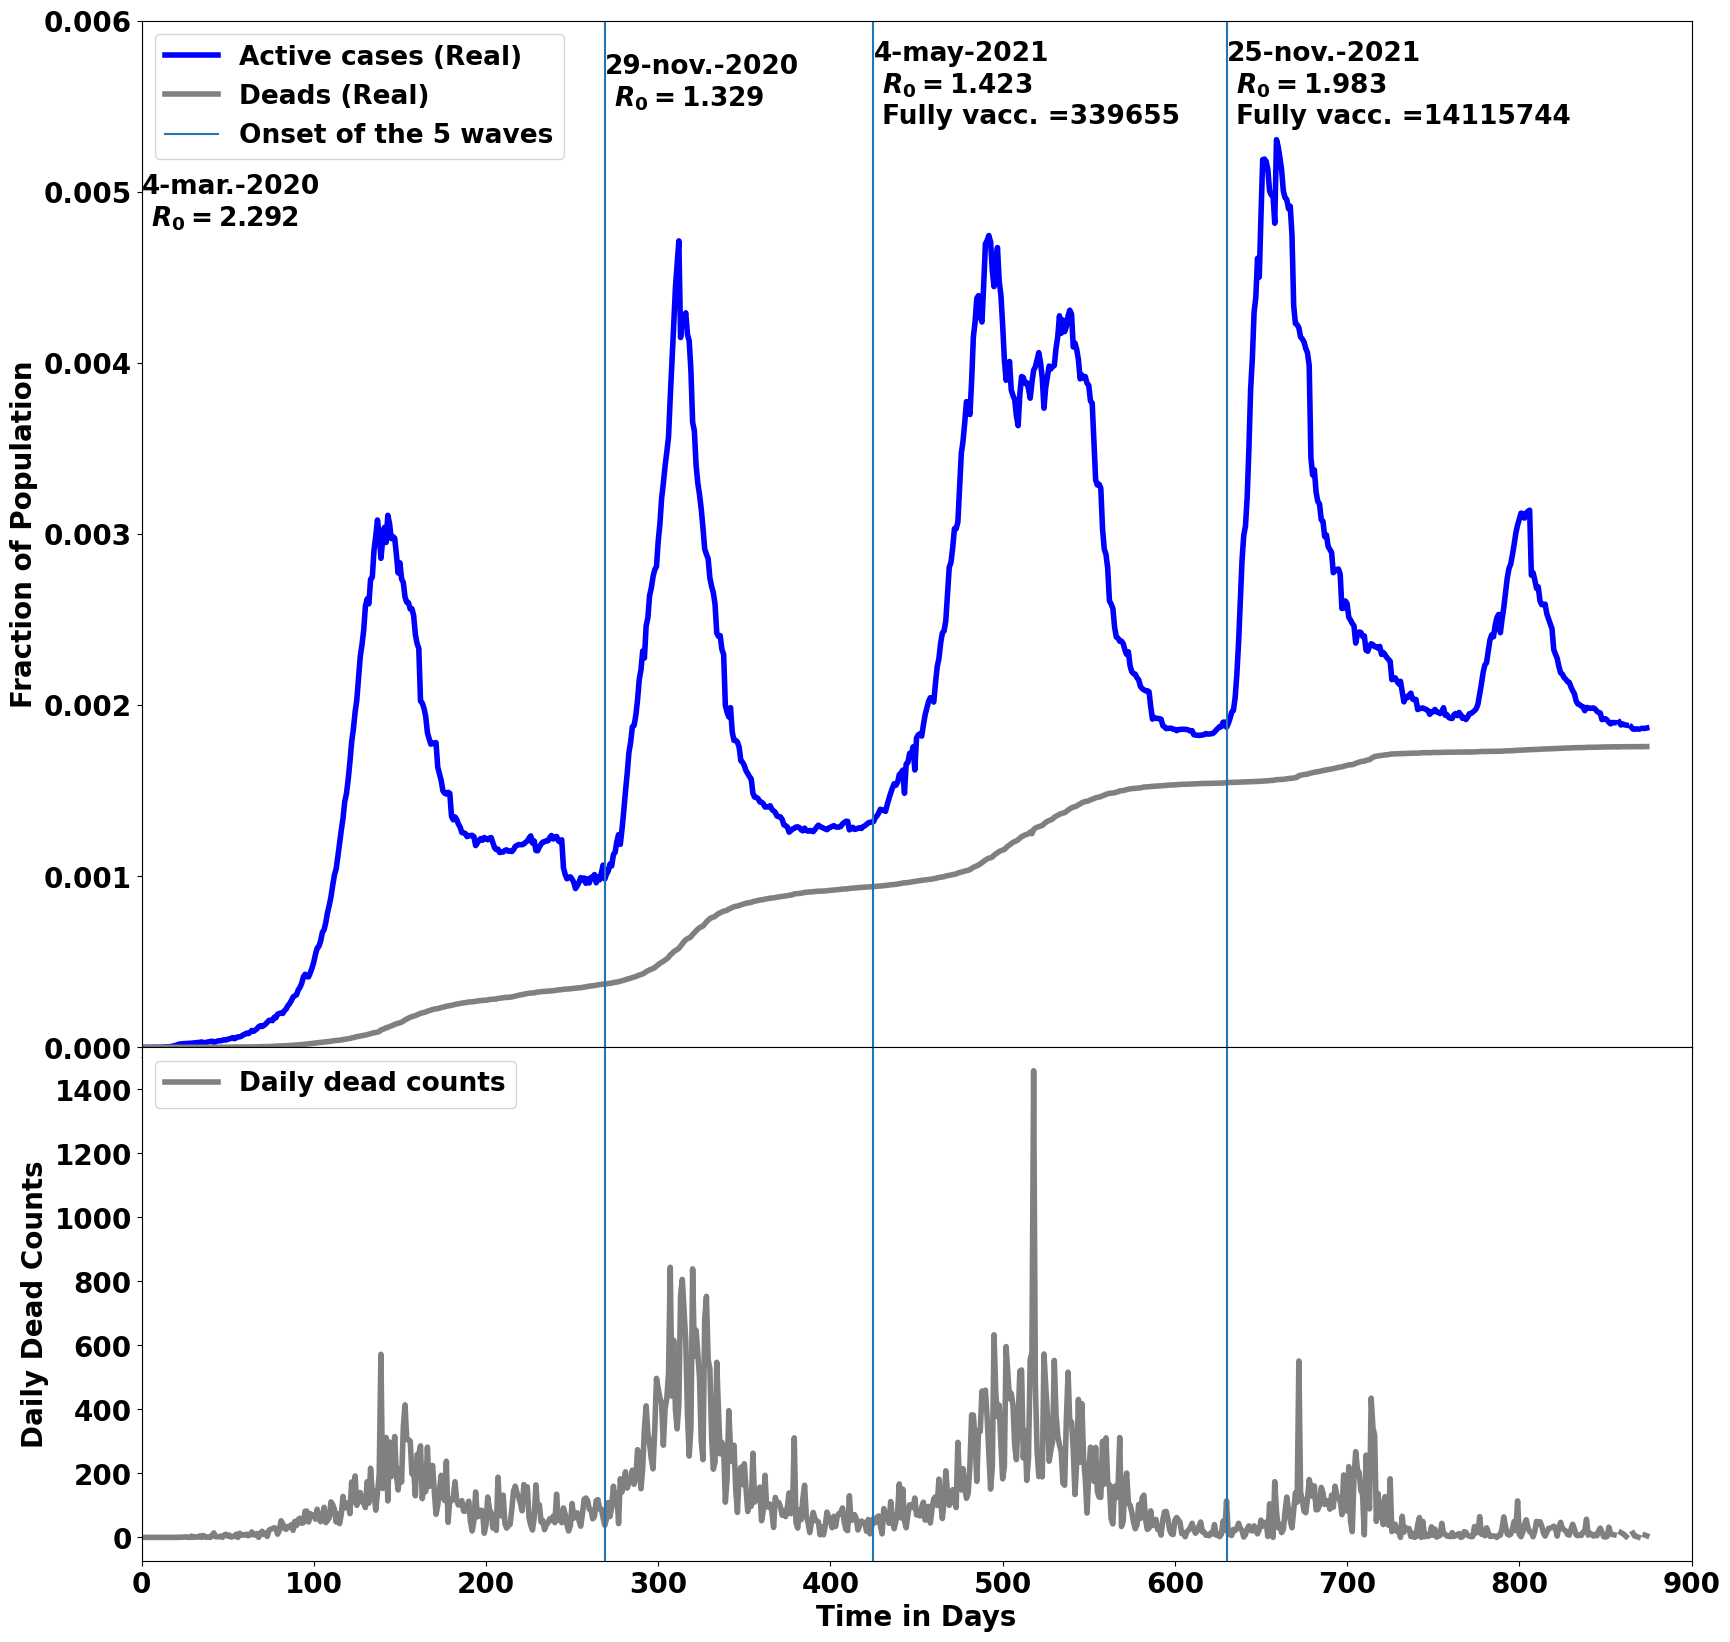

In [112]:
E2 = np.array(E1)
E_days = np.zeros_like(E2)
E_days[1:] = abs(E2[1:] - E2[:-1])

fig = plt.figure(figsize=(20,20))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

#plt.xticks(fontsize=0)
plt.yticks(fontsize=0)
axlines=[0, 269, 425, 630, 769]
onset_dates = [df1['Dates'].iloc[day].lower()+"-2020\n" if i <= 1 else df1['Dates'].iloc[day].lower()+"-2021\n" for i, day in enumerate(axlines)]
xmax = data_time[len(data_time)-1]
ax = plt.subplot(gs[0])#plt.subplot(211)

plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
plt.ylabel("Fraction of Population", fontsize=20)

plt.plot(datatime, actif_sidarthe,c="b",label='Active cases (Real)',linewidth=4)
plt.plot(datatime, E,c="gray",label='Deads (Real)',linewidth=4)

onset1 = 0
onset2 = 269
onset3 = 425
onset4 = 630
onset5 = 769
Waves = ["1st","2nd","3rd","4th","5th","6th"]
#dates =
plt.ylim(0, 0.0060)
plt.axvline(onset1, label="Onset of the 5 waves")
plt.text(onset1, 0.0048, s=onset_dates[0]+r" $R_0 = $"+str(Ro[axlines[0]].round(3)), fontsize = 19)

plt.axvline(onset2)#, label="Onset of the "+Waves[1]+ " wave"
plt.text(onset2, 0.0055, s=onset_dates[1]+r" $ R_0 = $"+str(Ro[axlines[1]].round(3)), fontsize = 19)

plt.axvline(onset3)#, label="Onset of the "+Waves[2]+ " wave"
plt.text(onset3, 0.0054,s=onset_dates[2]+r" $R_0 = $"+str(Ro[axlines[2]].round(3))+"\n Fully vacc. ="+str(int(df1.Fully_vaccinated.fillna(method='ffill')[onset3])), fontsize = 19)

plt.axvline(onset4)#, label="Onset of the "+Waves[3]+ " wave"
plt.text(onset4, 0.0054,s=onset_dates[3]+r" $R_0 = $"+str(Ro[axlines[3]].round(3))+"\n Fully vacc. ="+str(int(df1.Fully_vaccinated.fillna(method='ffill')[onset4])), fontsize = 19)

#plt.axvline(onset5)#, label="Onset of the "+Waves[4]+ " wave"
#plt.text(onset5, 0.0048,s=onset_dates[4]+r" $R_0 = N.A. $"+"\n Fully vacc. ="+str(int(df1.Fully_vaccinated.fillna(method='ffill')[onset5])), fontsize = 19)

ax.legend(loc=2, prop={'size': 19})

ax1 = plt.subplot(gs[1], sharex = ax)#plt.subplot(212)
plt.plot(datatime, E_days,c="gray",label='Daily dead counts',linewidth=4)
plt.axvline(onset1)
plt.axvline(onset2)
plt.axvline(onset3)
plt.axvline(onset4)
#plt.axvline(onset5)

#plt.ticklabel_format(axis="both",style="sci")

plt.legend(fontsize=13, frameon=False)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('Modeling of COVID-19 (South Africa)',fontsize=20)
plt.xlabel("Time in Days",fontsize=20)
plt.ylabel("Daily Dead Counts", fontsize=20)
ax1.legend(loc=2, prop={'size': 19})
plt.xlim(0, 900)
plt.subplots_adjust(hspace=.0)
#
plt.yscale("linear")
plt.grid(False)
#plt.show()
plt.savefig('CutoffWaves.pdf')
plt.savefig('CutoffWaves.png')

In [99]:
Ro.shape

(746,)

In [96]:
df1['Dates'].shape
[df1['Dates'].iloc[day].lower()+"-2021\n" for day in axlines]

['4-mar.-2021\n',
 '29-nov.-2021\n',
 '4-may-2021\n',
 '25-nov.-2021\n',
 '13-apr-2021\n']

In [87]:
df1['Dates'].iloc[onset5]

'13-Apr'

In [66]:
actif_sidarthe[765: 775]

data_time
765    0.001958
766    0.001944
767    0.001923
768    0.001928
769    0.001916
770    0.001930
771    0.001950
772    0.001952
773    0.001959
774    0.001968
Name: Double_data_active[Ndata], dtype: float64

In [73]:
onset5 = 769

In [79]:
df1.fillna(method='ffill').iloc[[onset1, onset2, onset3, onset4, onset5],:]

data_time  Double data time[Ndata]  Double_data_infected[Ndata]  \
data_time                                                                    
0                  0                       45                          1.0   
269              269                      314                     787702.0   
425              425                      470                    1586148.0   
630              630                      675                    2952500.0   
769              769                      814                    3735578.0   

           Double_data_active[Ndata]  Double_data_recovered[Ndata]  \
data_time                                                            
0                                1.0                           0.0   
269                          57069.0                      730633.0   
425                          76492.0                     1509656.0   
630                         108539.0                     2843961.0   
769                         111127.0                     3624451.0   

           Double_data_dead[Ndata] Double n tests[Ndata]  Days_Vaccination  \
data_time                                                                    
0                              0.0                     8                 1   
269                        21477.0                 22463               270   
425                        54511.0                 24040               426   
630                        89771.0                 38075               631   
769                       100132.0                 16436               770   

           Combine_Vaccine  Fully_vaccinated      Boast    Dates  Unnamed: 12  \
data_time                                                                       
0                      NaN               NaN        NaN   4-mar.          NaN   
269                    NaN               NaN        NaN  29-nov.          NaN   
425               339655.0          339655.0        NaN    4-May          J&J   
630             16857214.0        14115744.0        NaN  25-nov.  J&J +Pfizer   
769             21097500.0        18116074.0  1885226.0   13-Apr  J&J +Pfizer   

           Fraction_one_dose  Fraction_fully_Vaccineted  Fraction_Boast  \
data_time                                                                 
0                        NaN                        NaN             NaN   
269                      NaN                        NaN             NaN   
425                 0.005856                   0.005856             NaN   
630                 0.290642                   0.243375             NaN   
769                 0.358225                   0.304498        0.032504   

           Goodness  Fully_vaccinated1  
data_time                               
0                 1                1.0  
269               1                1.0  
425               1           339655.0  
630               1         14115744.0  
769               1         17660887.0

In [81]:
data.fillna(method='ffill').iloc[[onset1, onset2, onset3, onset4],:]

data_time  Double data time[Ndata]  Double_data_infected[Ndata]  \
0            0                       45                            1   
269        269                      314                       787702   
425        425                      470                      1586148   
630        630                      675                      2952500   

     Double_data_active[Ndata]  Double_data_recovered[Ndata]  \
0                            1                             0   
269                      57069                        730633   
425                      76492                       1509656   
630                     108539                       2843961   

    Double_data_dead[Ndata] Double n tests[Ndata]  Days_Vaccination  \
0                         0                     8                 1   
269                   21477                 22463               270   
425                   54511                 24040               426   
630                   89771                 38075               631   

     Combine_Vaccine  Fully_vaccinated  Boast    Dates  Unnamed: 12  \
0                NaN               NaN    NaN      NaN          NaN   
269              NaN               NaN    NaN      NaN          NaN   
425         339655.0          339655.0    NaN    4-May          J&J   
630       16857214.0        14115744.0    NaN  25-nov.  J&J +Pfizer   

     Fraction_one_dose  Fraction_fully_Vaccineted  Fraction_Boast  Goodness  \
0                  NaN                        NaN             NaN         1   
269                NaN                        NaN             NaN         1   
425           0.005856                   0.005856             NaN         1   
630           0.290642                   0.243375             NaN         1   

     Fully_vaccinated1  
0                    1  
269                  1  
425             339655  
630           14115744